In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from glob import glob
import pandas as pd
from copy import deepcopy
from hydra import initialize, compose
import itertools
from phrosty import plotting

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):  # ../../
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.utils import util

In [2]:
input_dir = os.path.join(config.machine.data_dir, 'output', 'zernikes')
zernikes = np.load(os.path.join(input_dir, 'zernikes.npy'))

In [3]:
print(list(range(3, 23)))

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]


In [4]:
zernikes.shape

(22, 18, 100, 100)

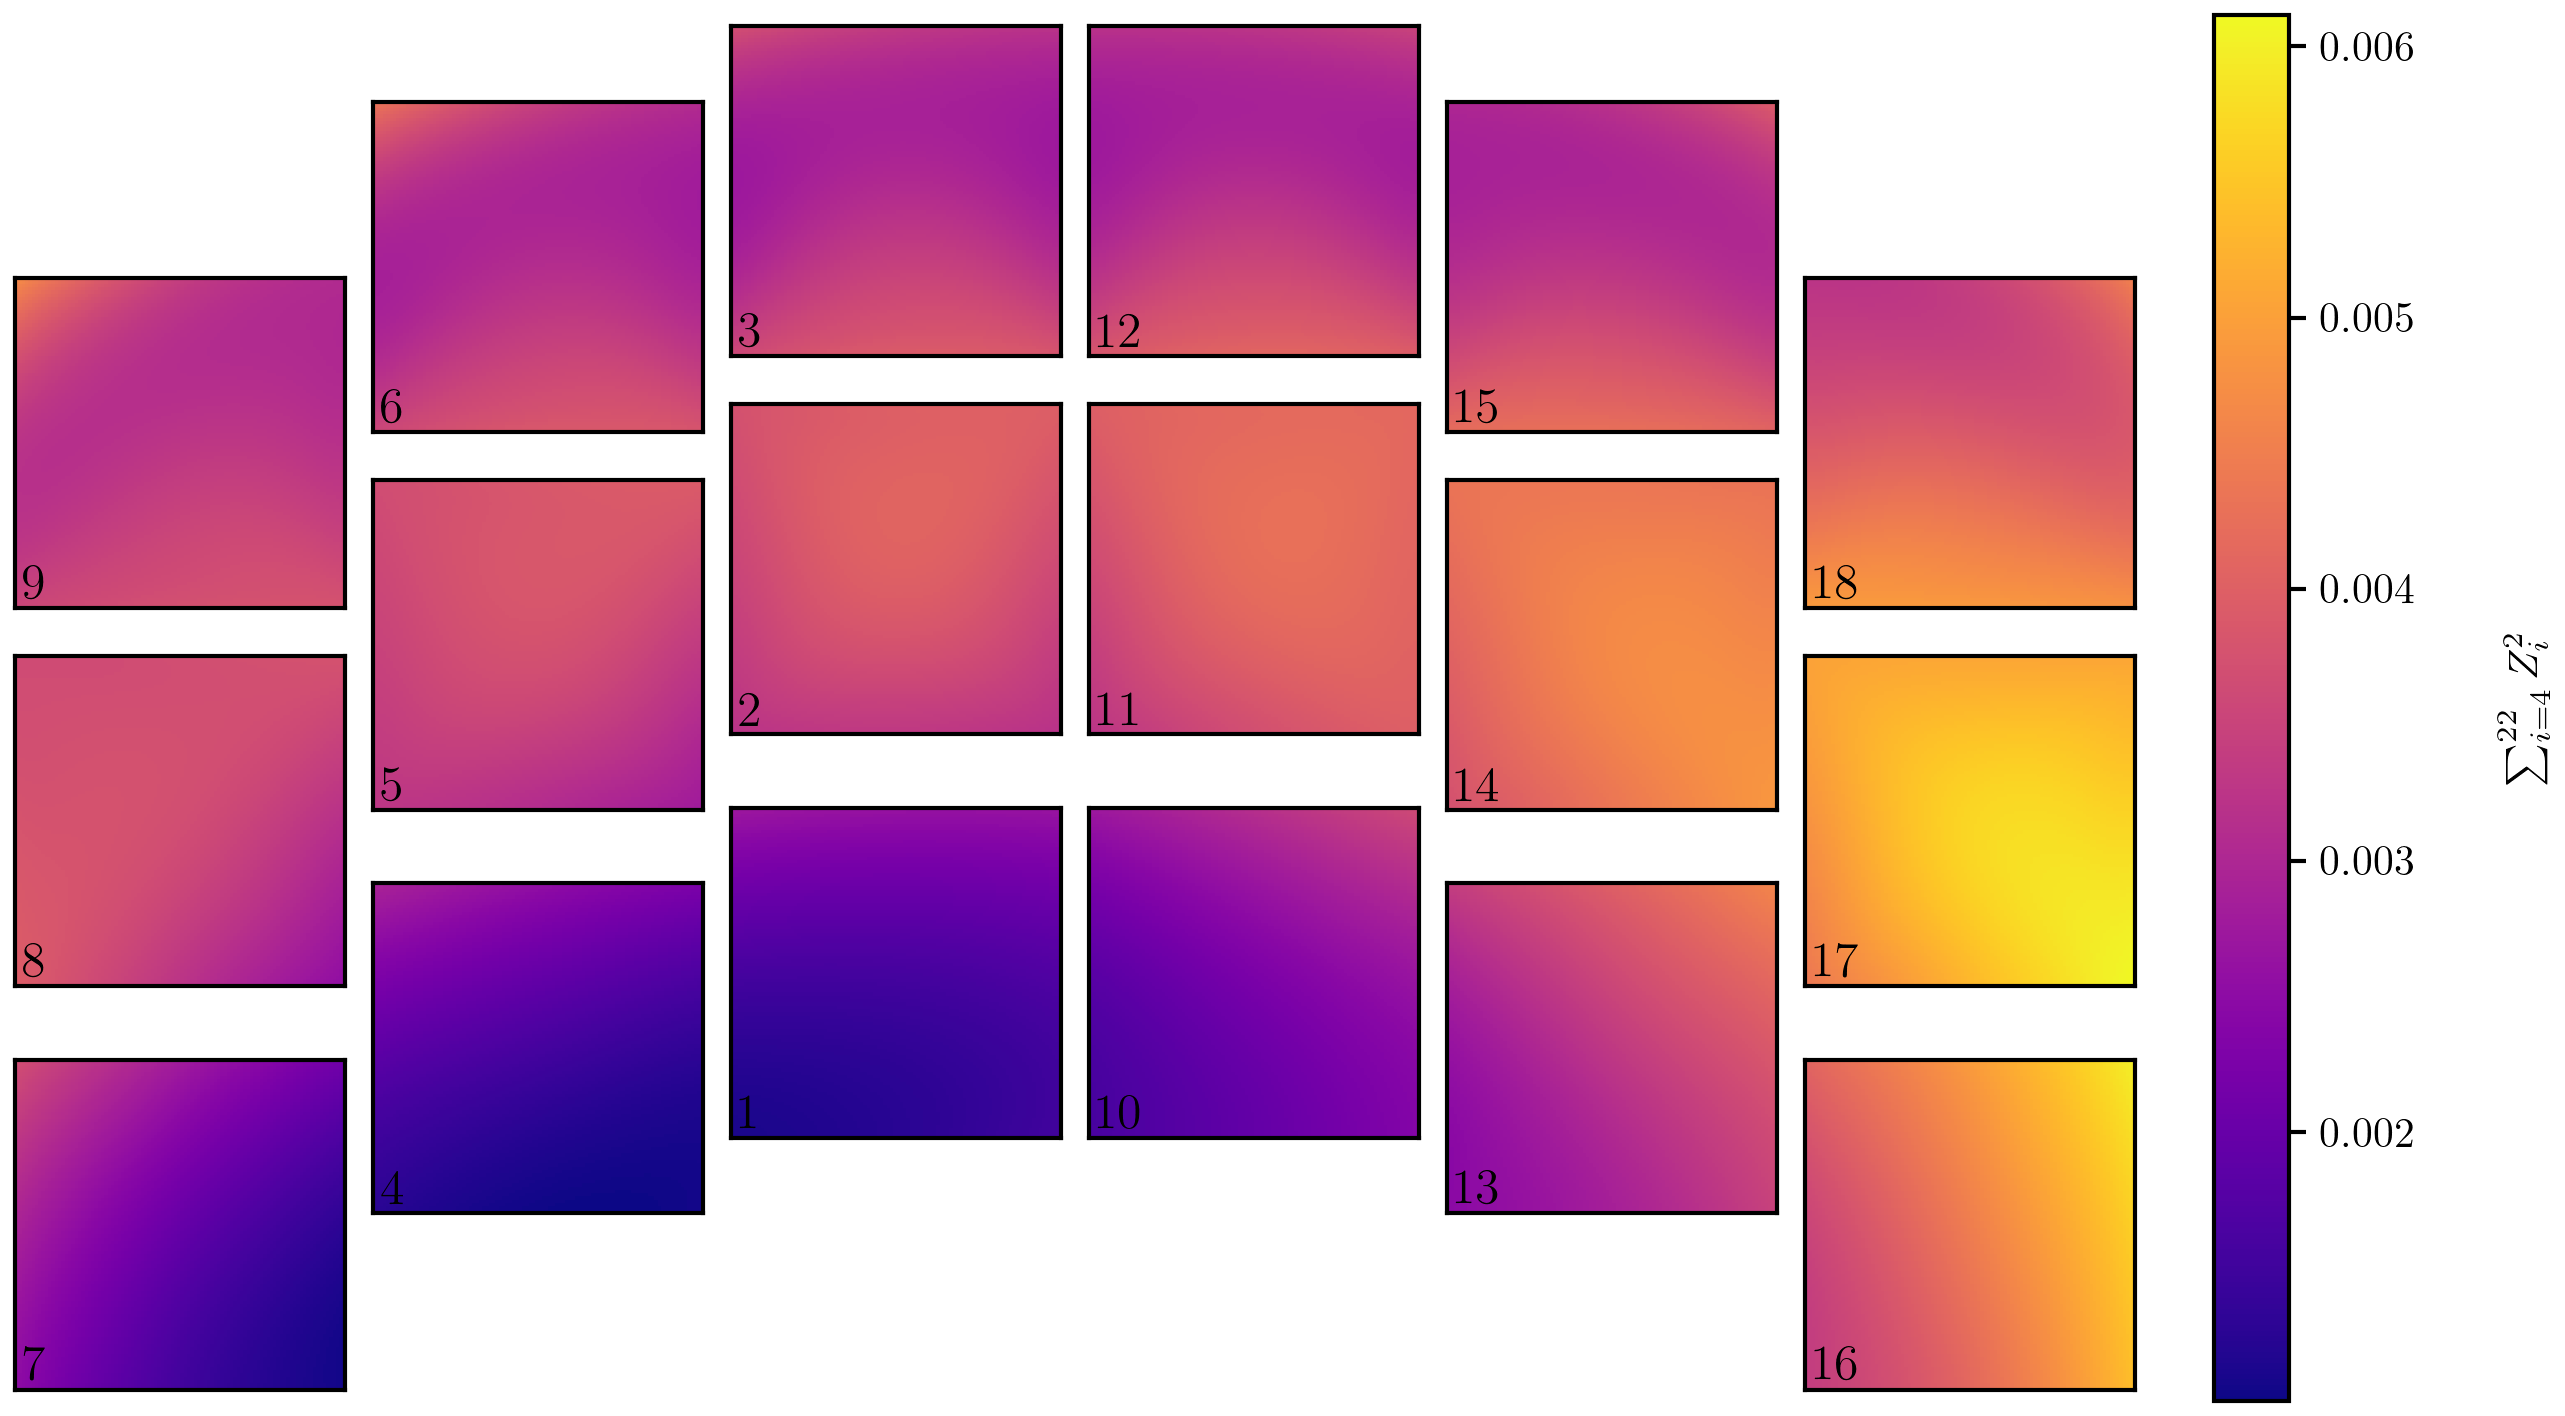

In [7]:
total_arrays = []

for j in range(0, 18):
    one_detector = [zernikes[i][j] for i in range(3, 22)]
    square_list = [i ** 2 for i in one_detector]
    total_arrays.append(np.sum(square_list, axis=0))

np.save(os.path.join(input_dir, 'sum_z4_z22.npy'), total_arrays)

plotting.roman_sca_plot(np.asarray(total_arrays), np.asarray(range(1, 19)), residual_plot=False, show_sca_id=True, cmap='plasma', savefig=True, savepath=os.path.join(figure_dir, 'zernike.png'), clabel=r'$\sum_{i=4}^{22} Z_i^2$')

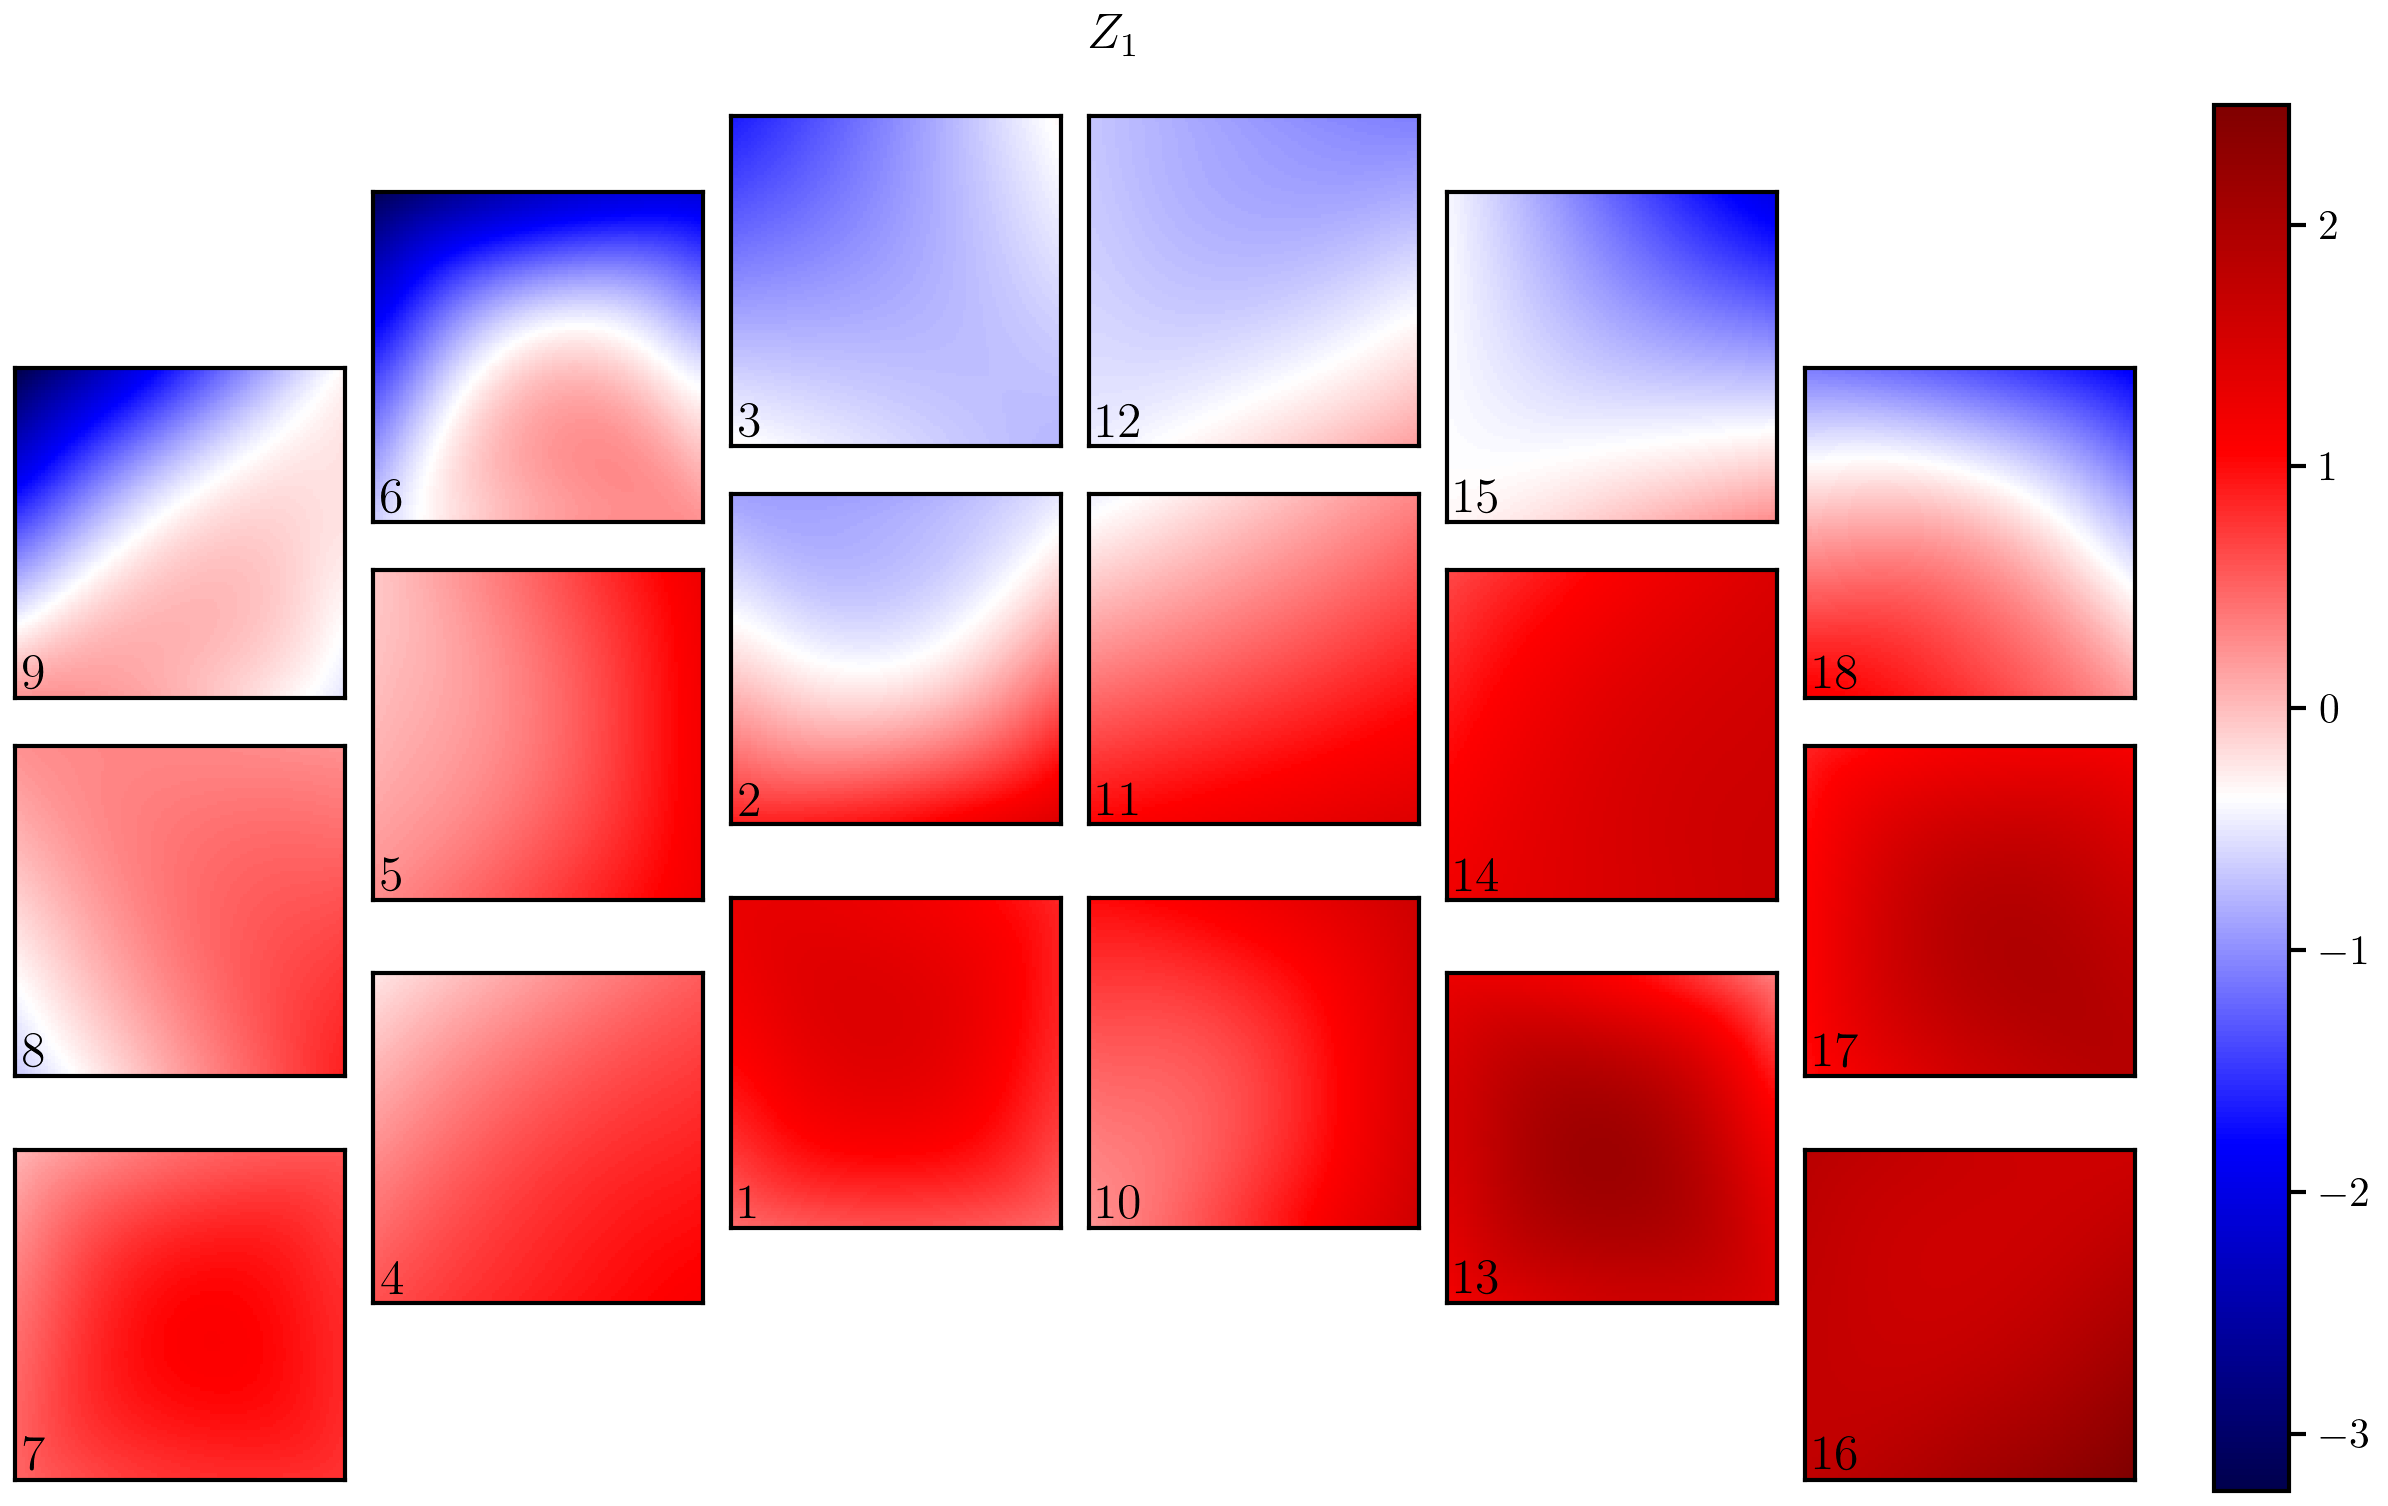

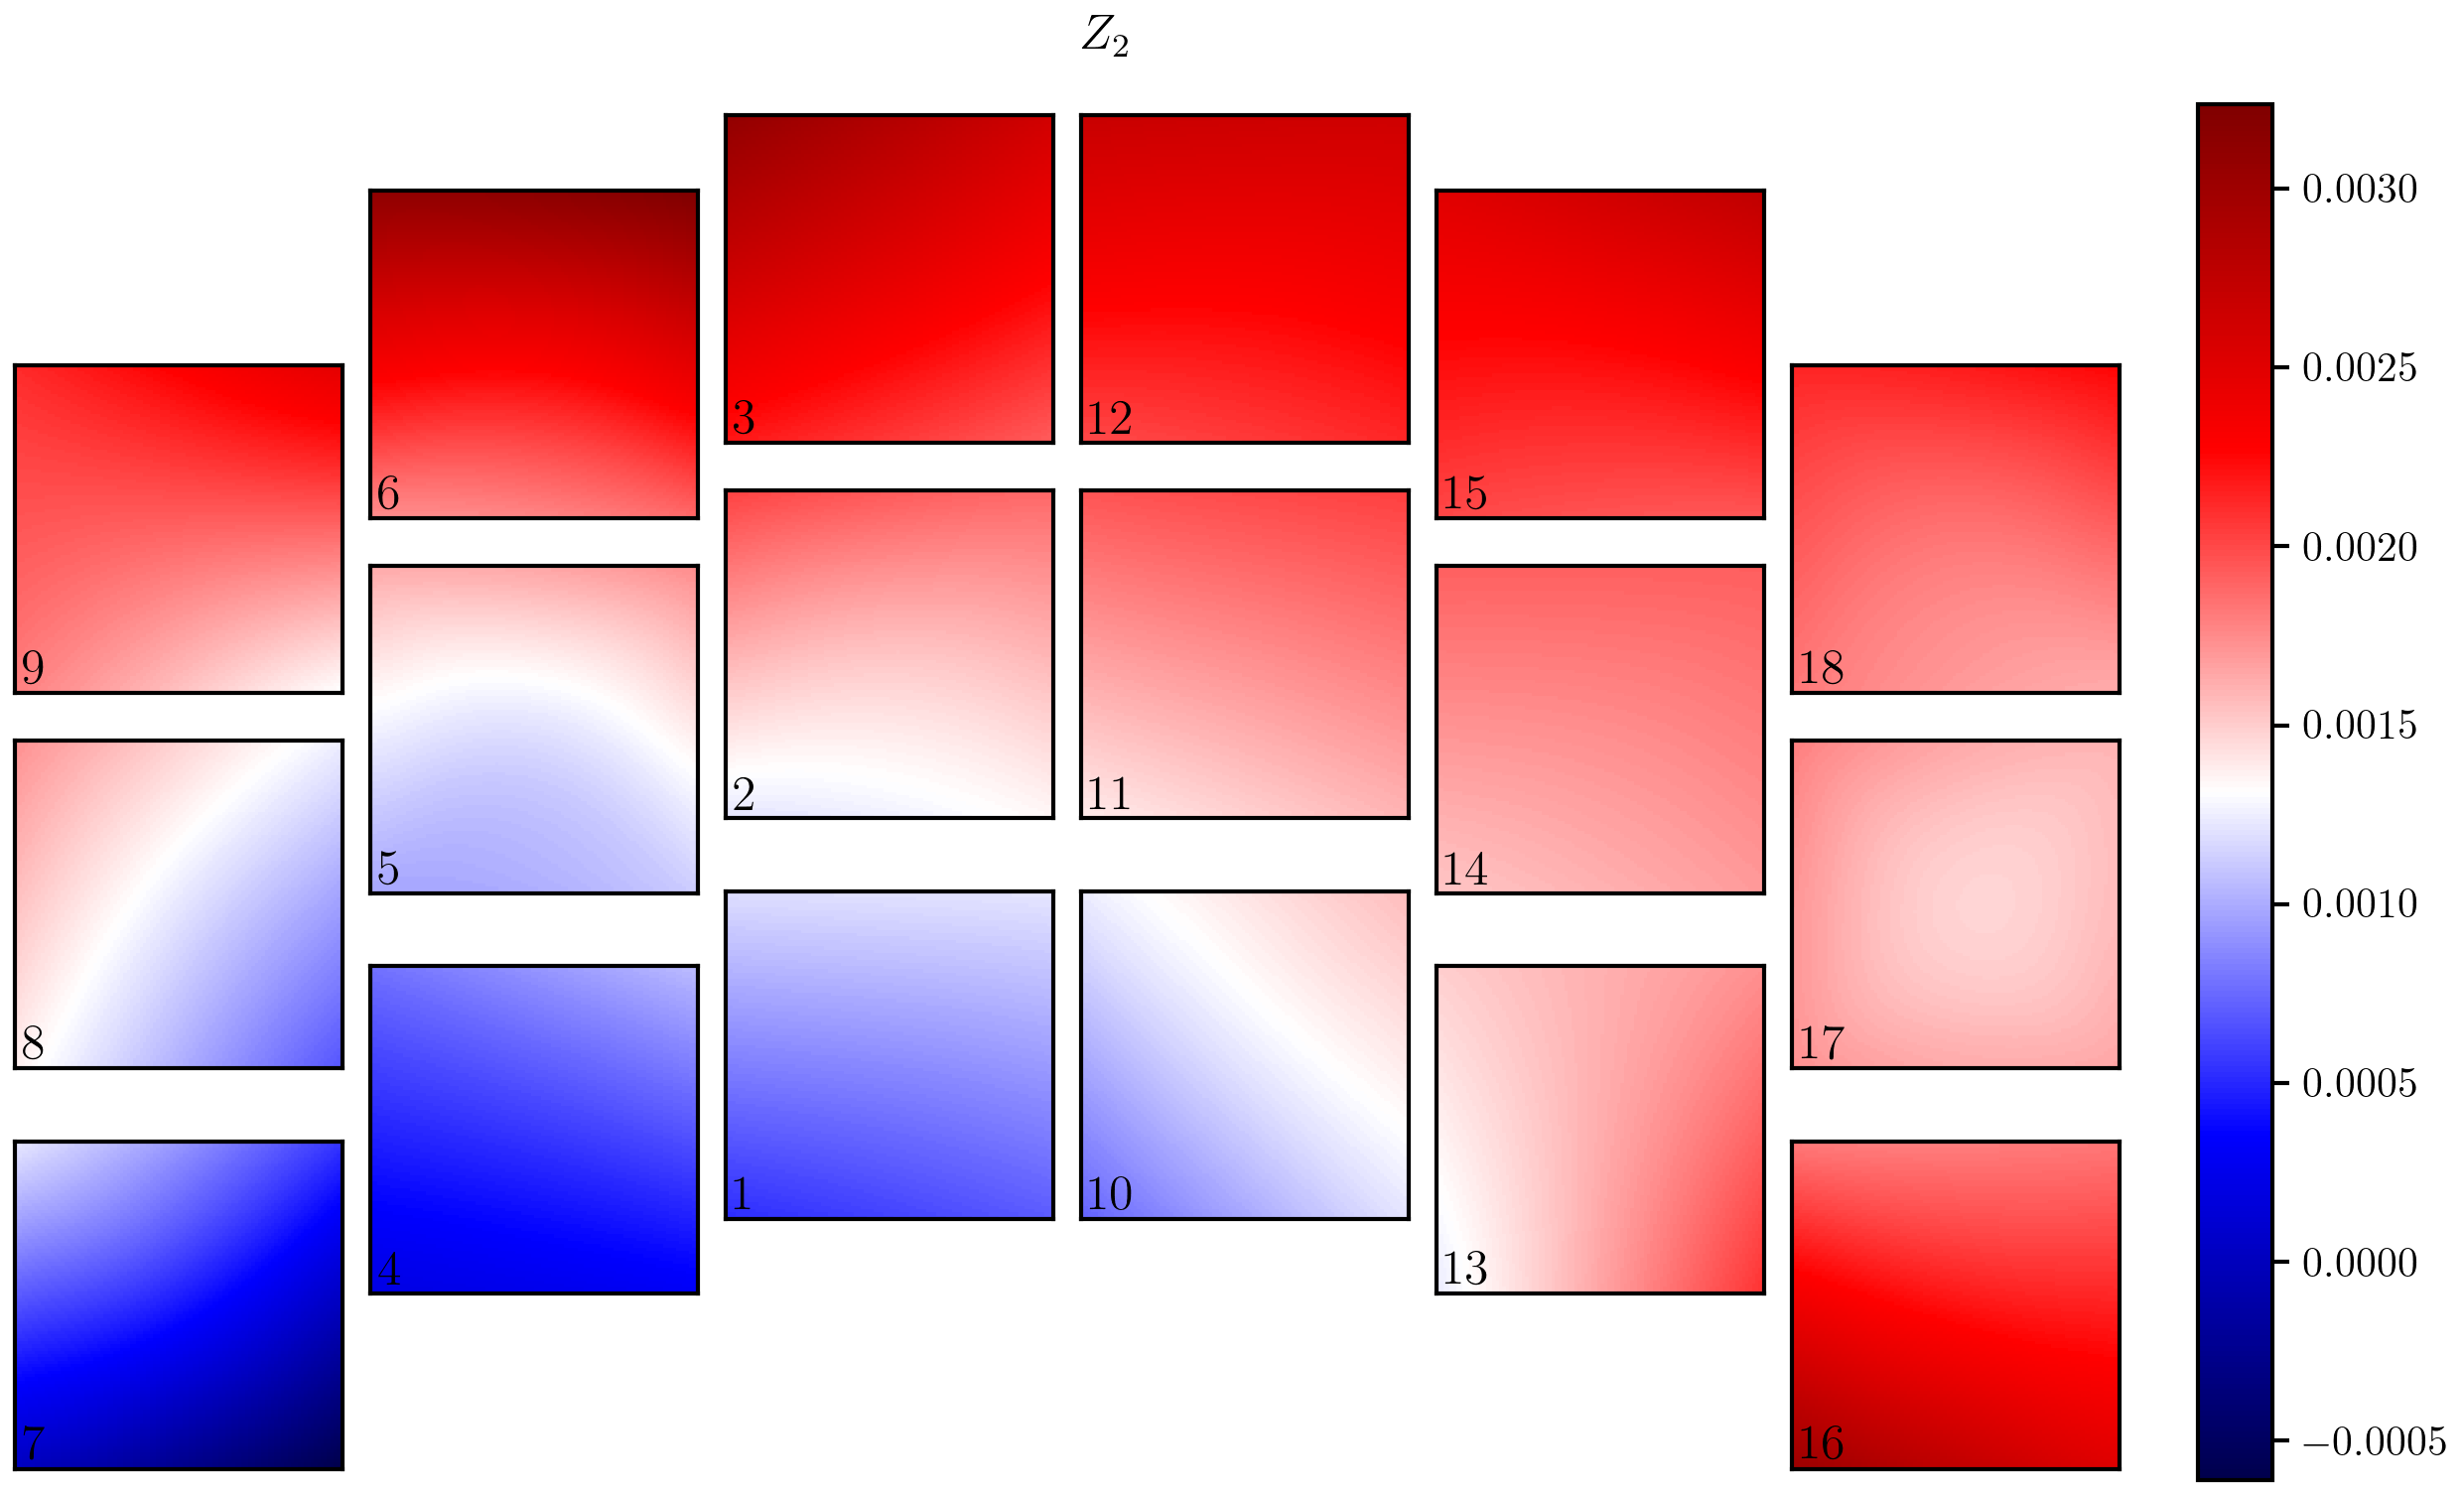

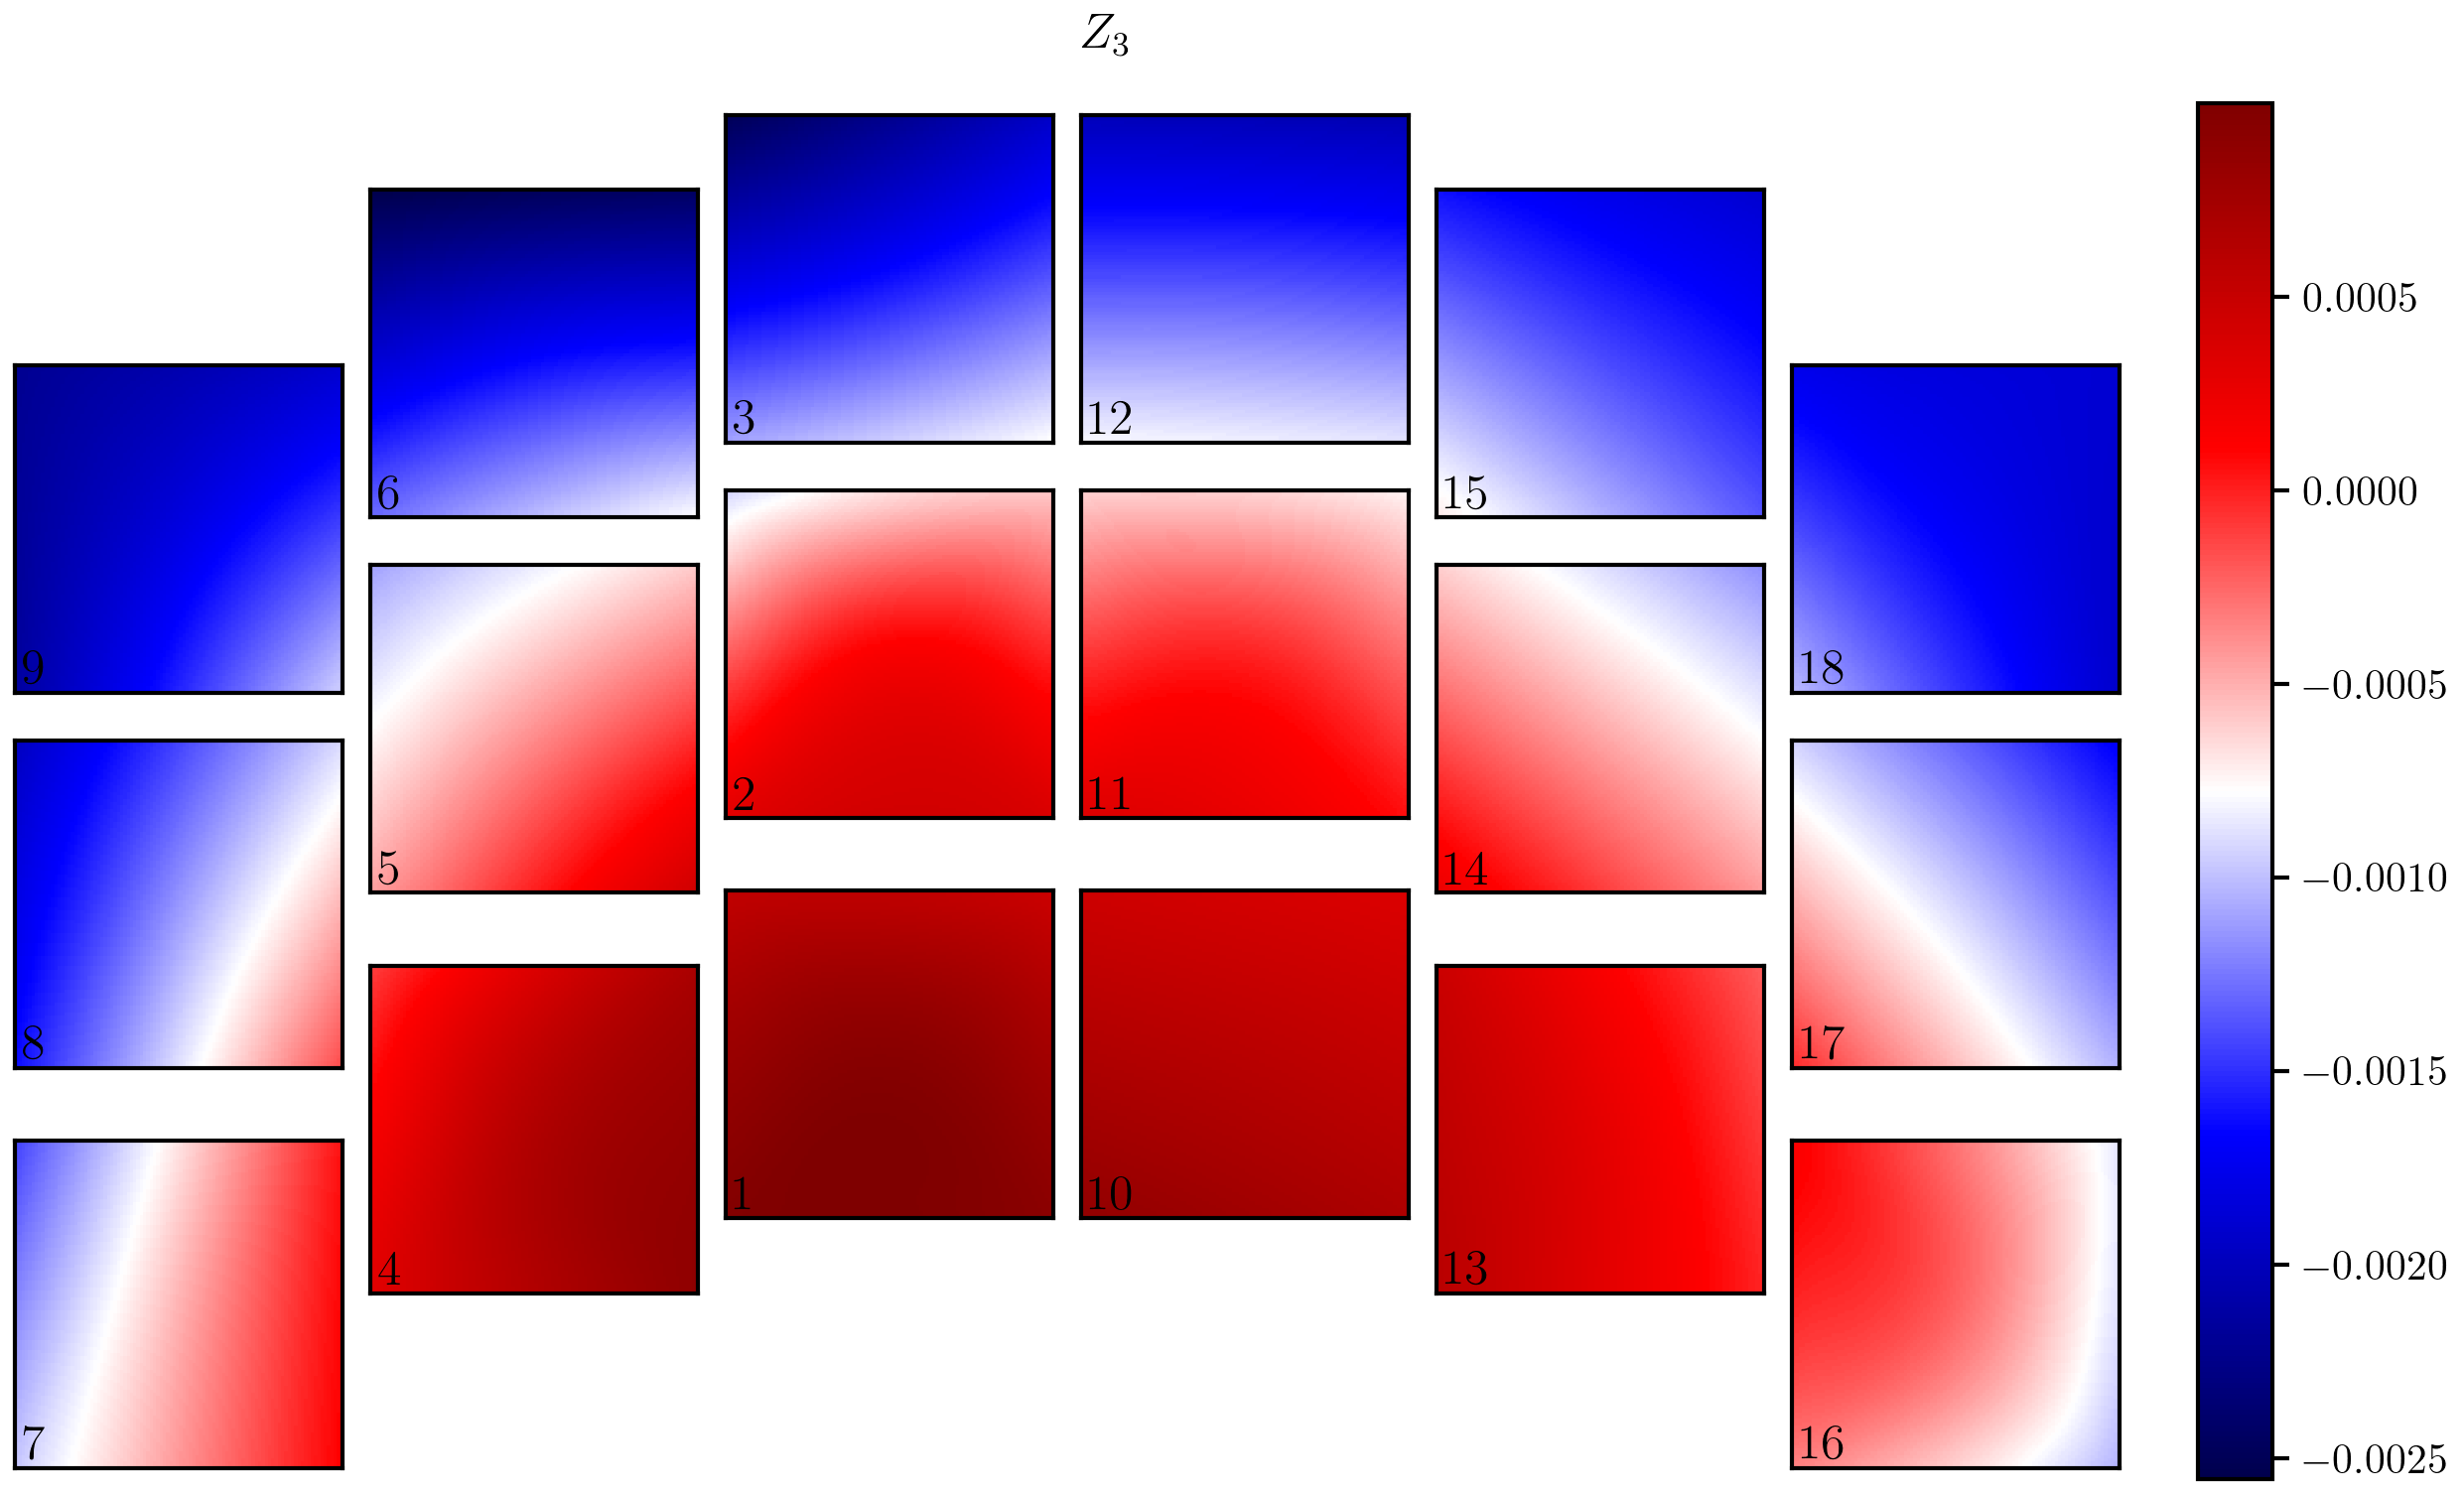

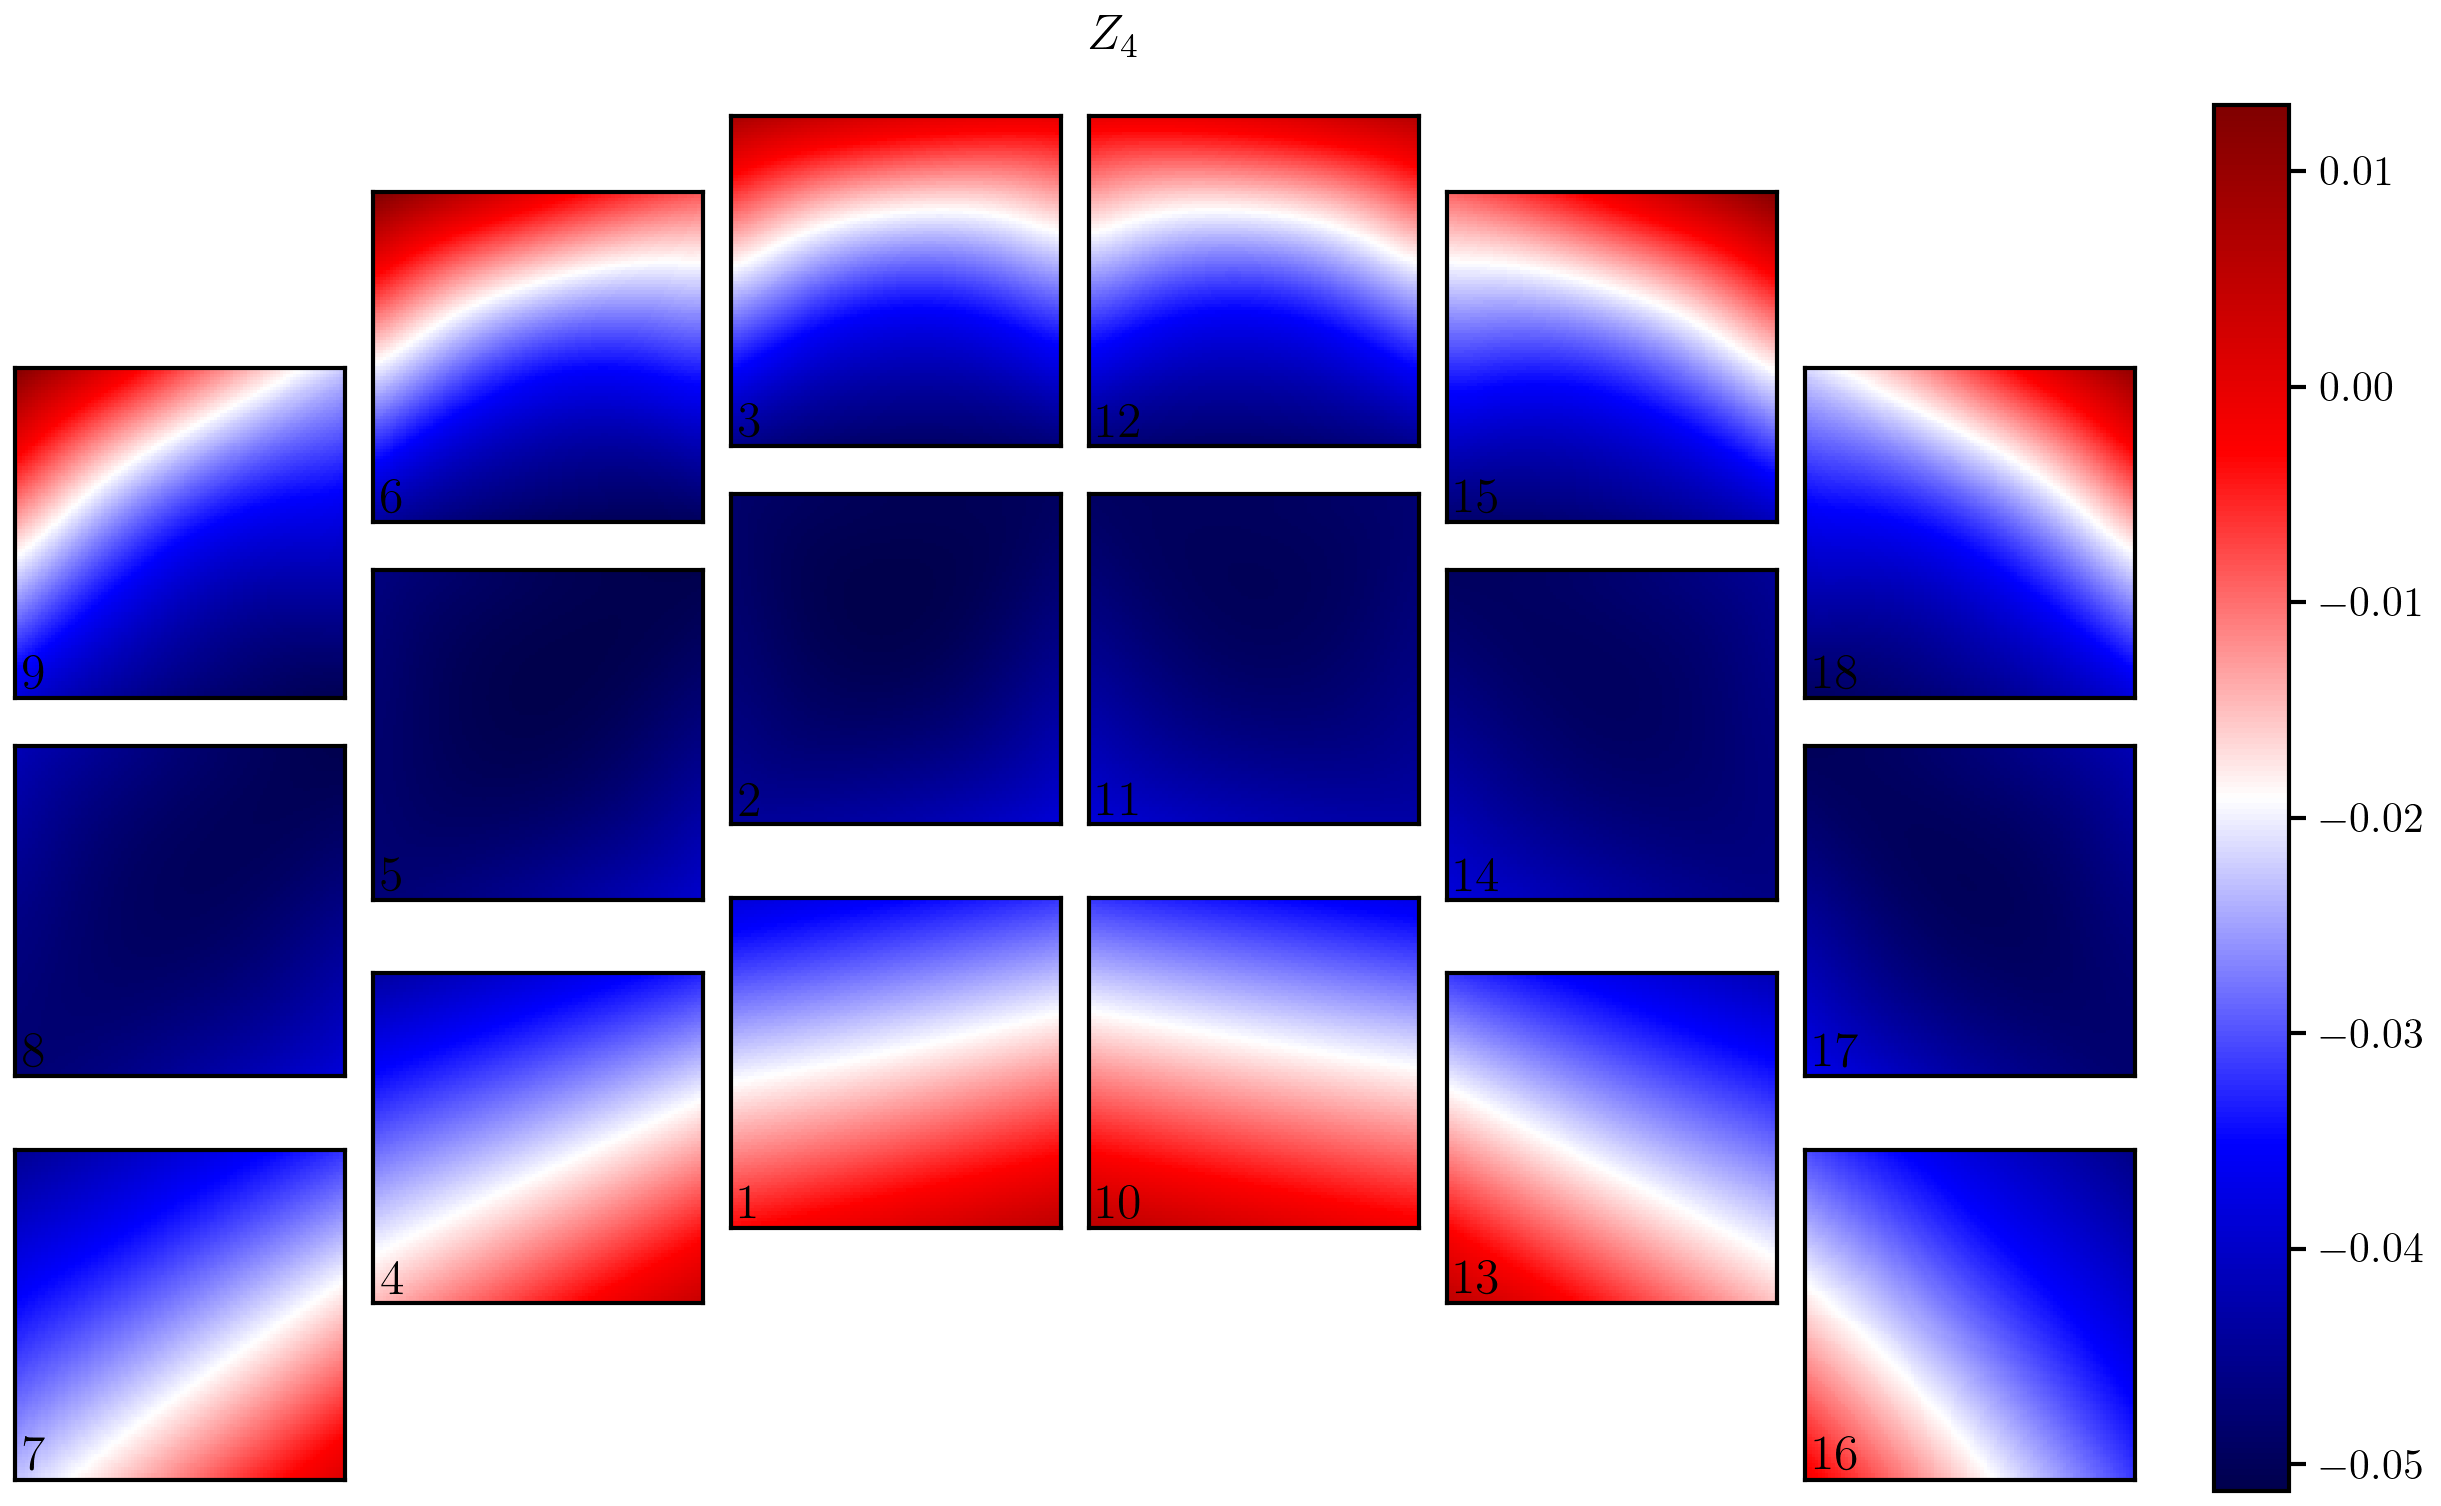

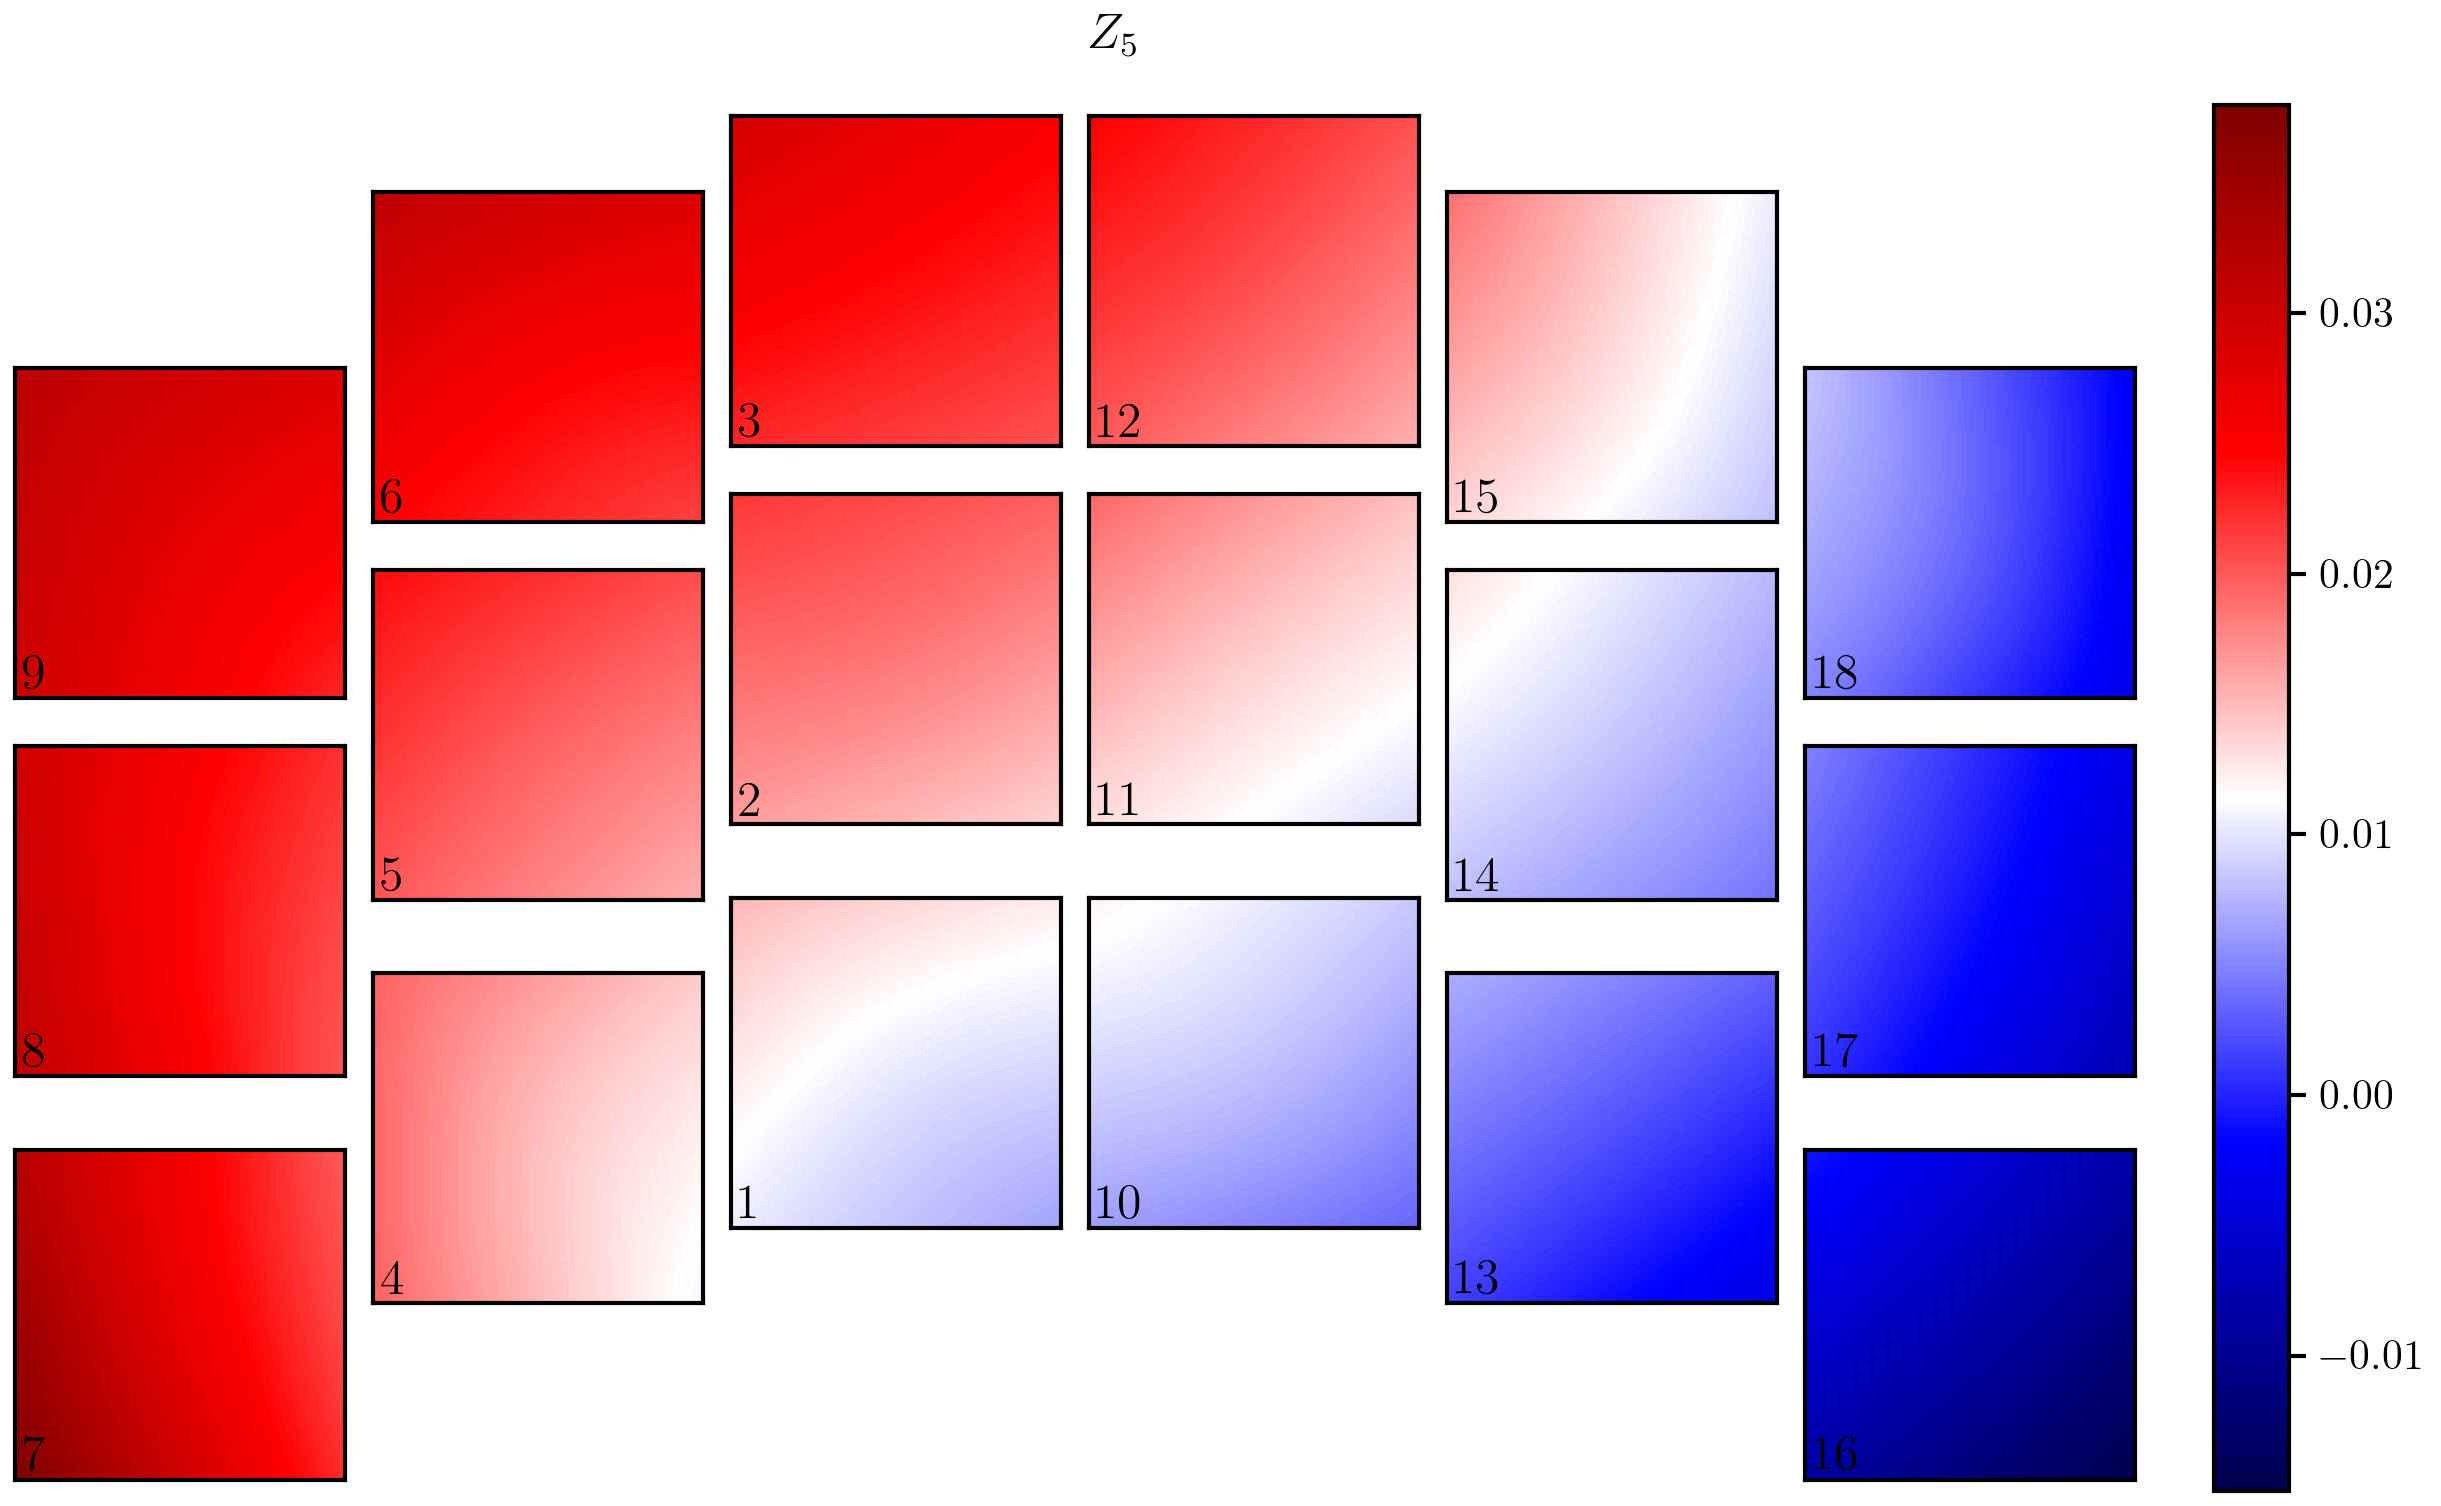

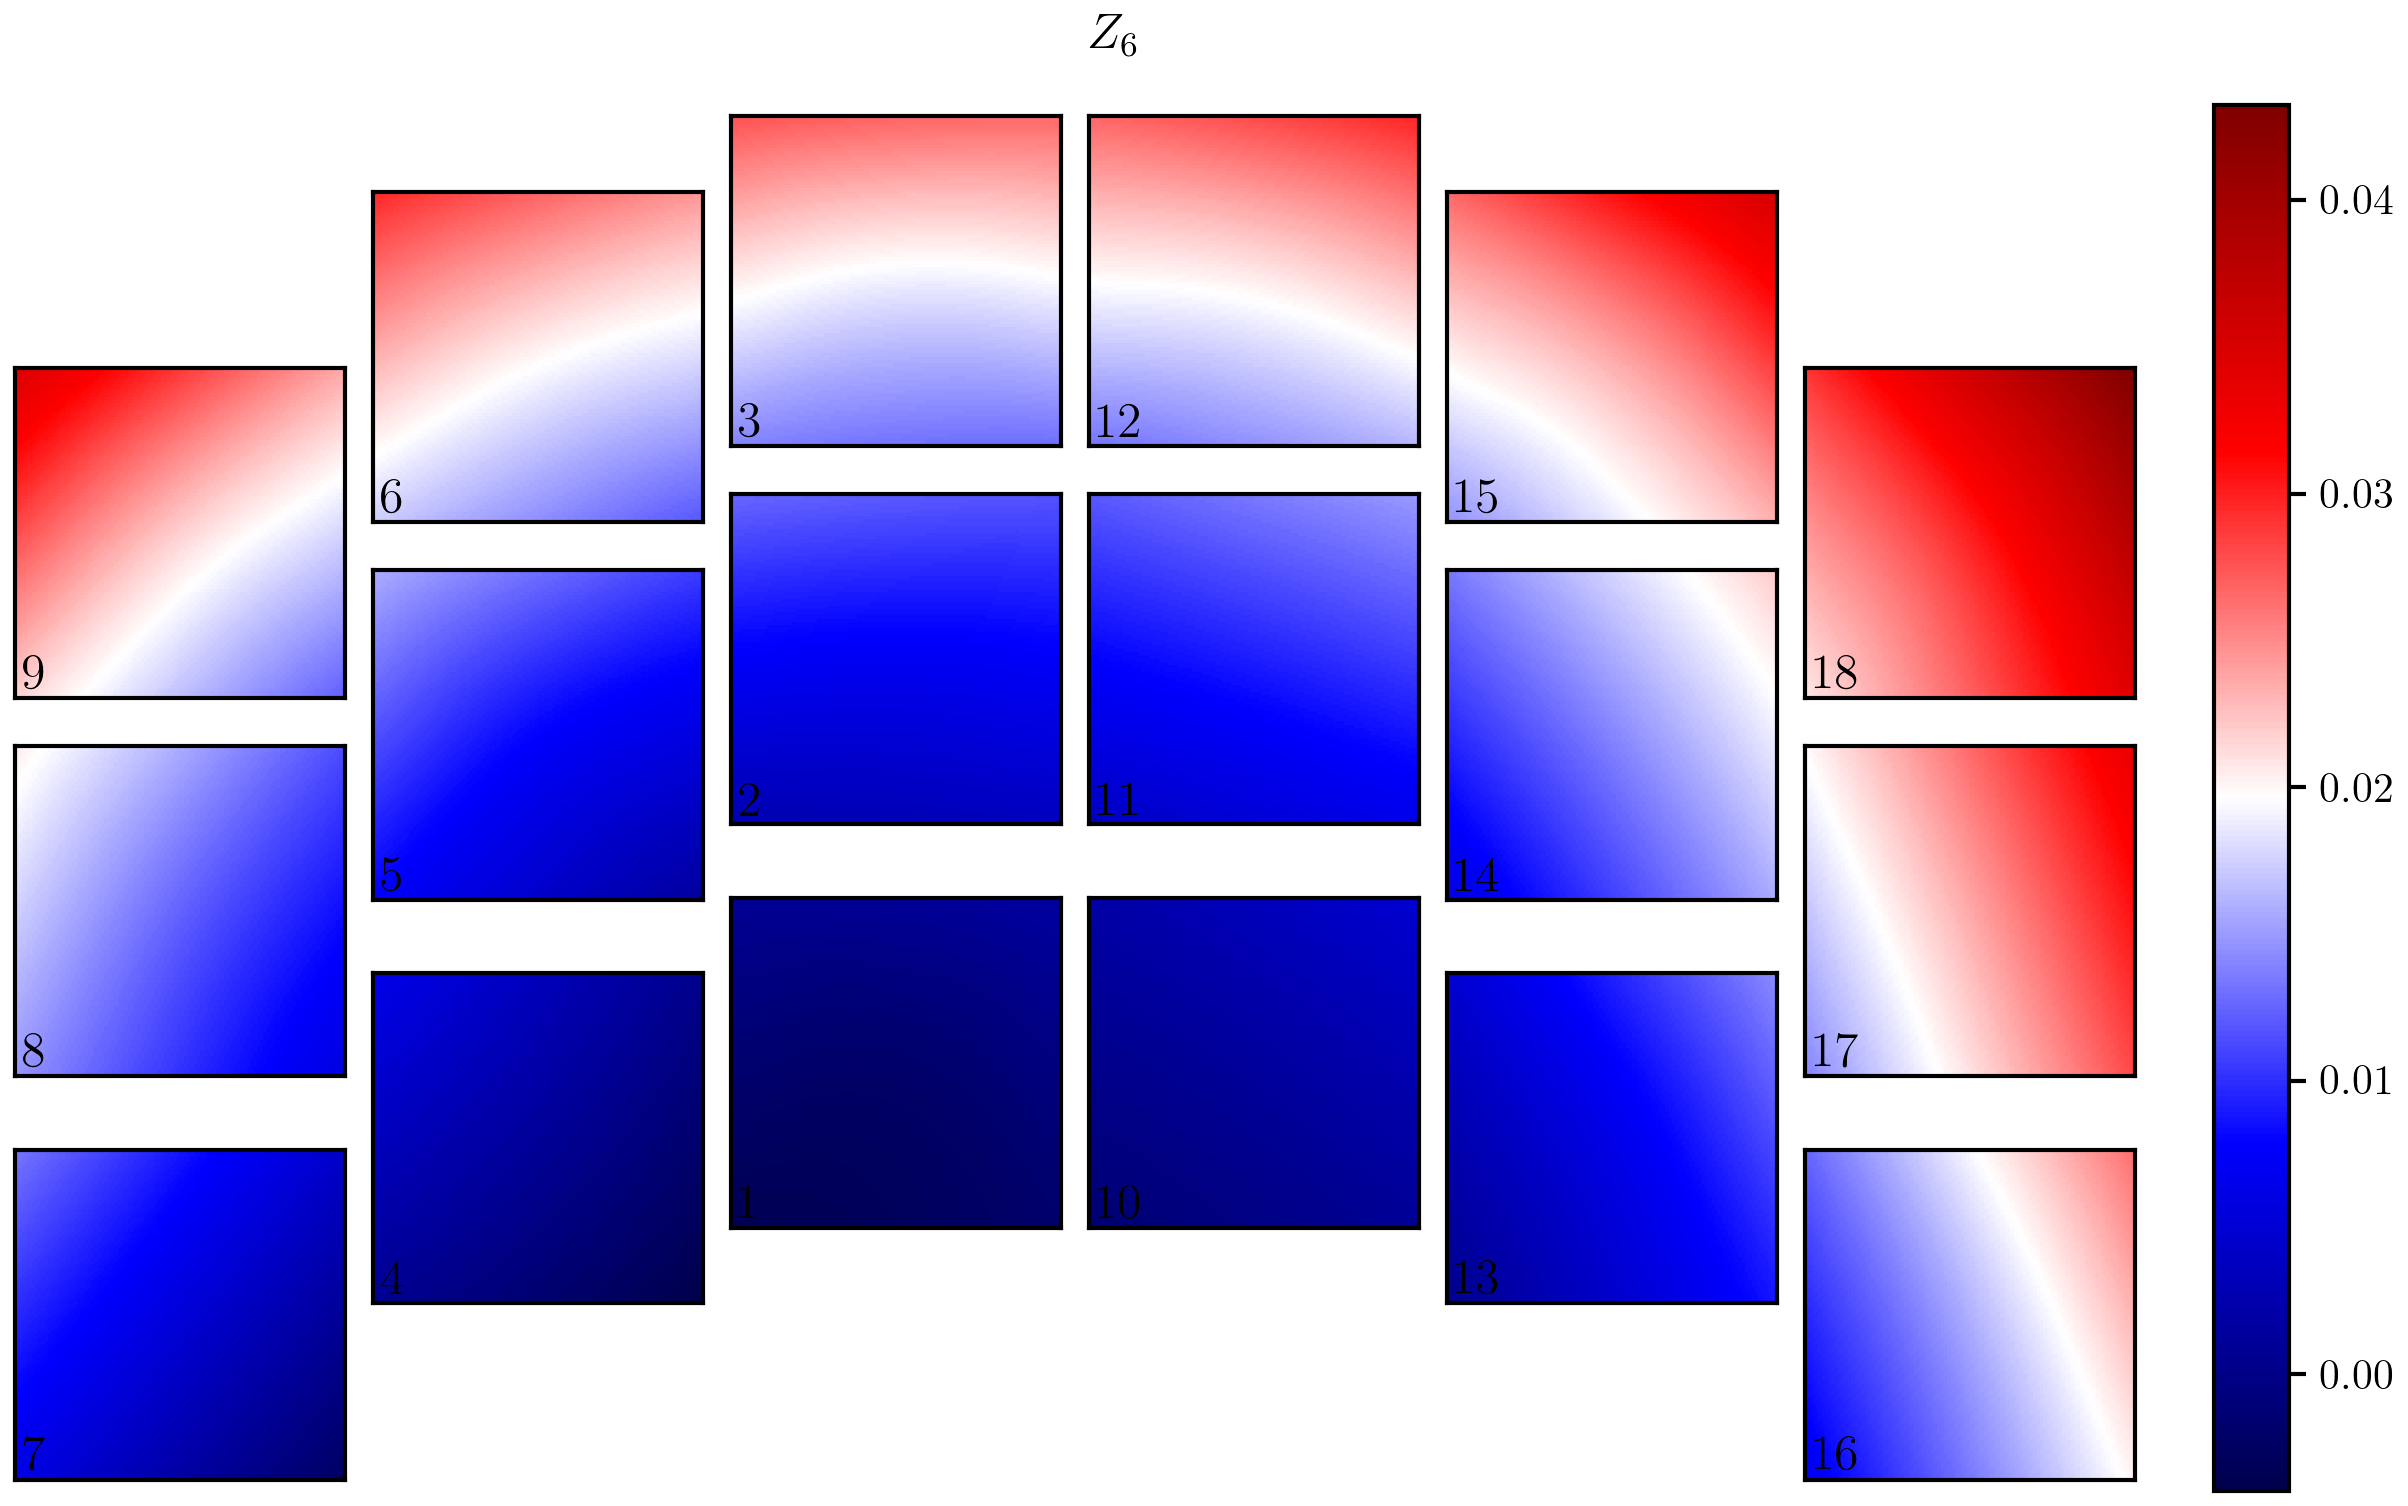

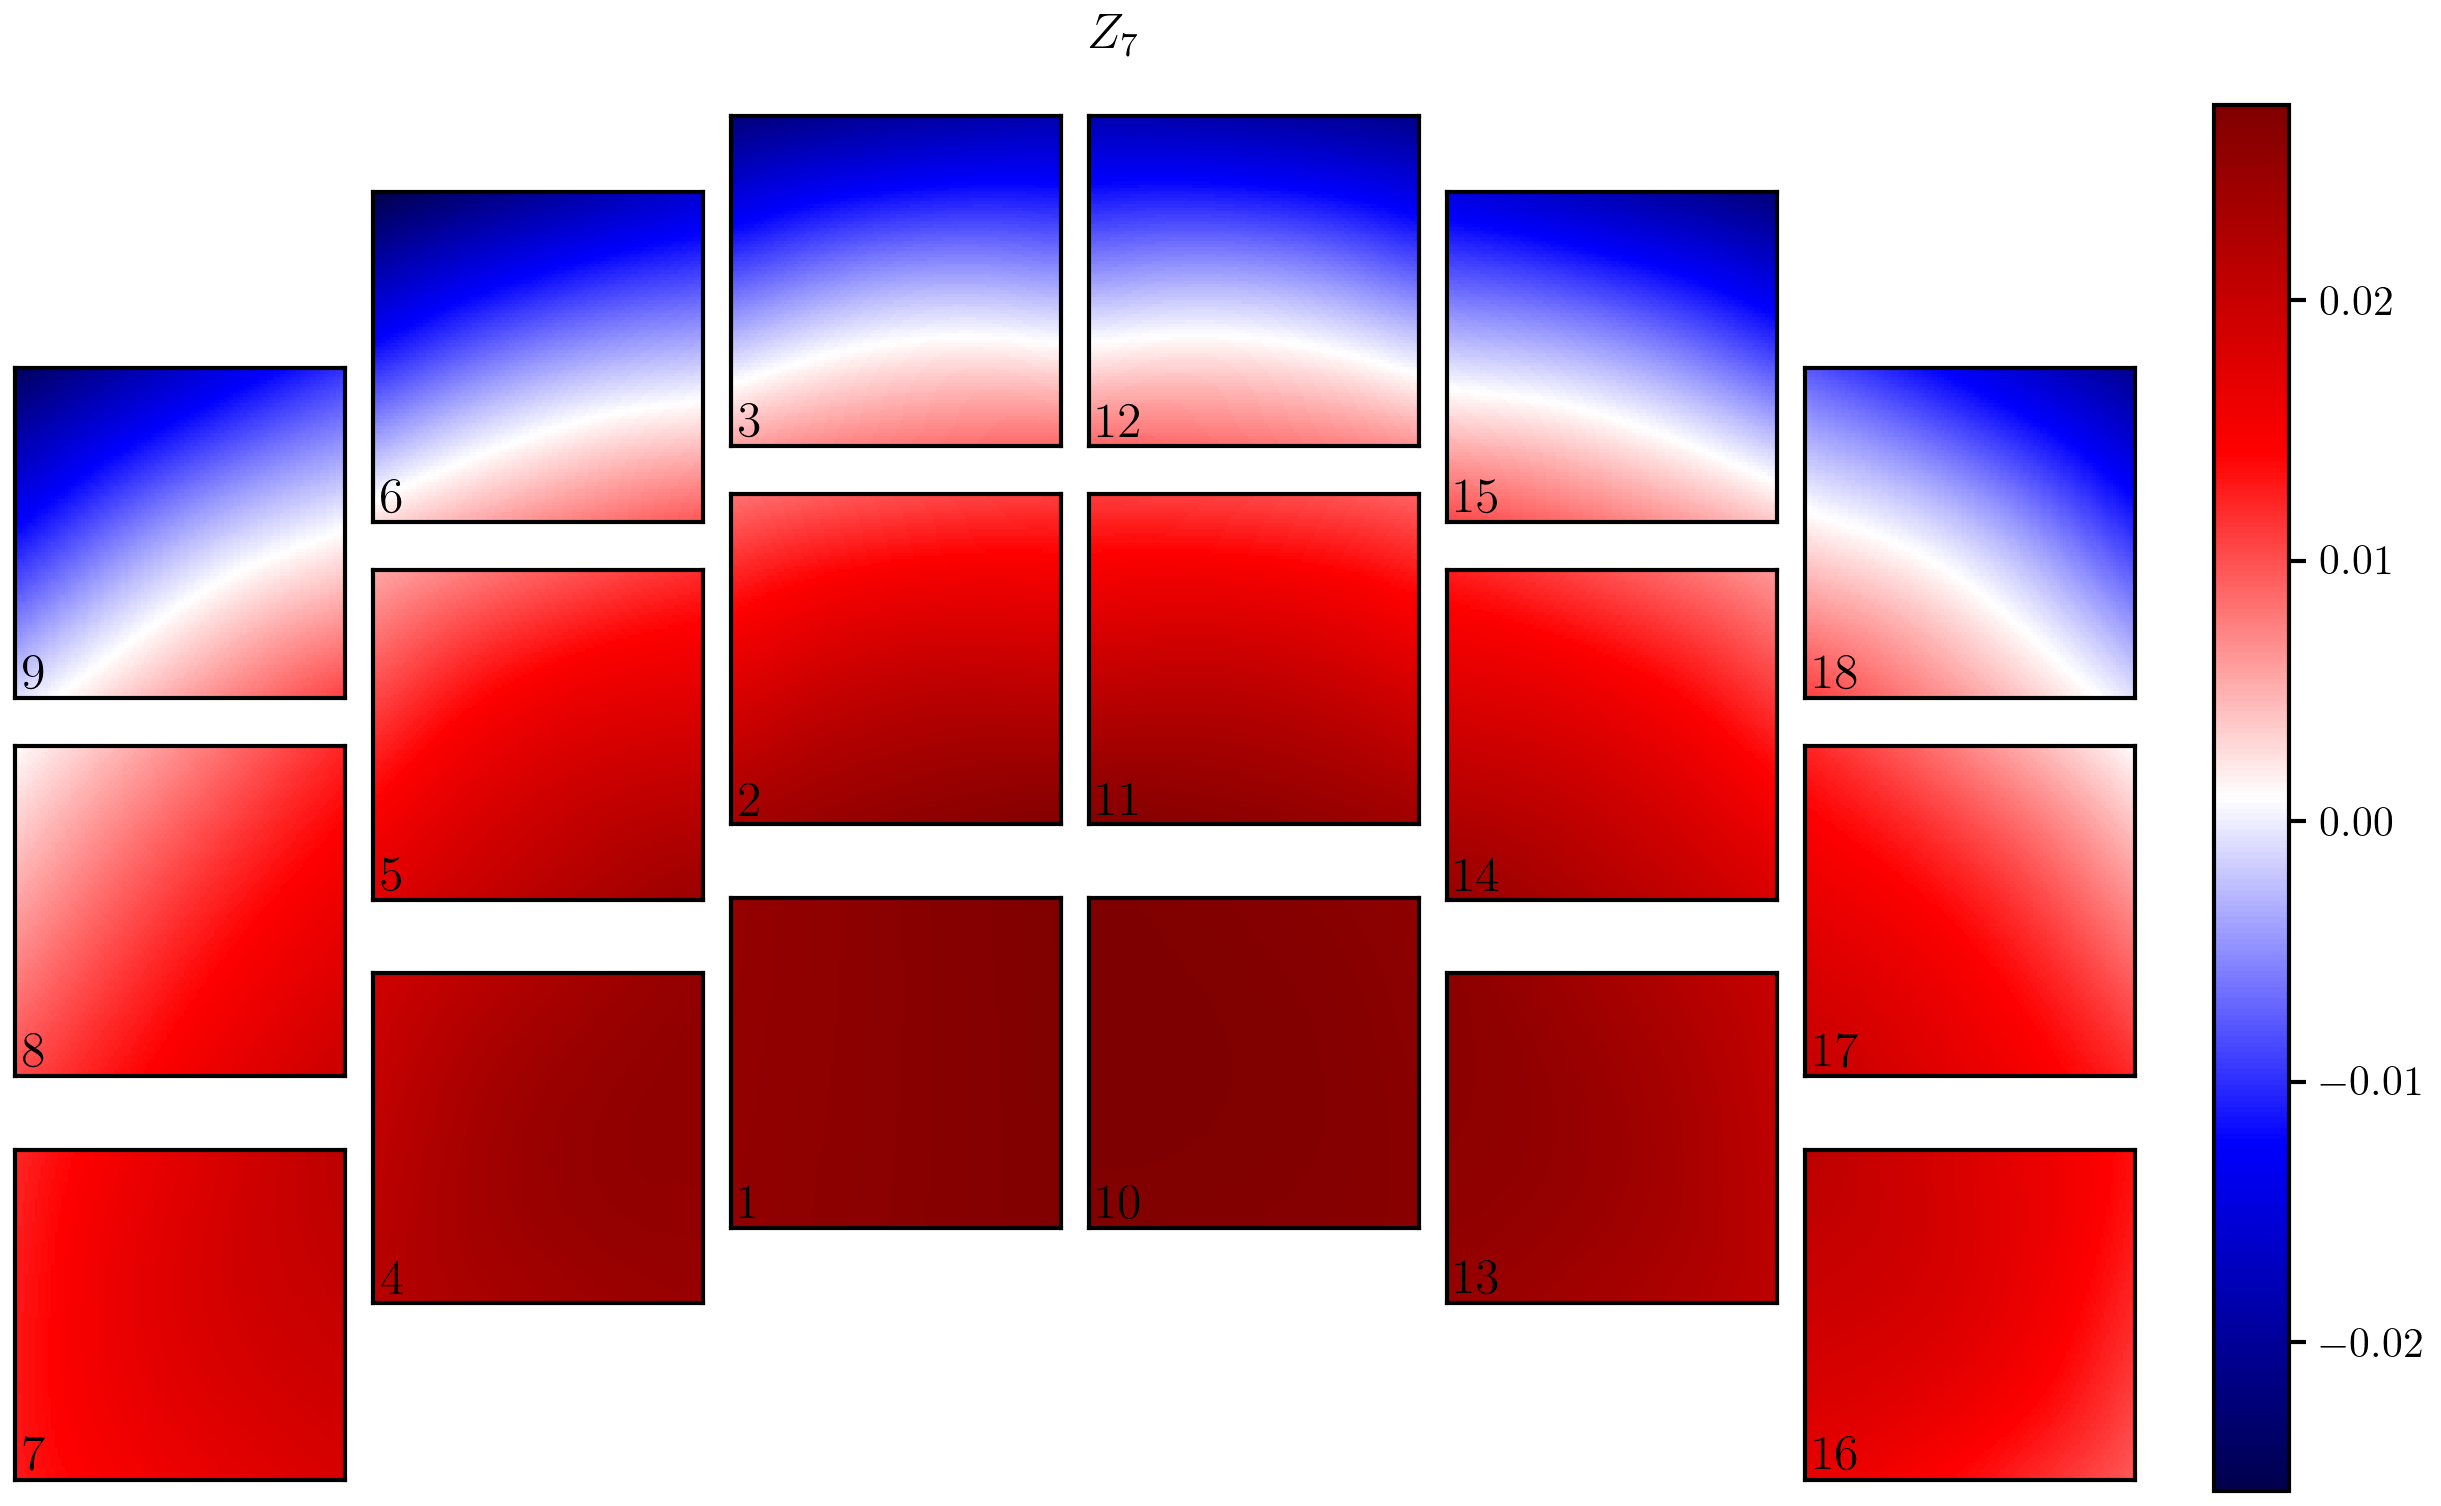

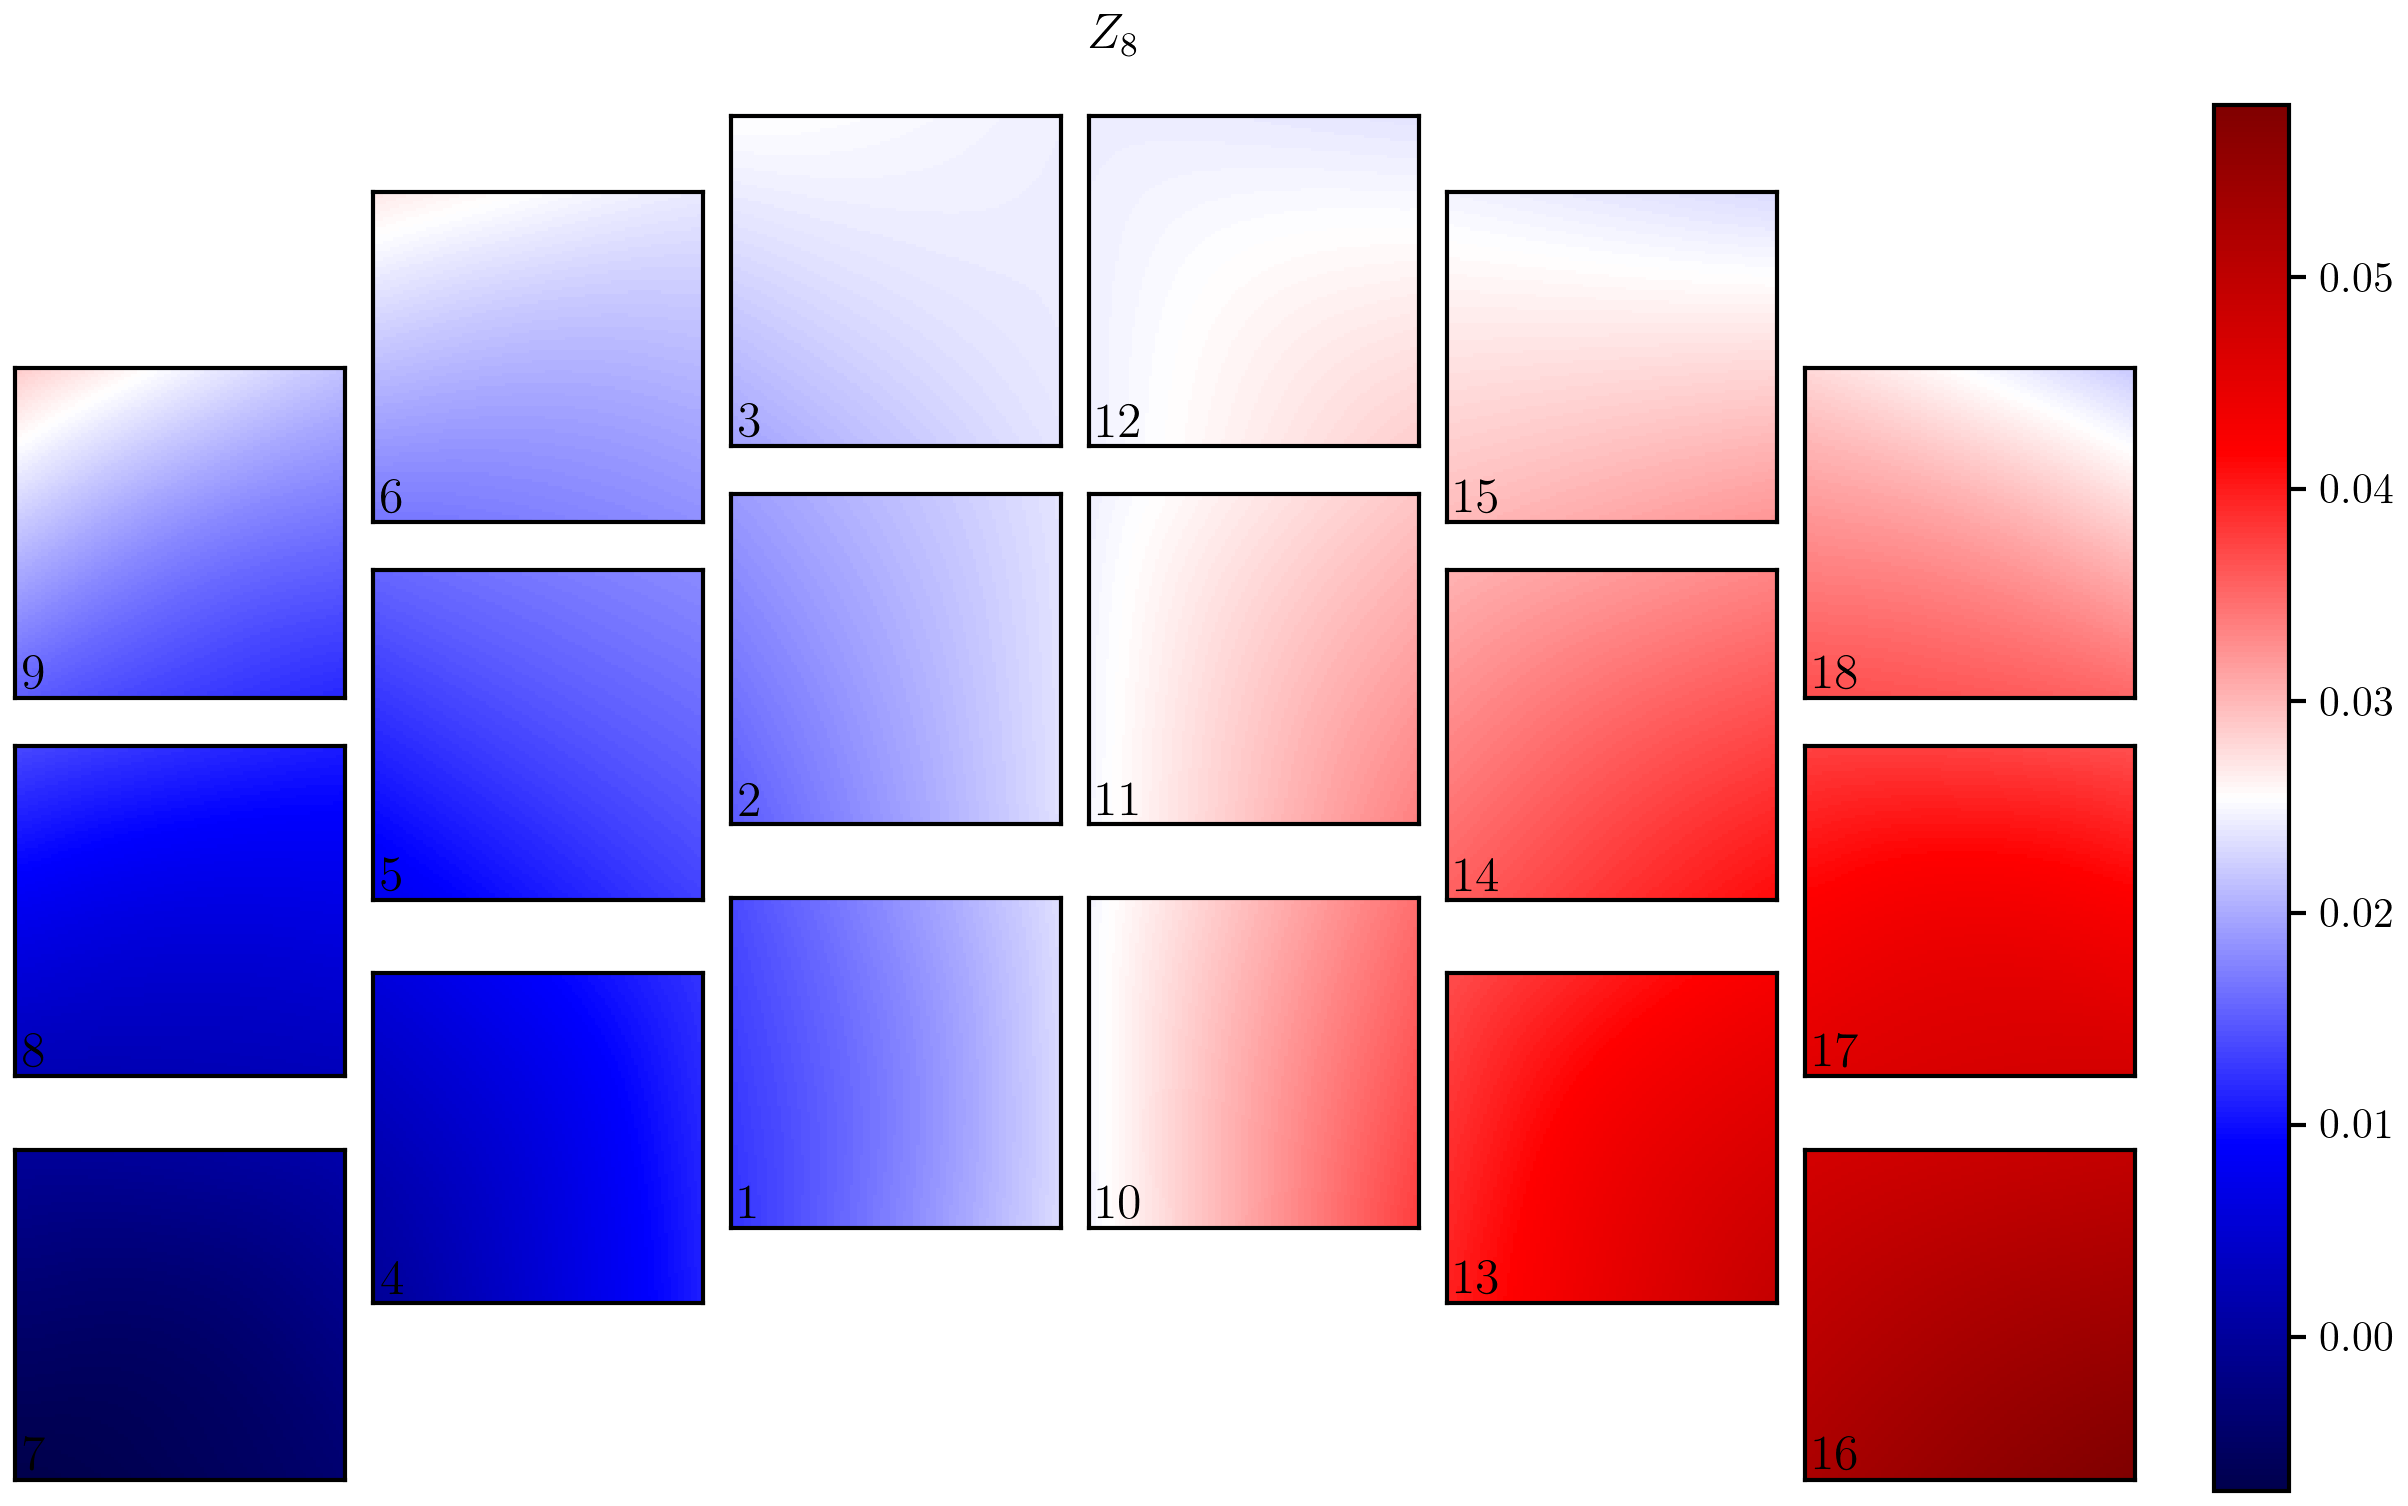

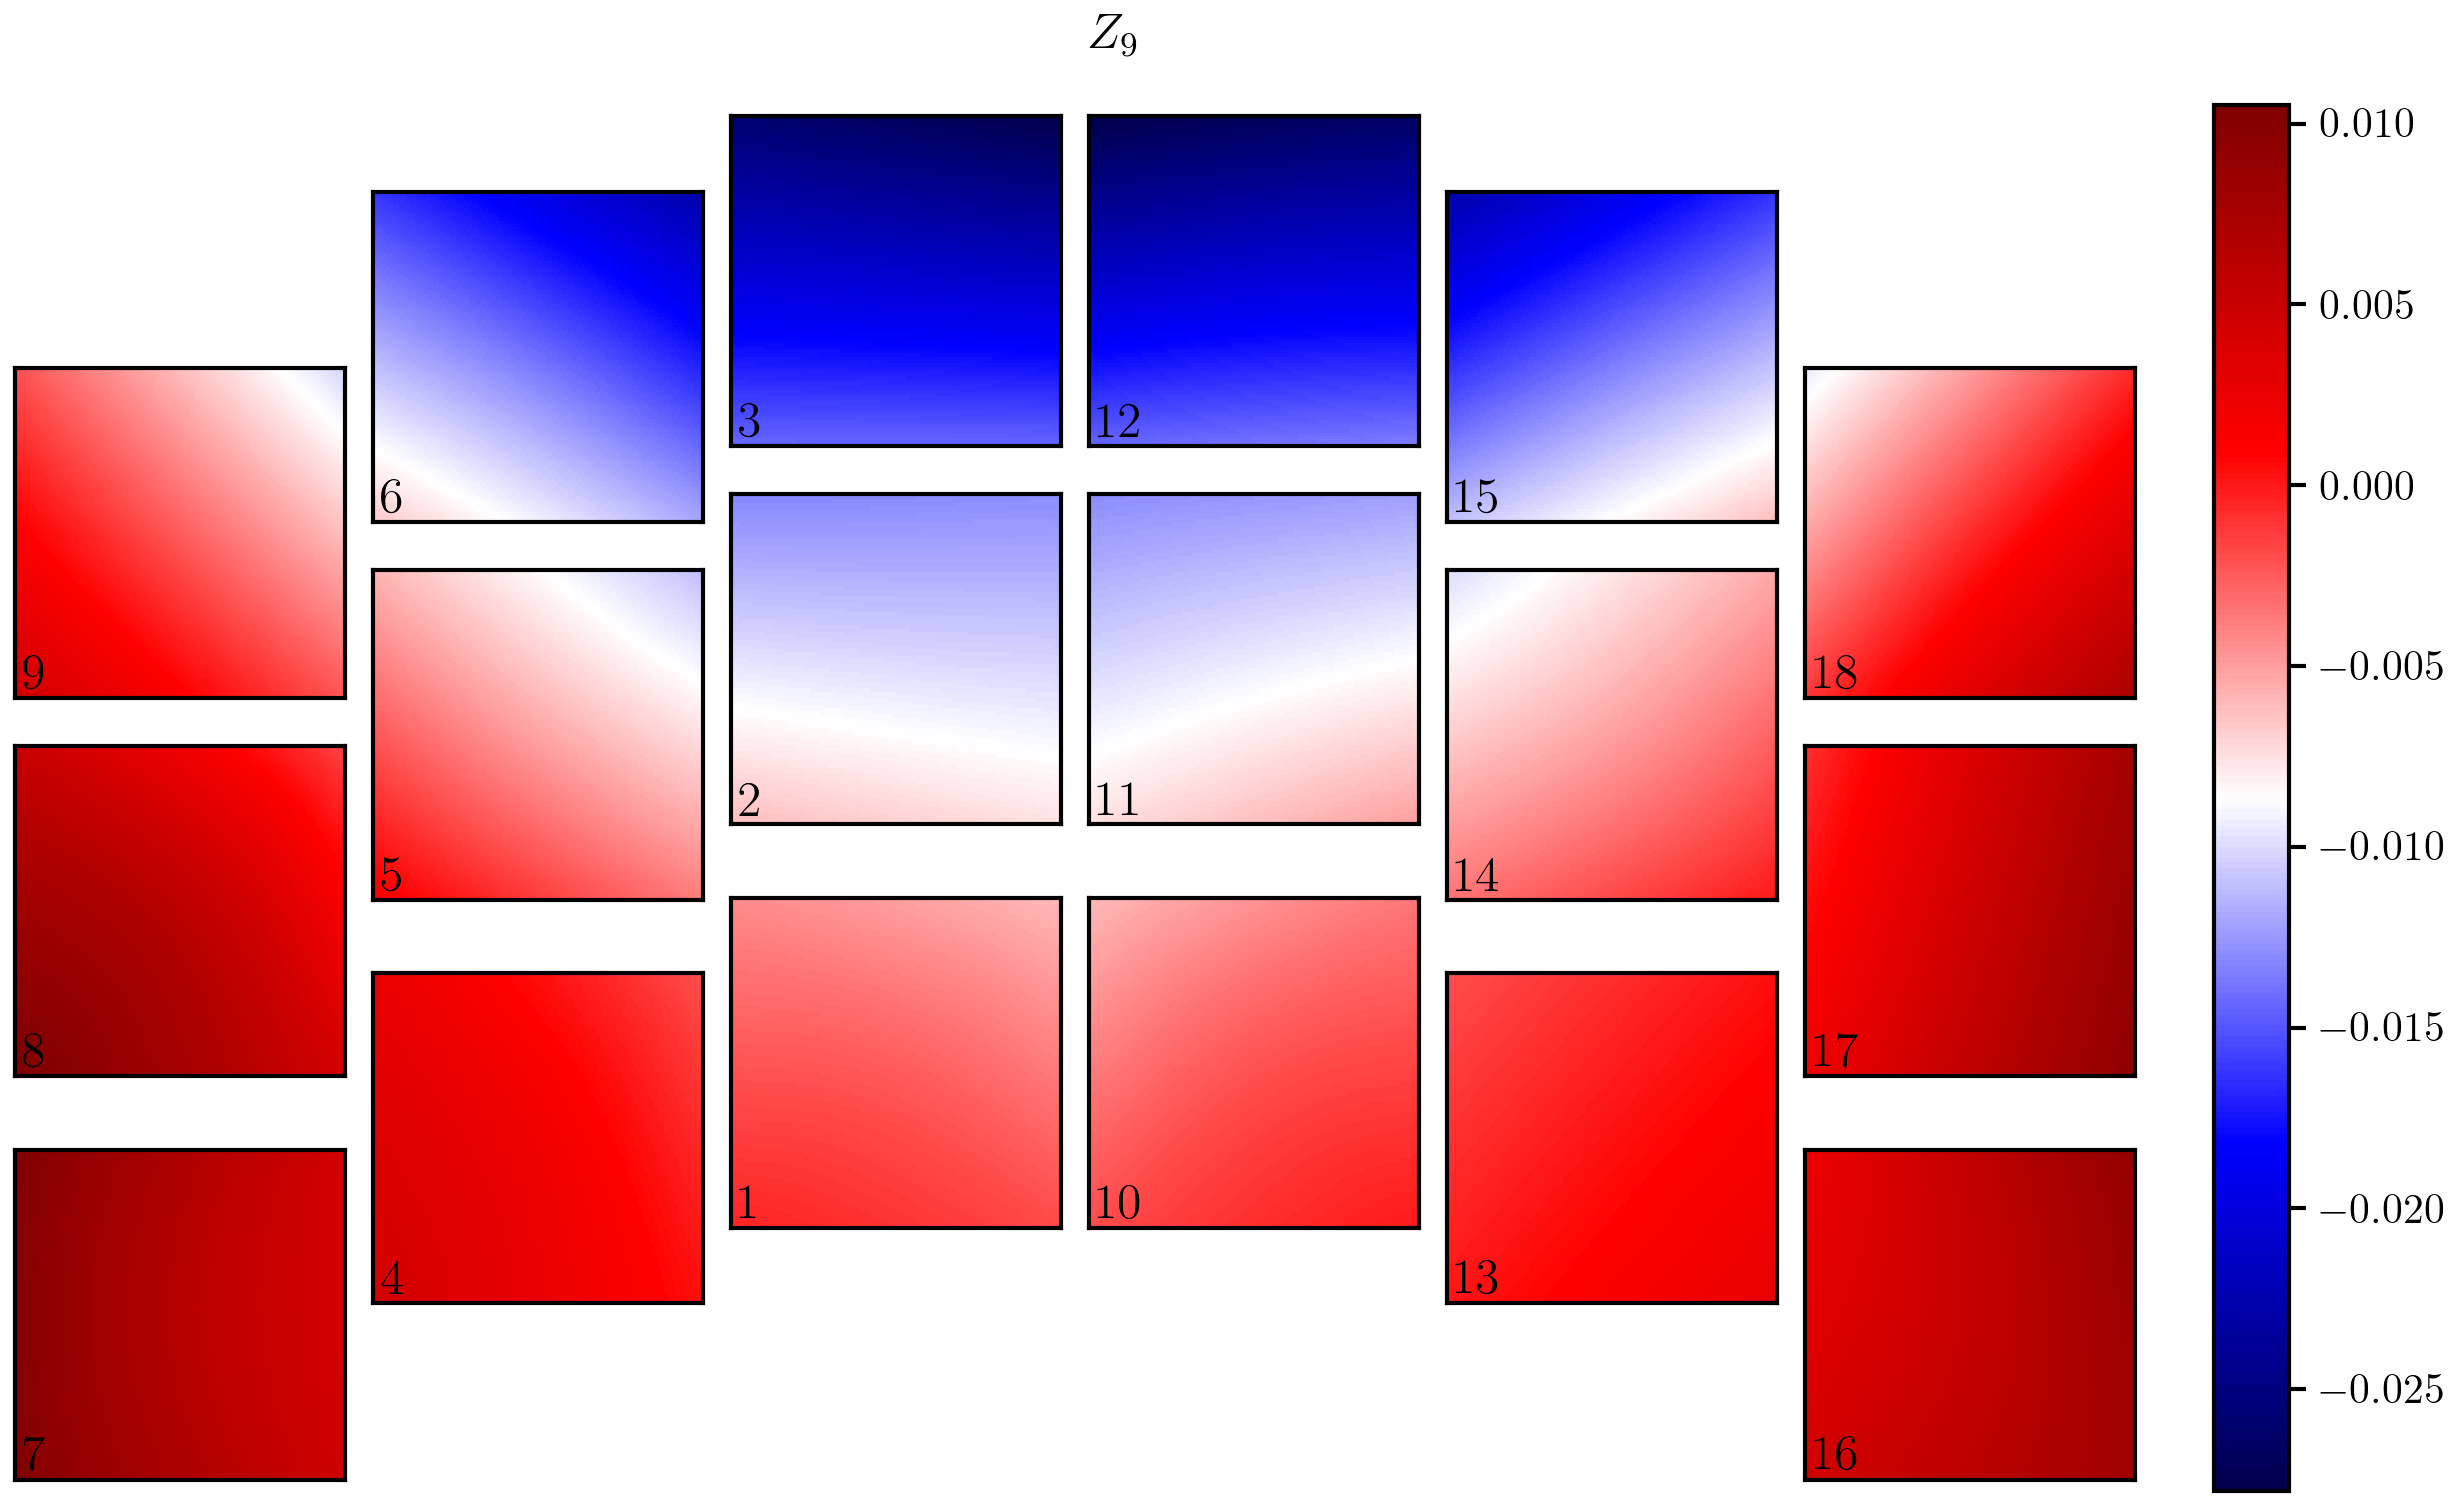

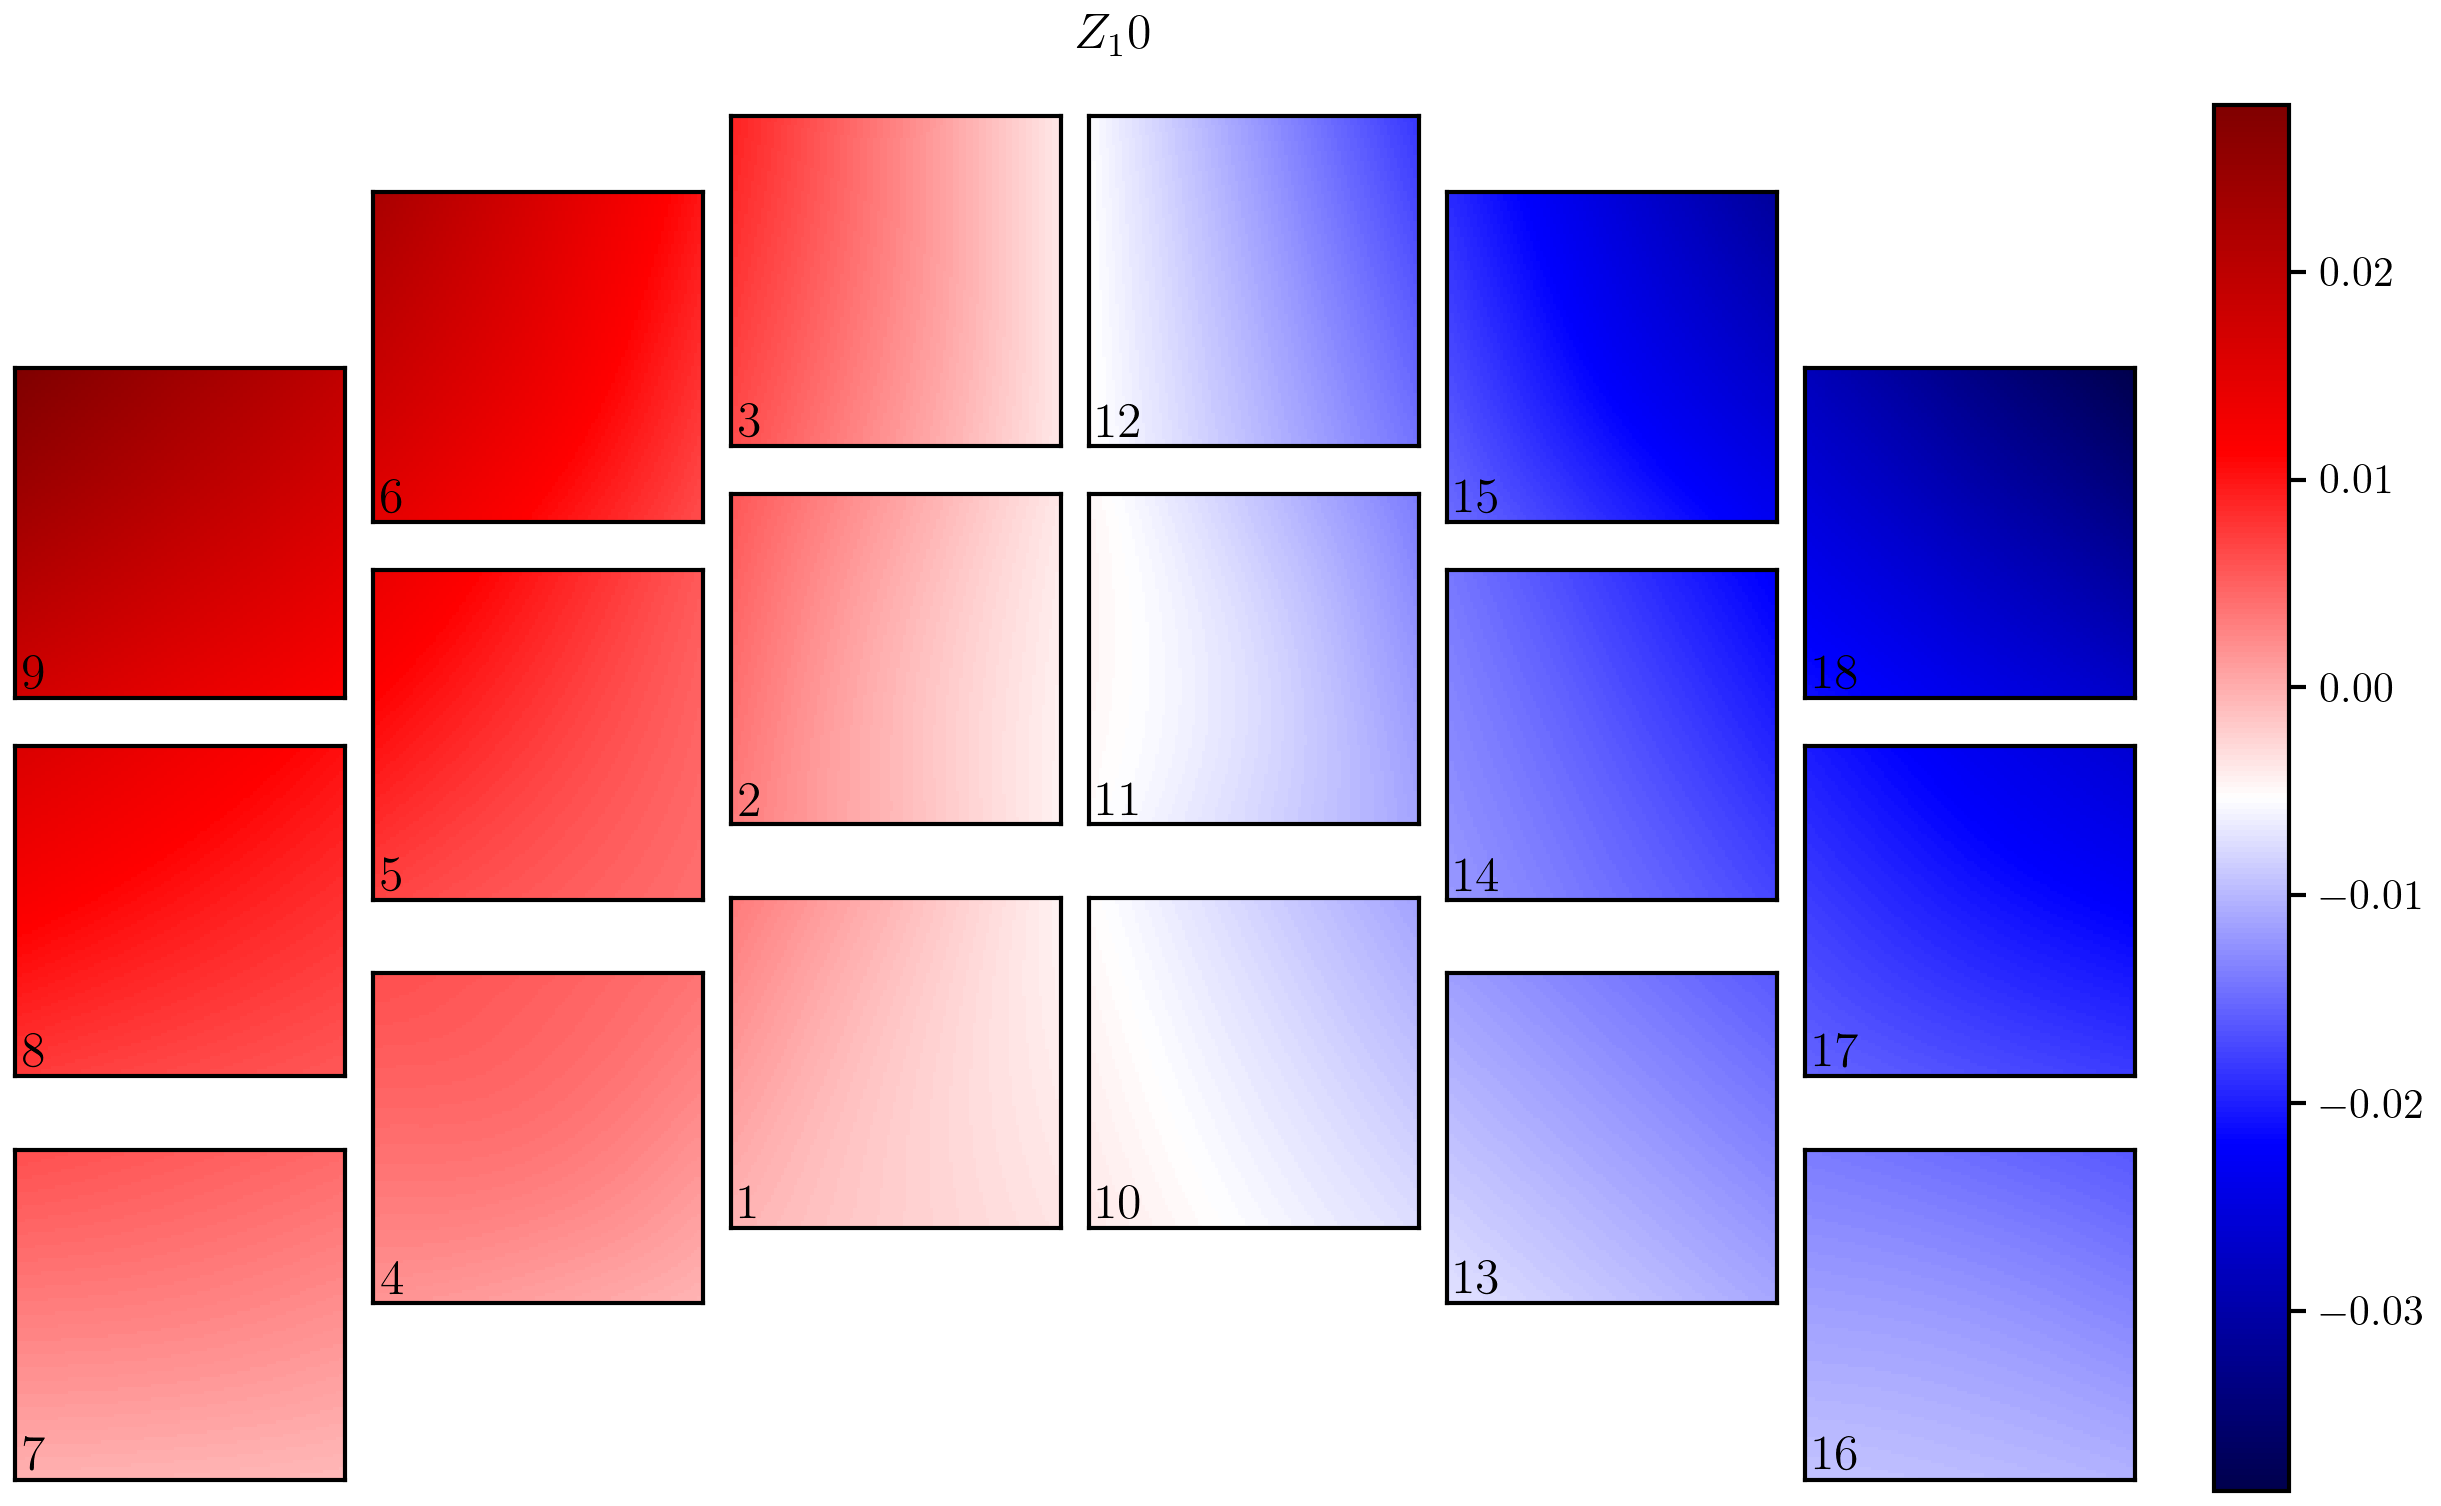

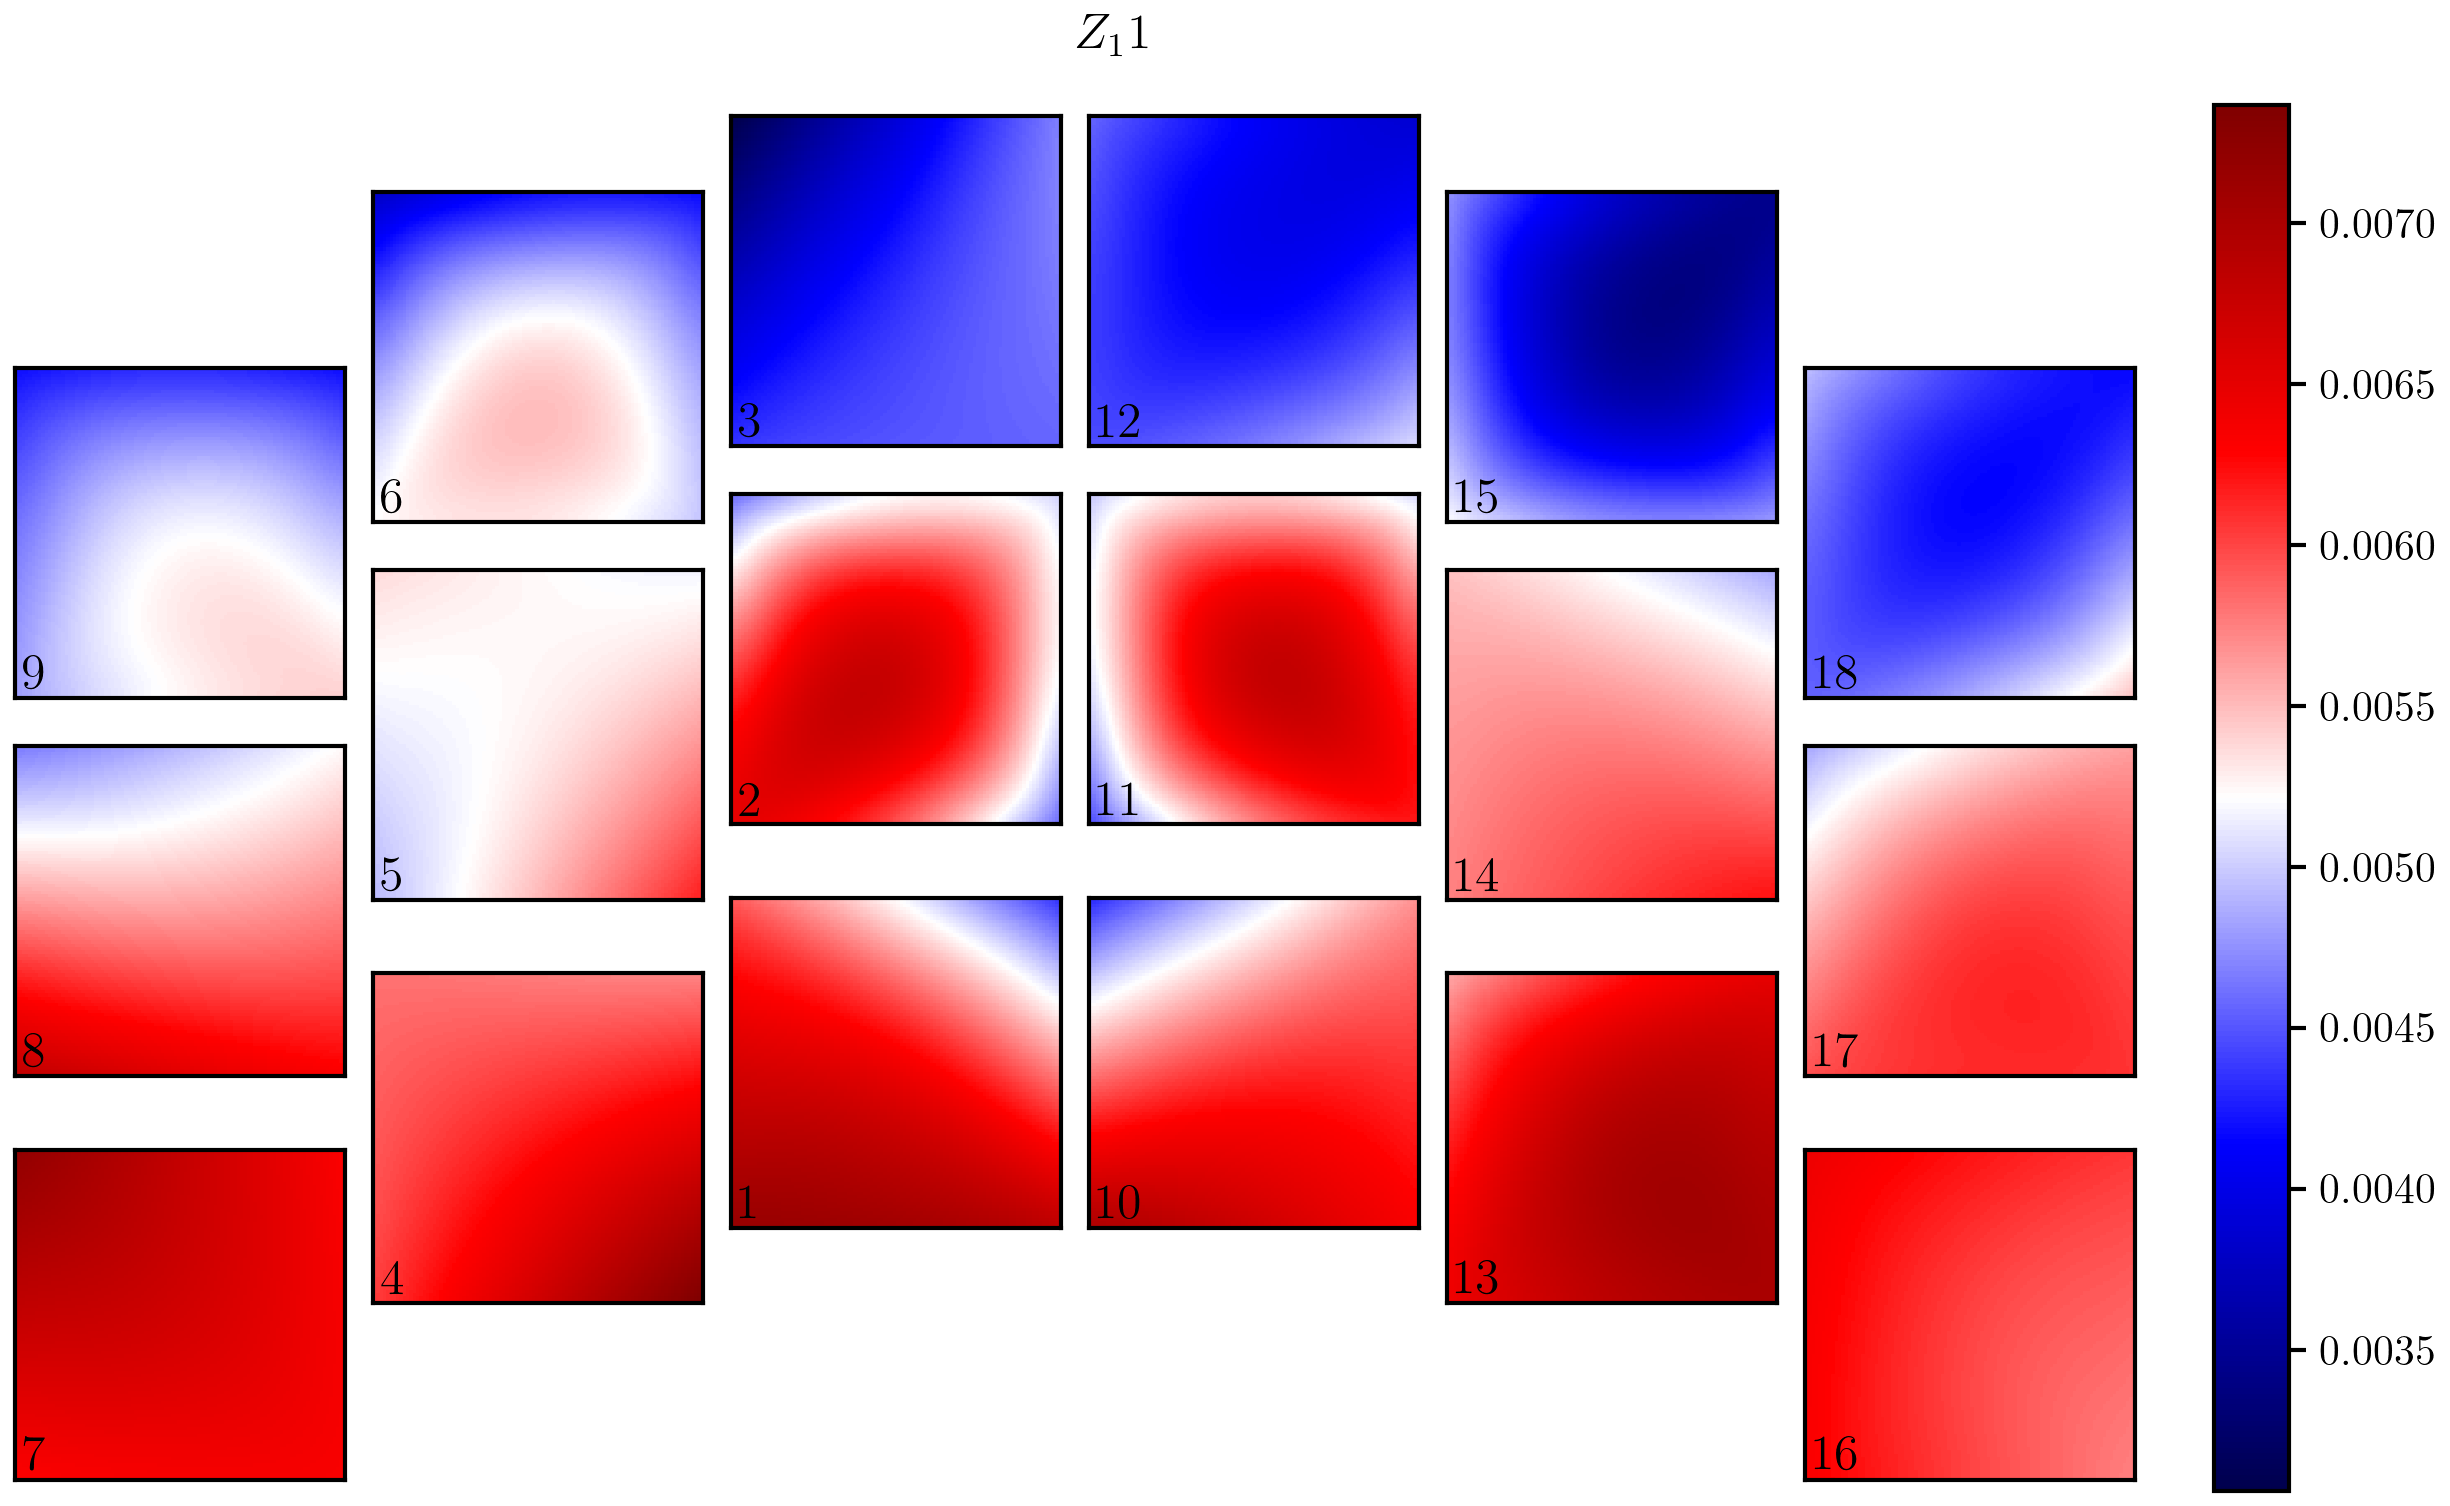

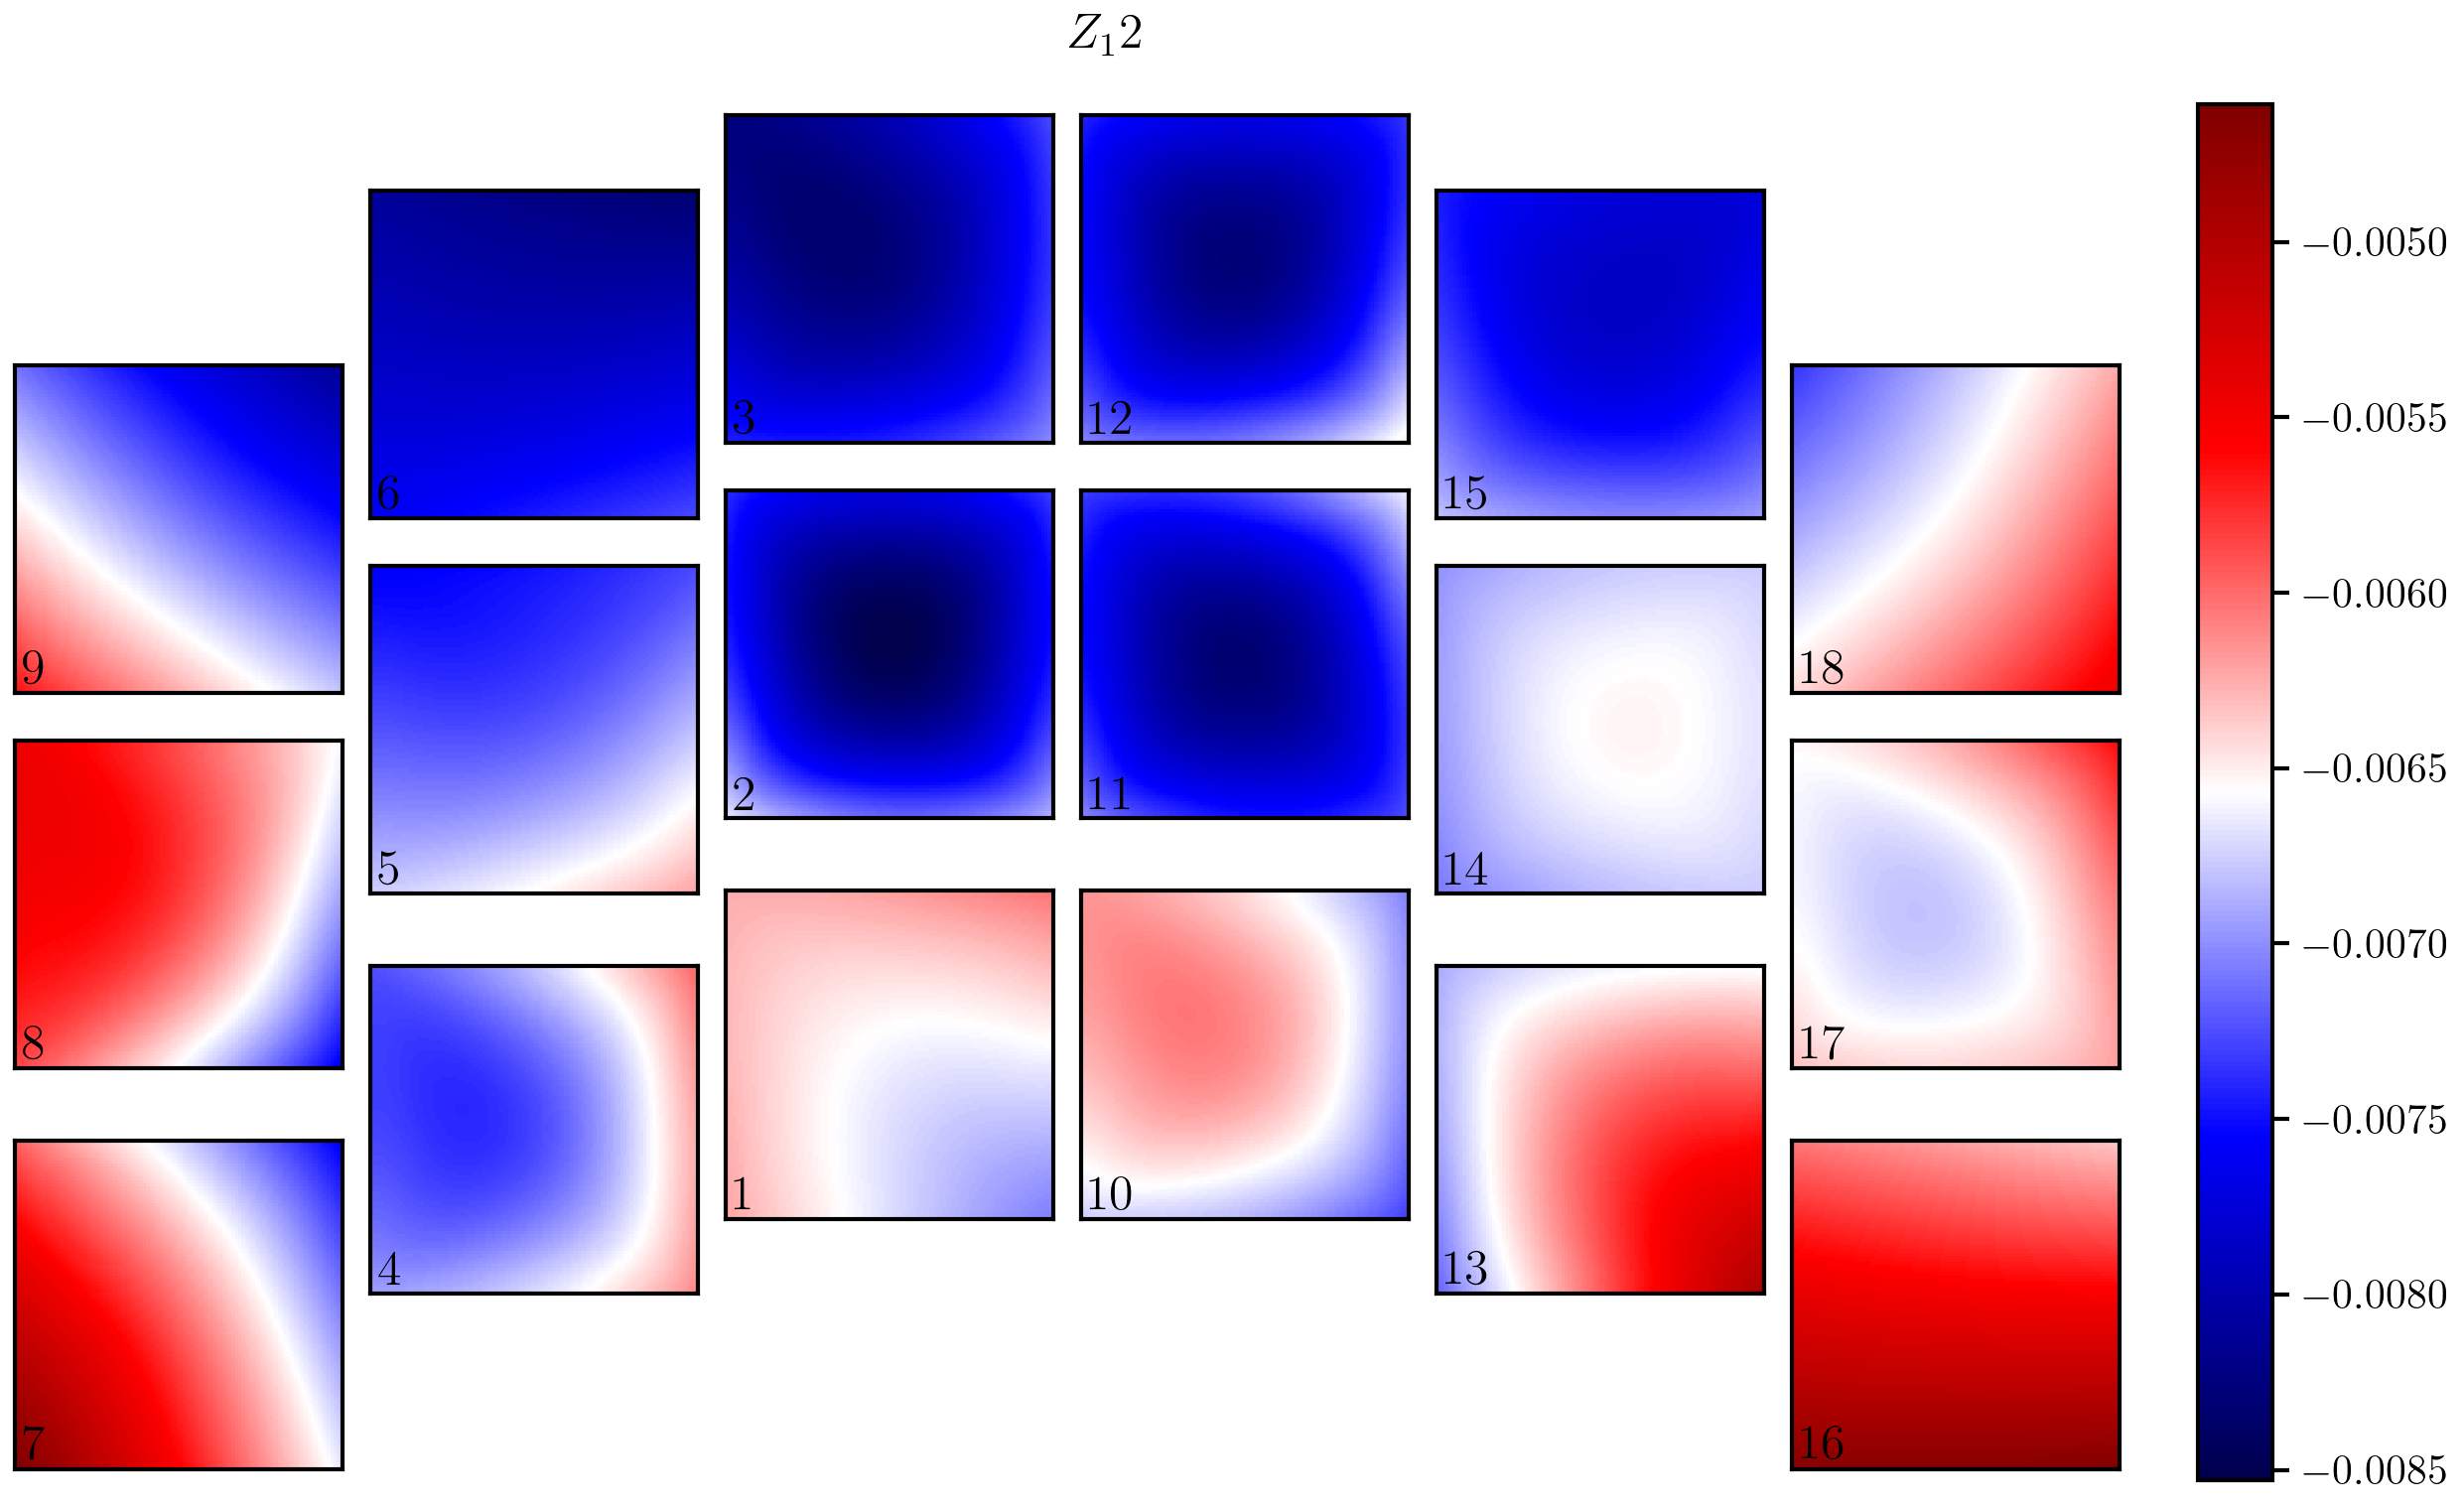

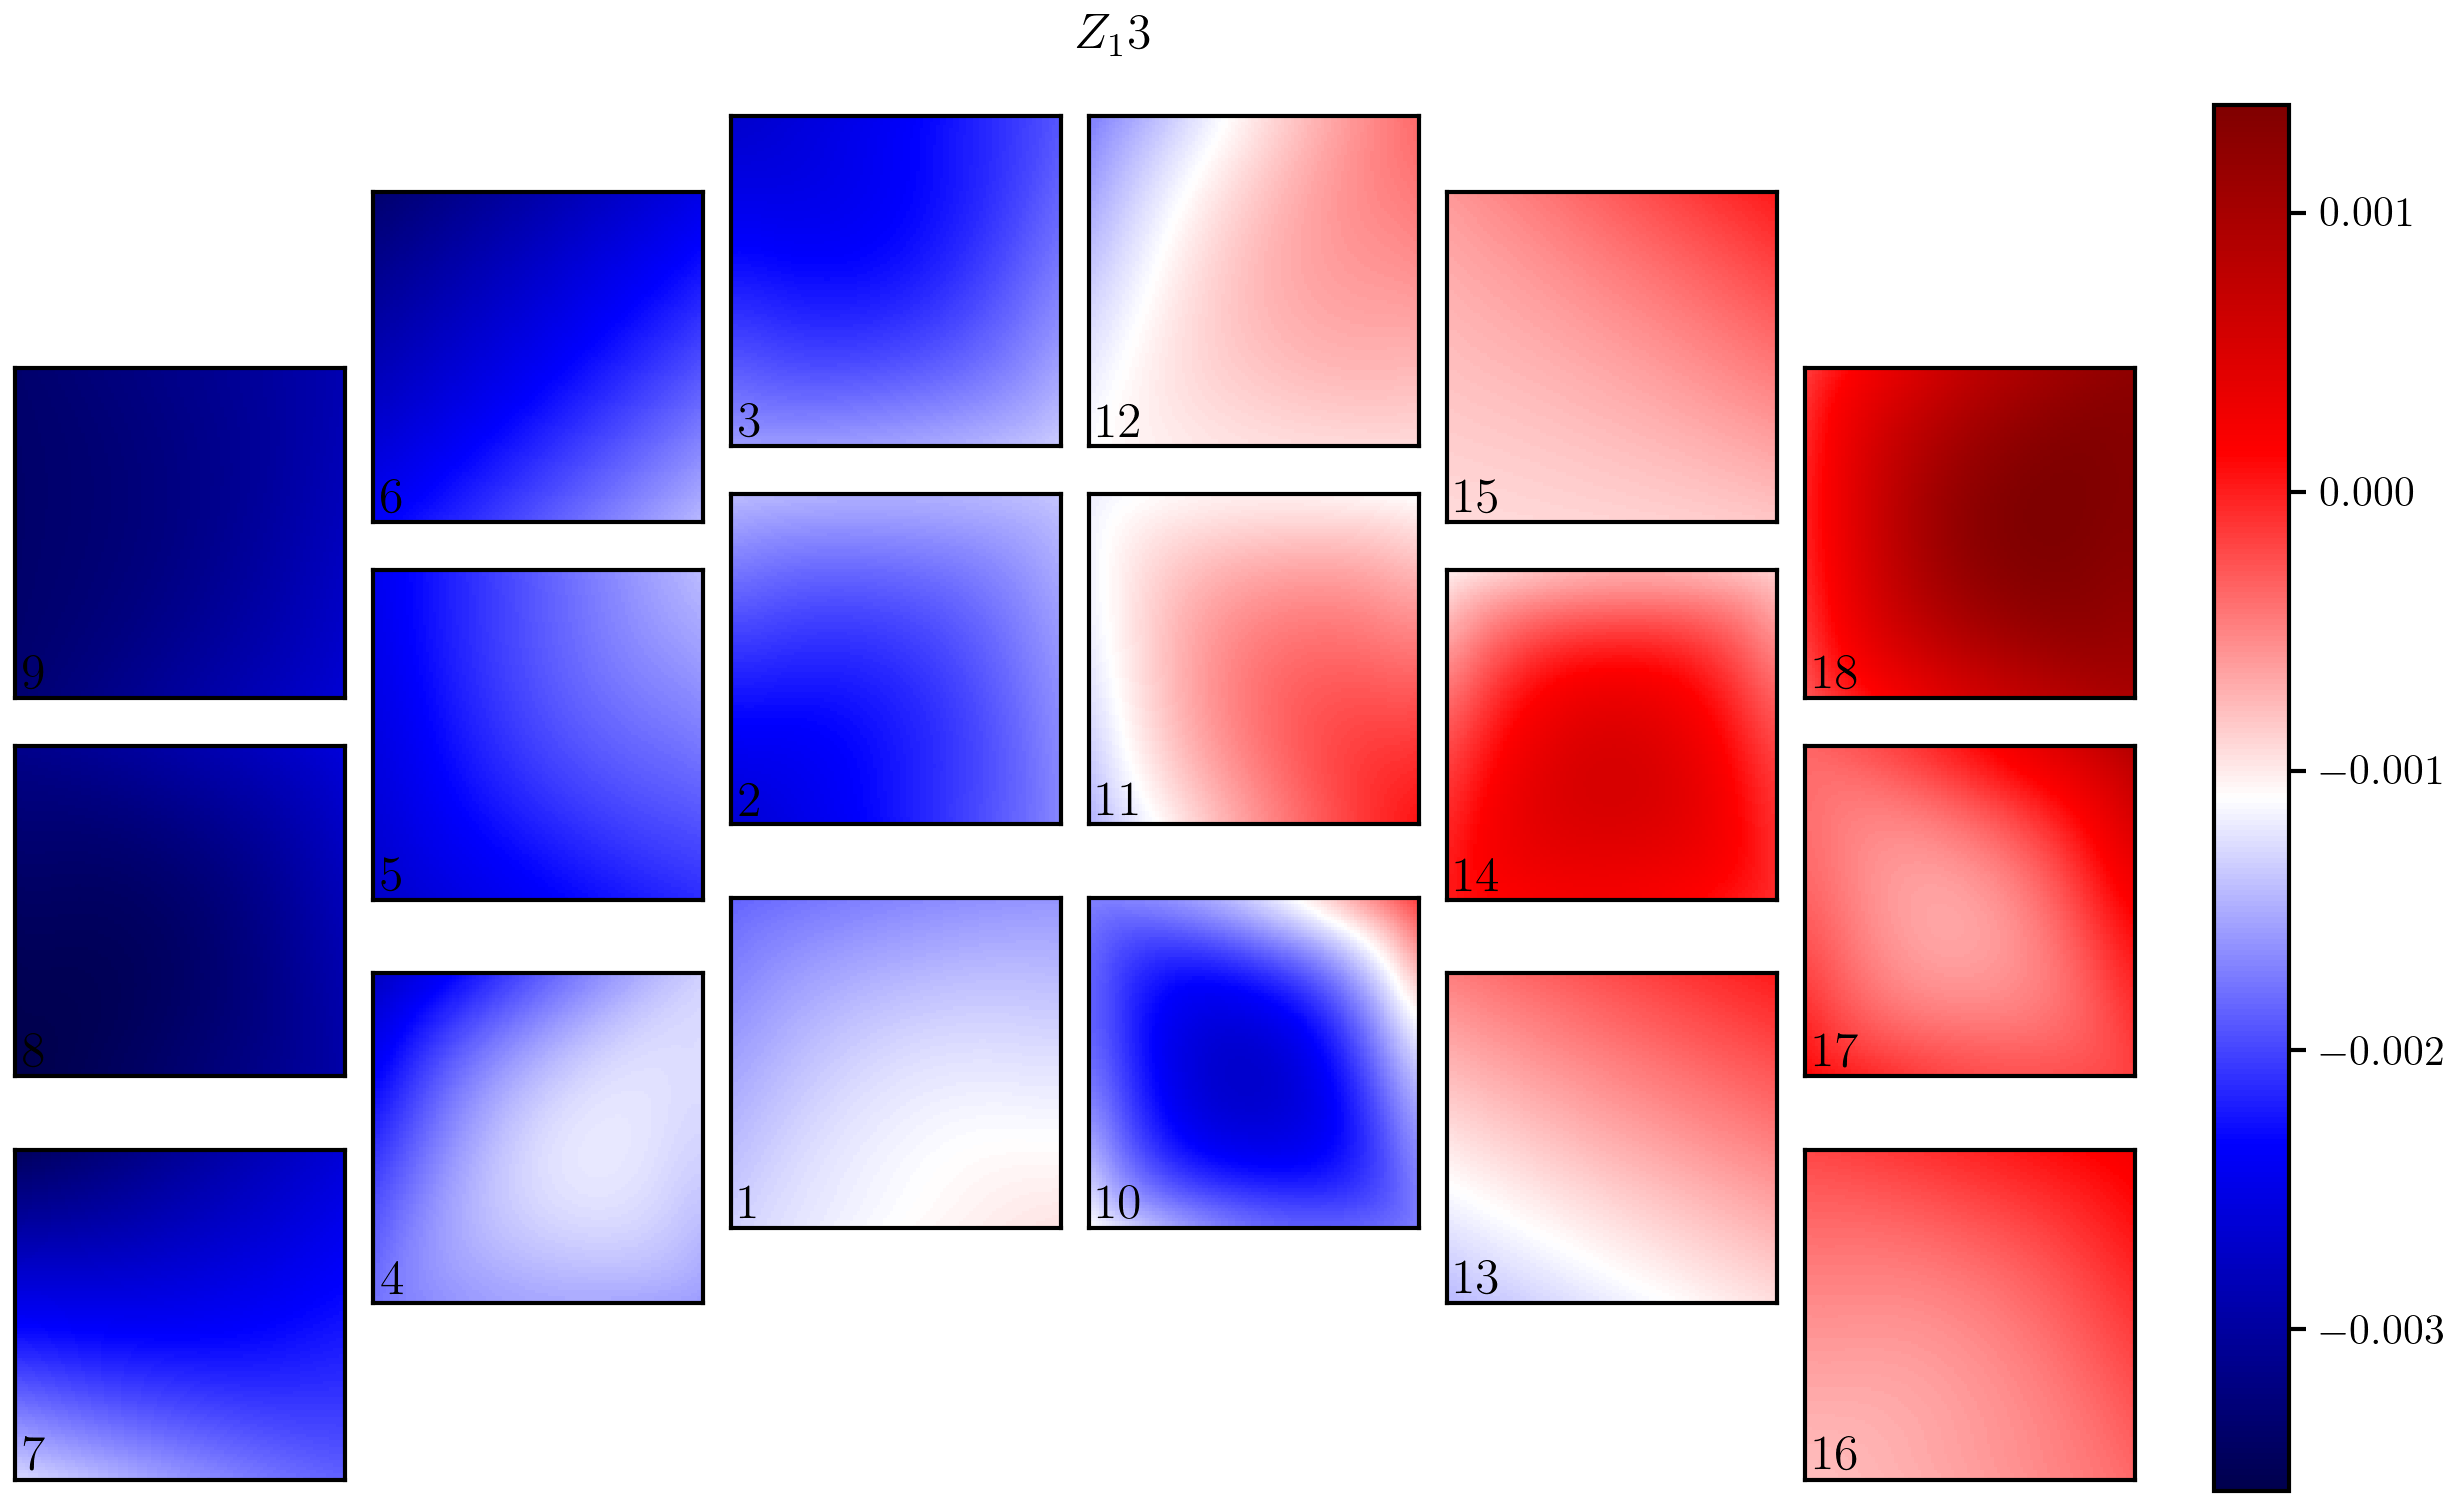

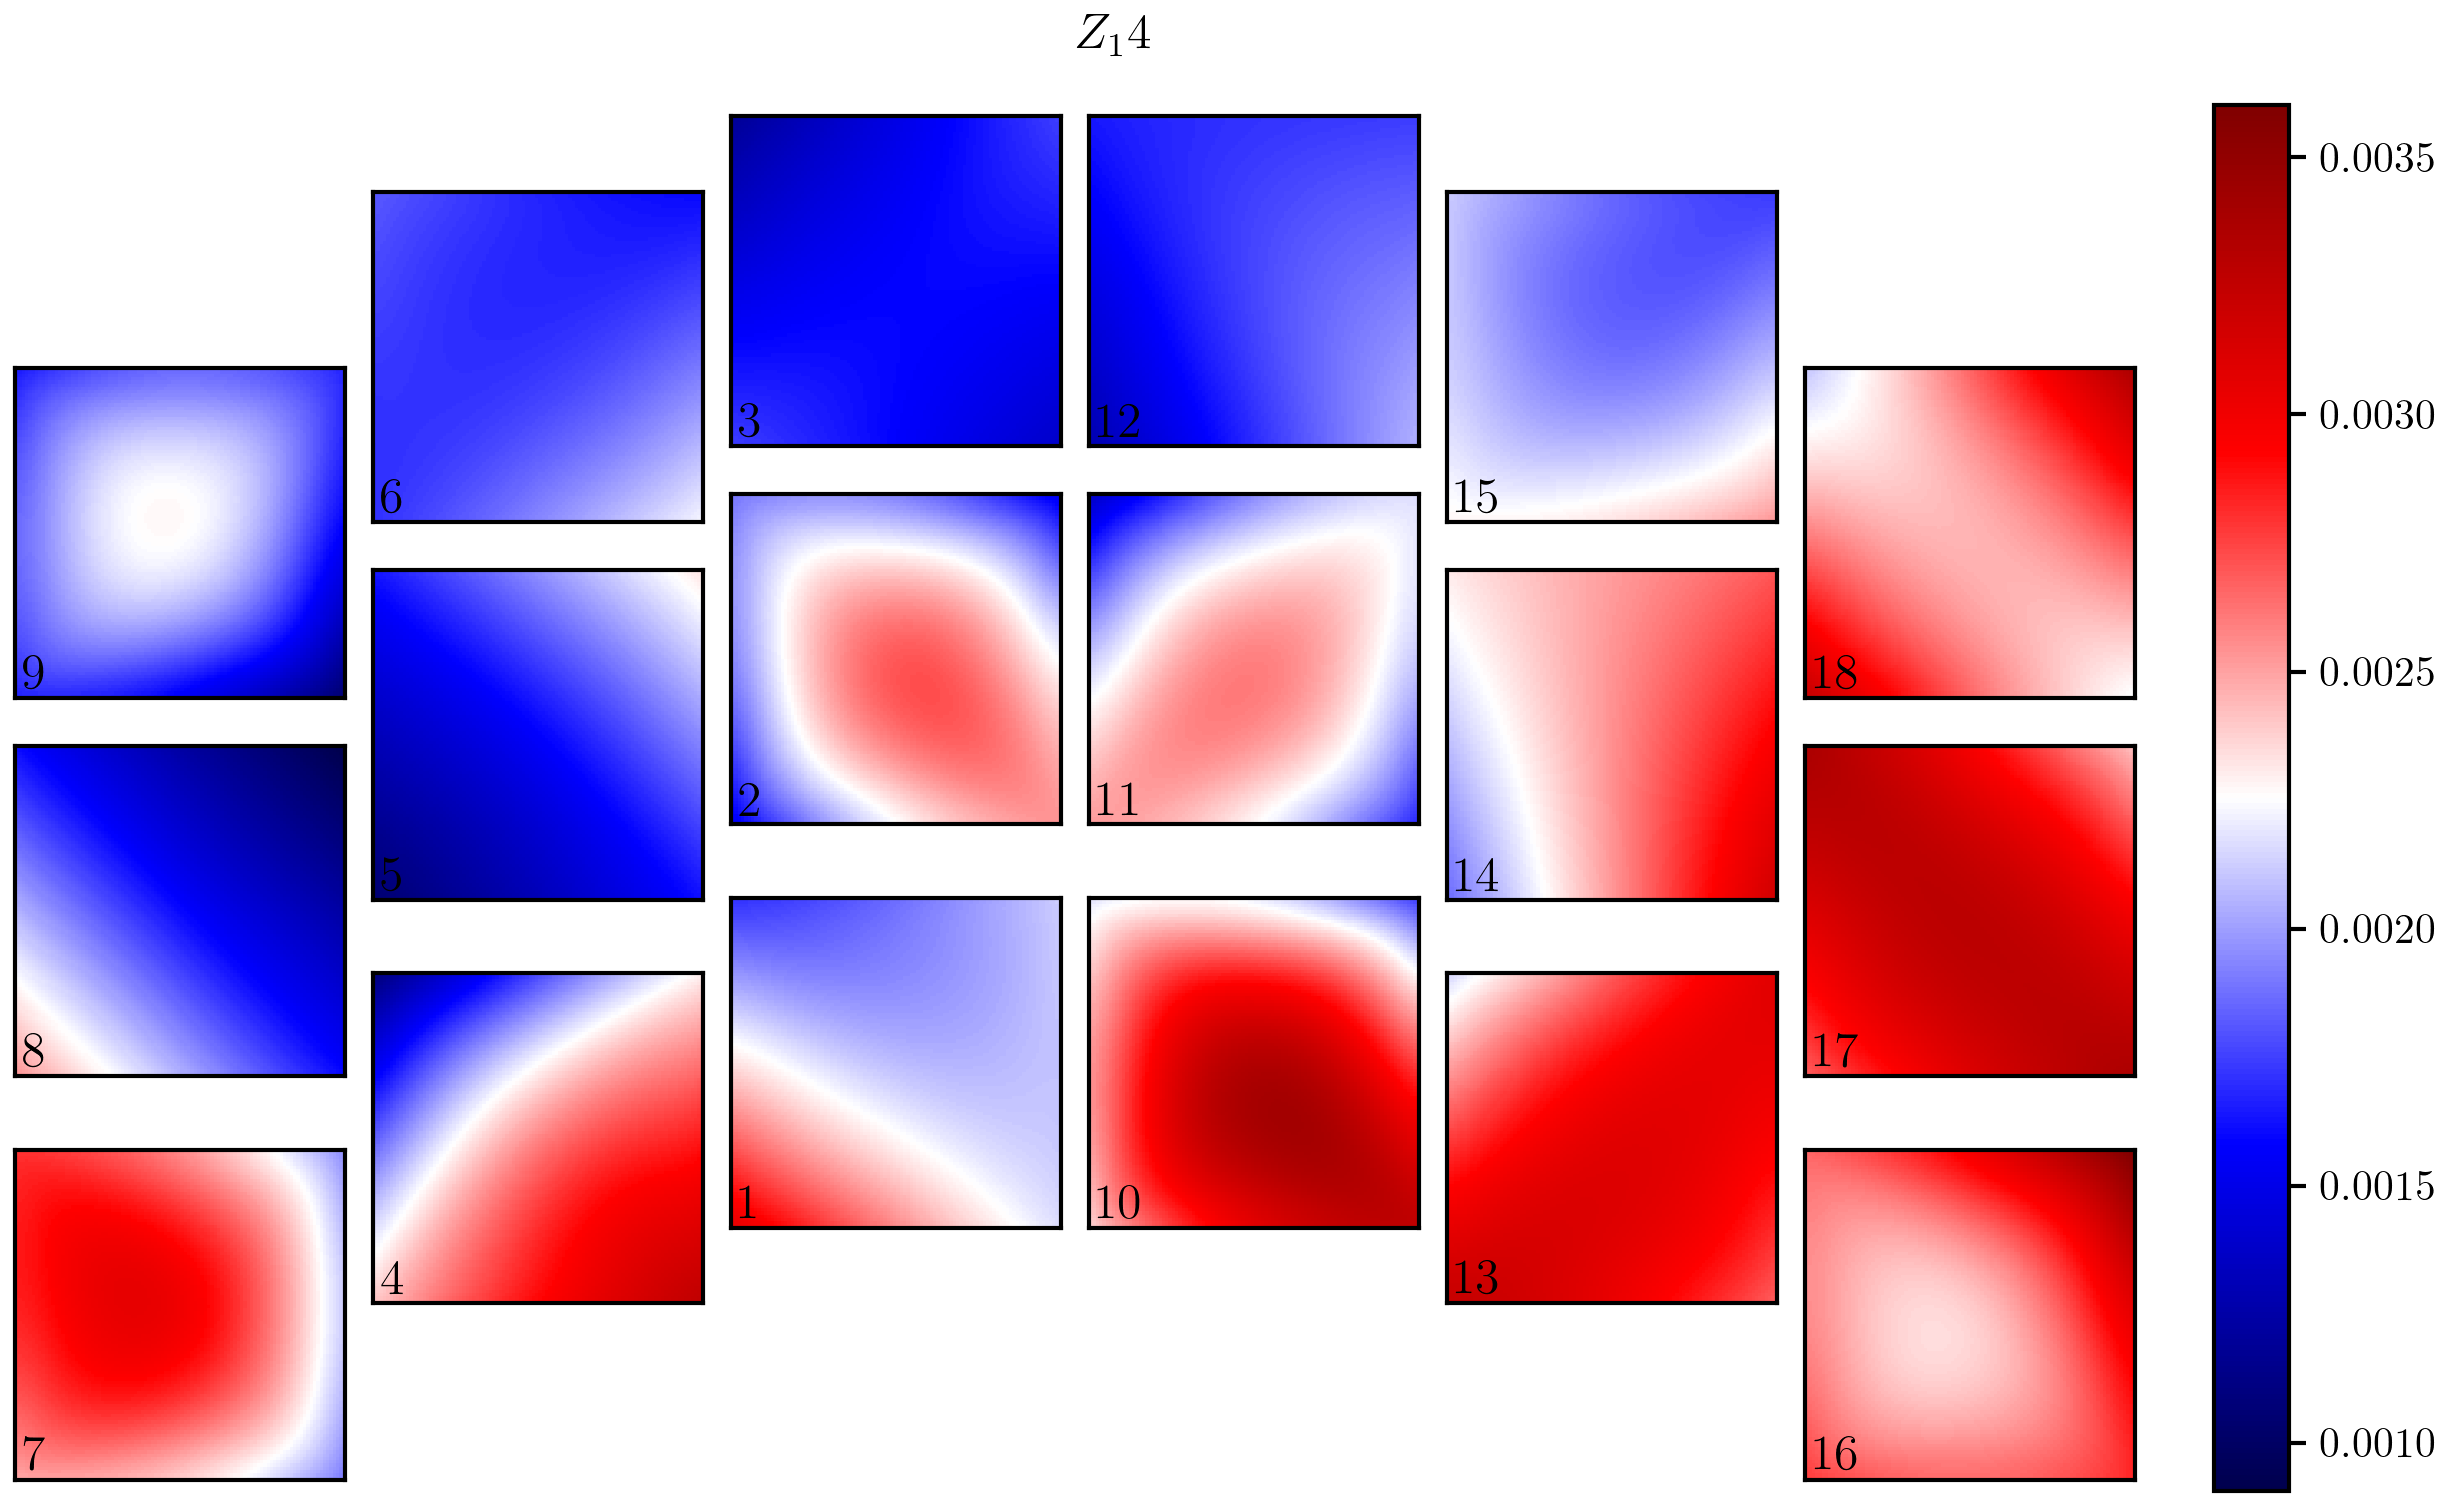

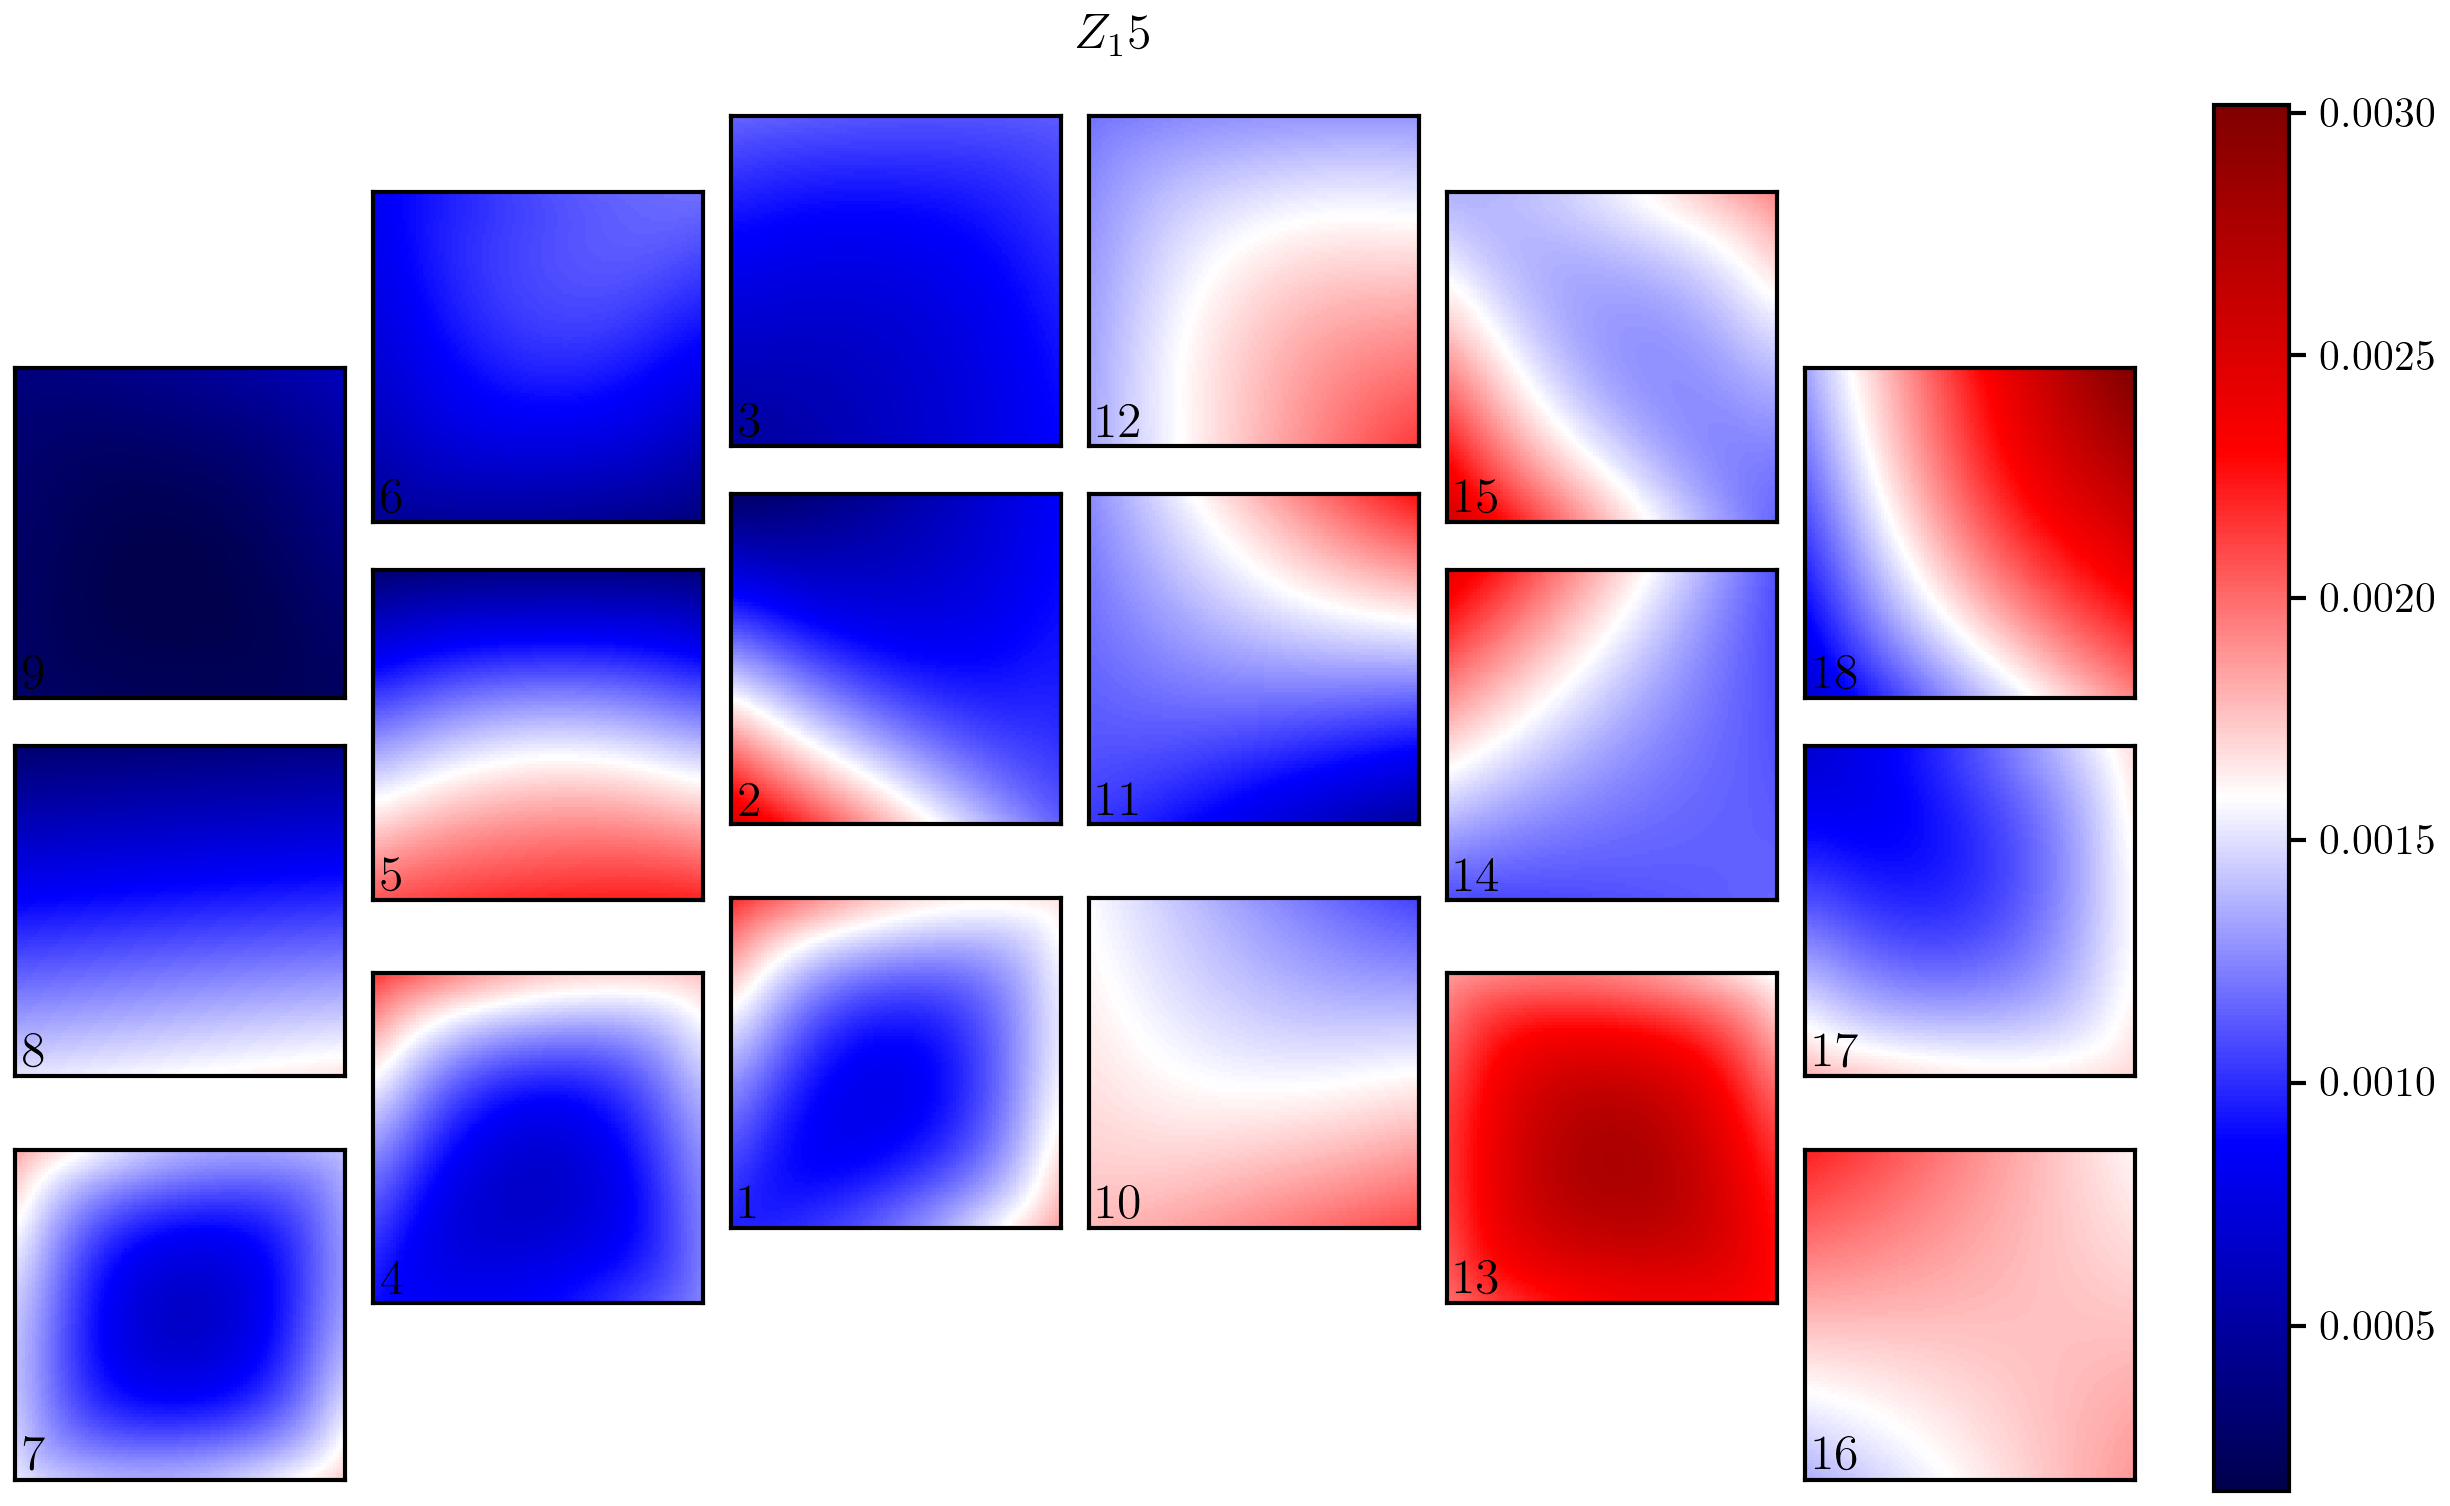

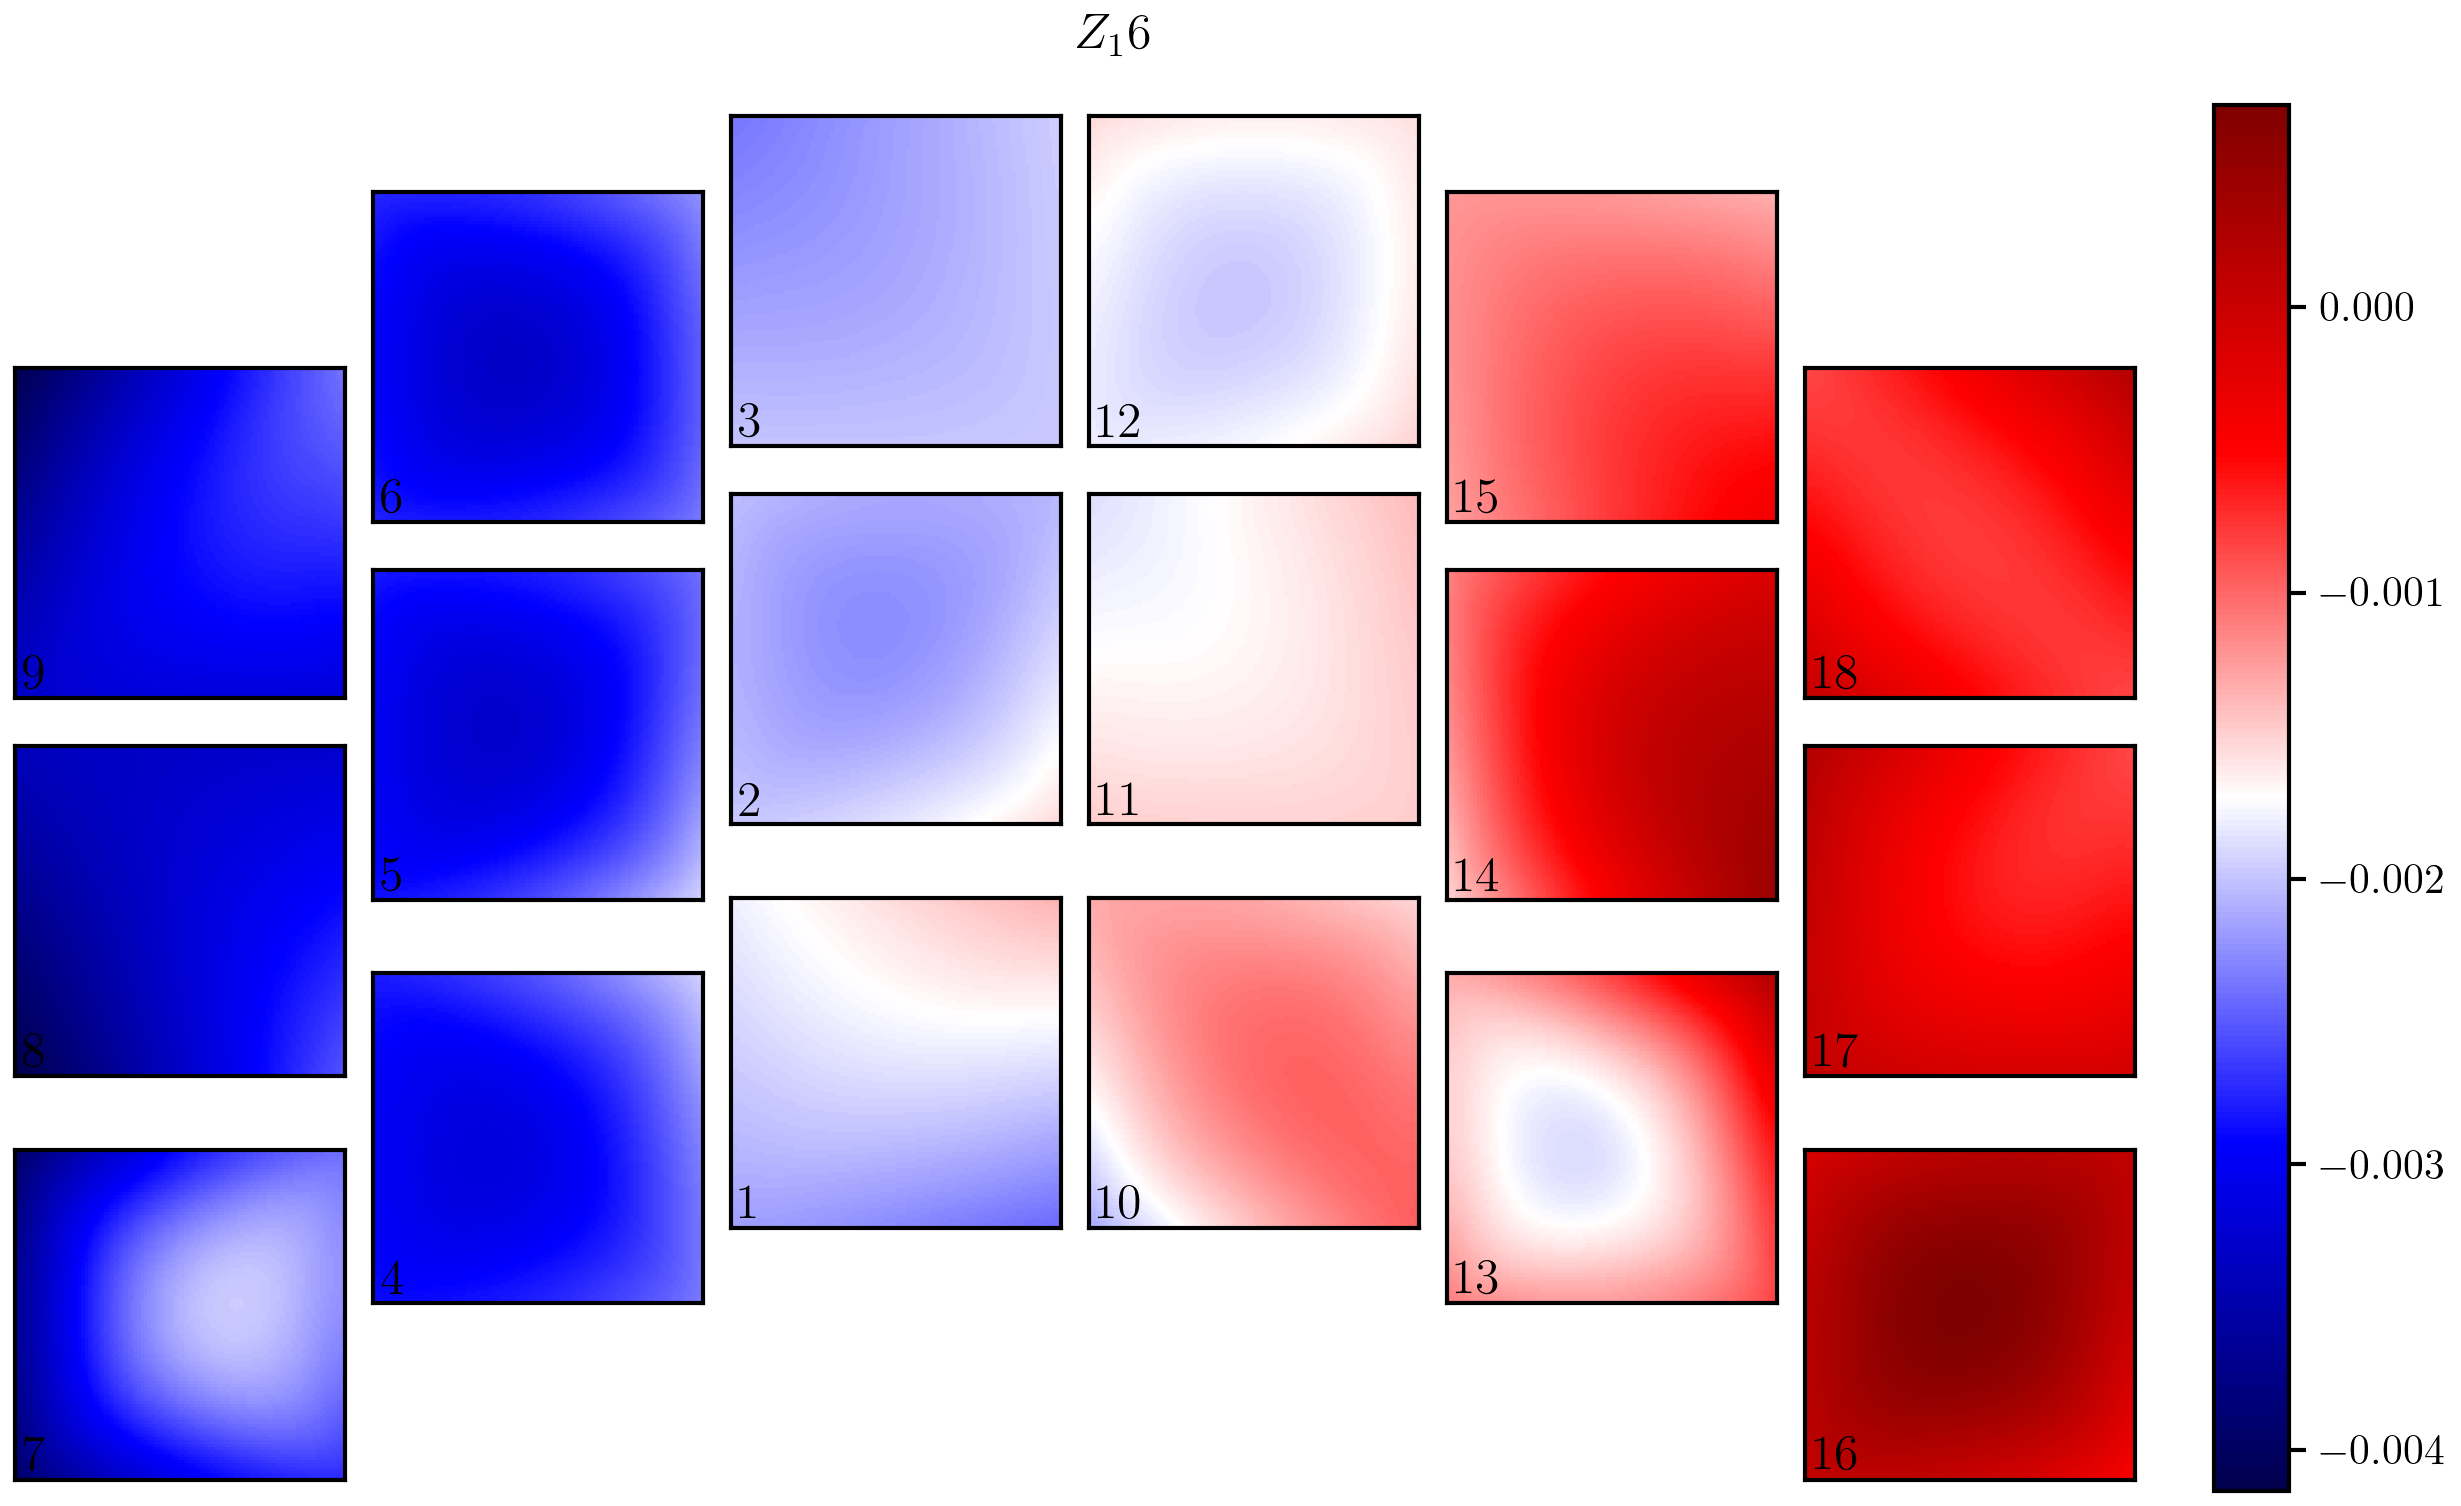

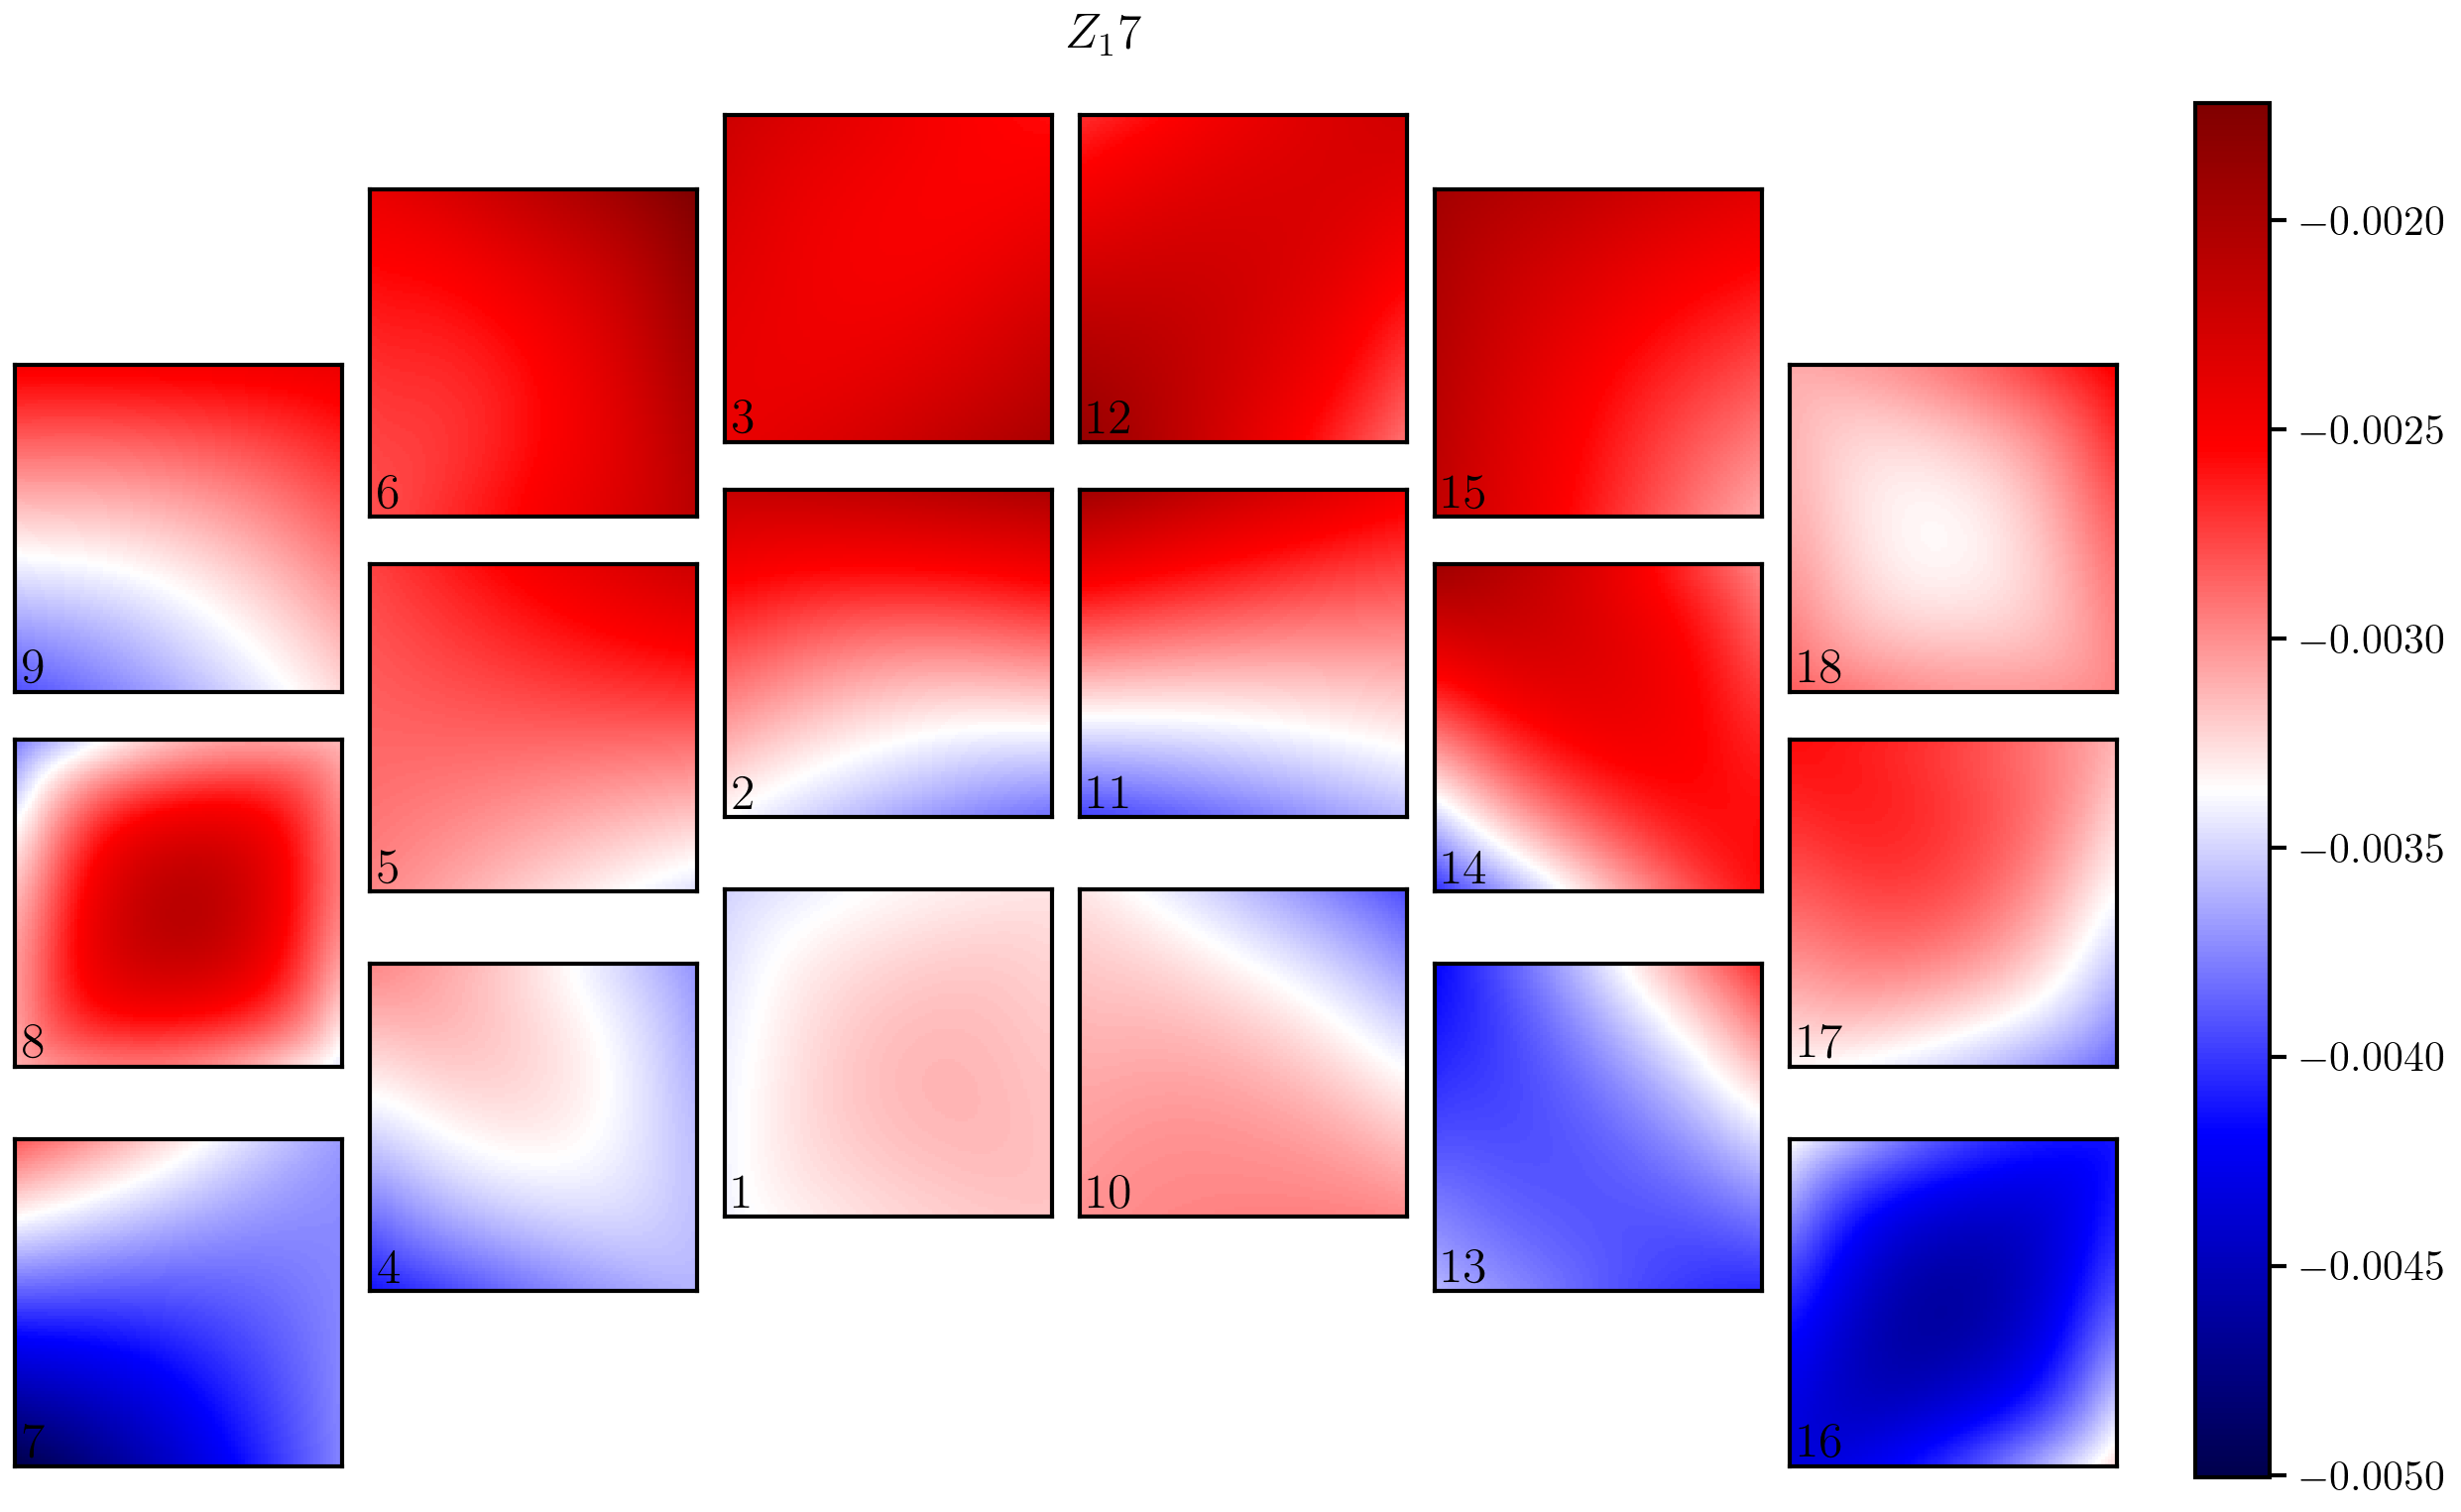

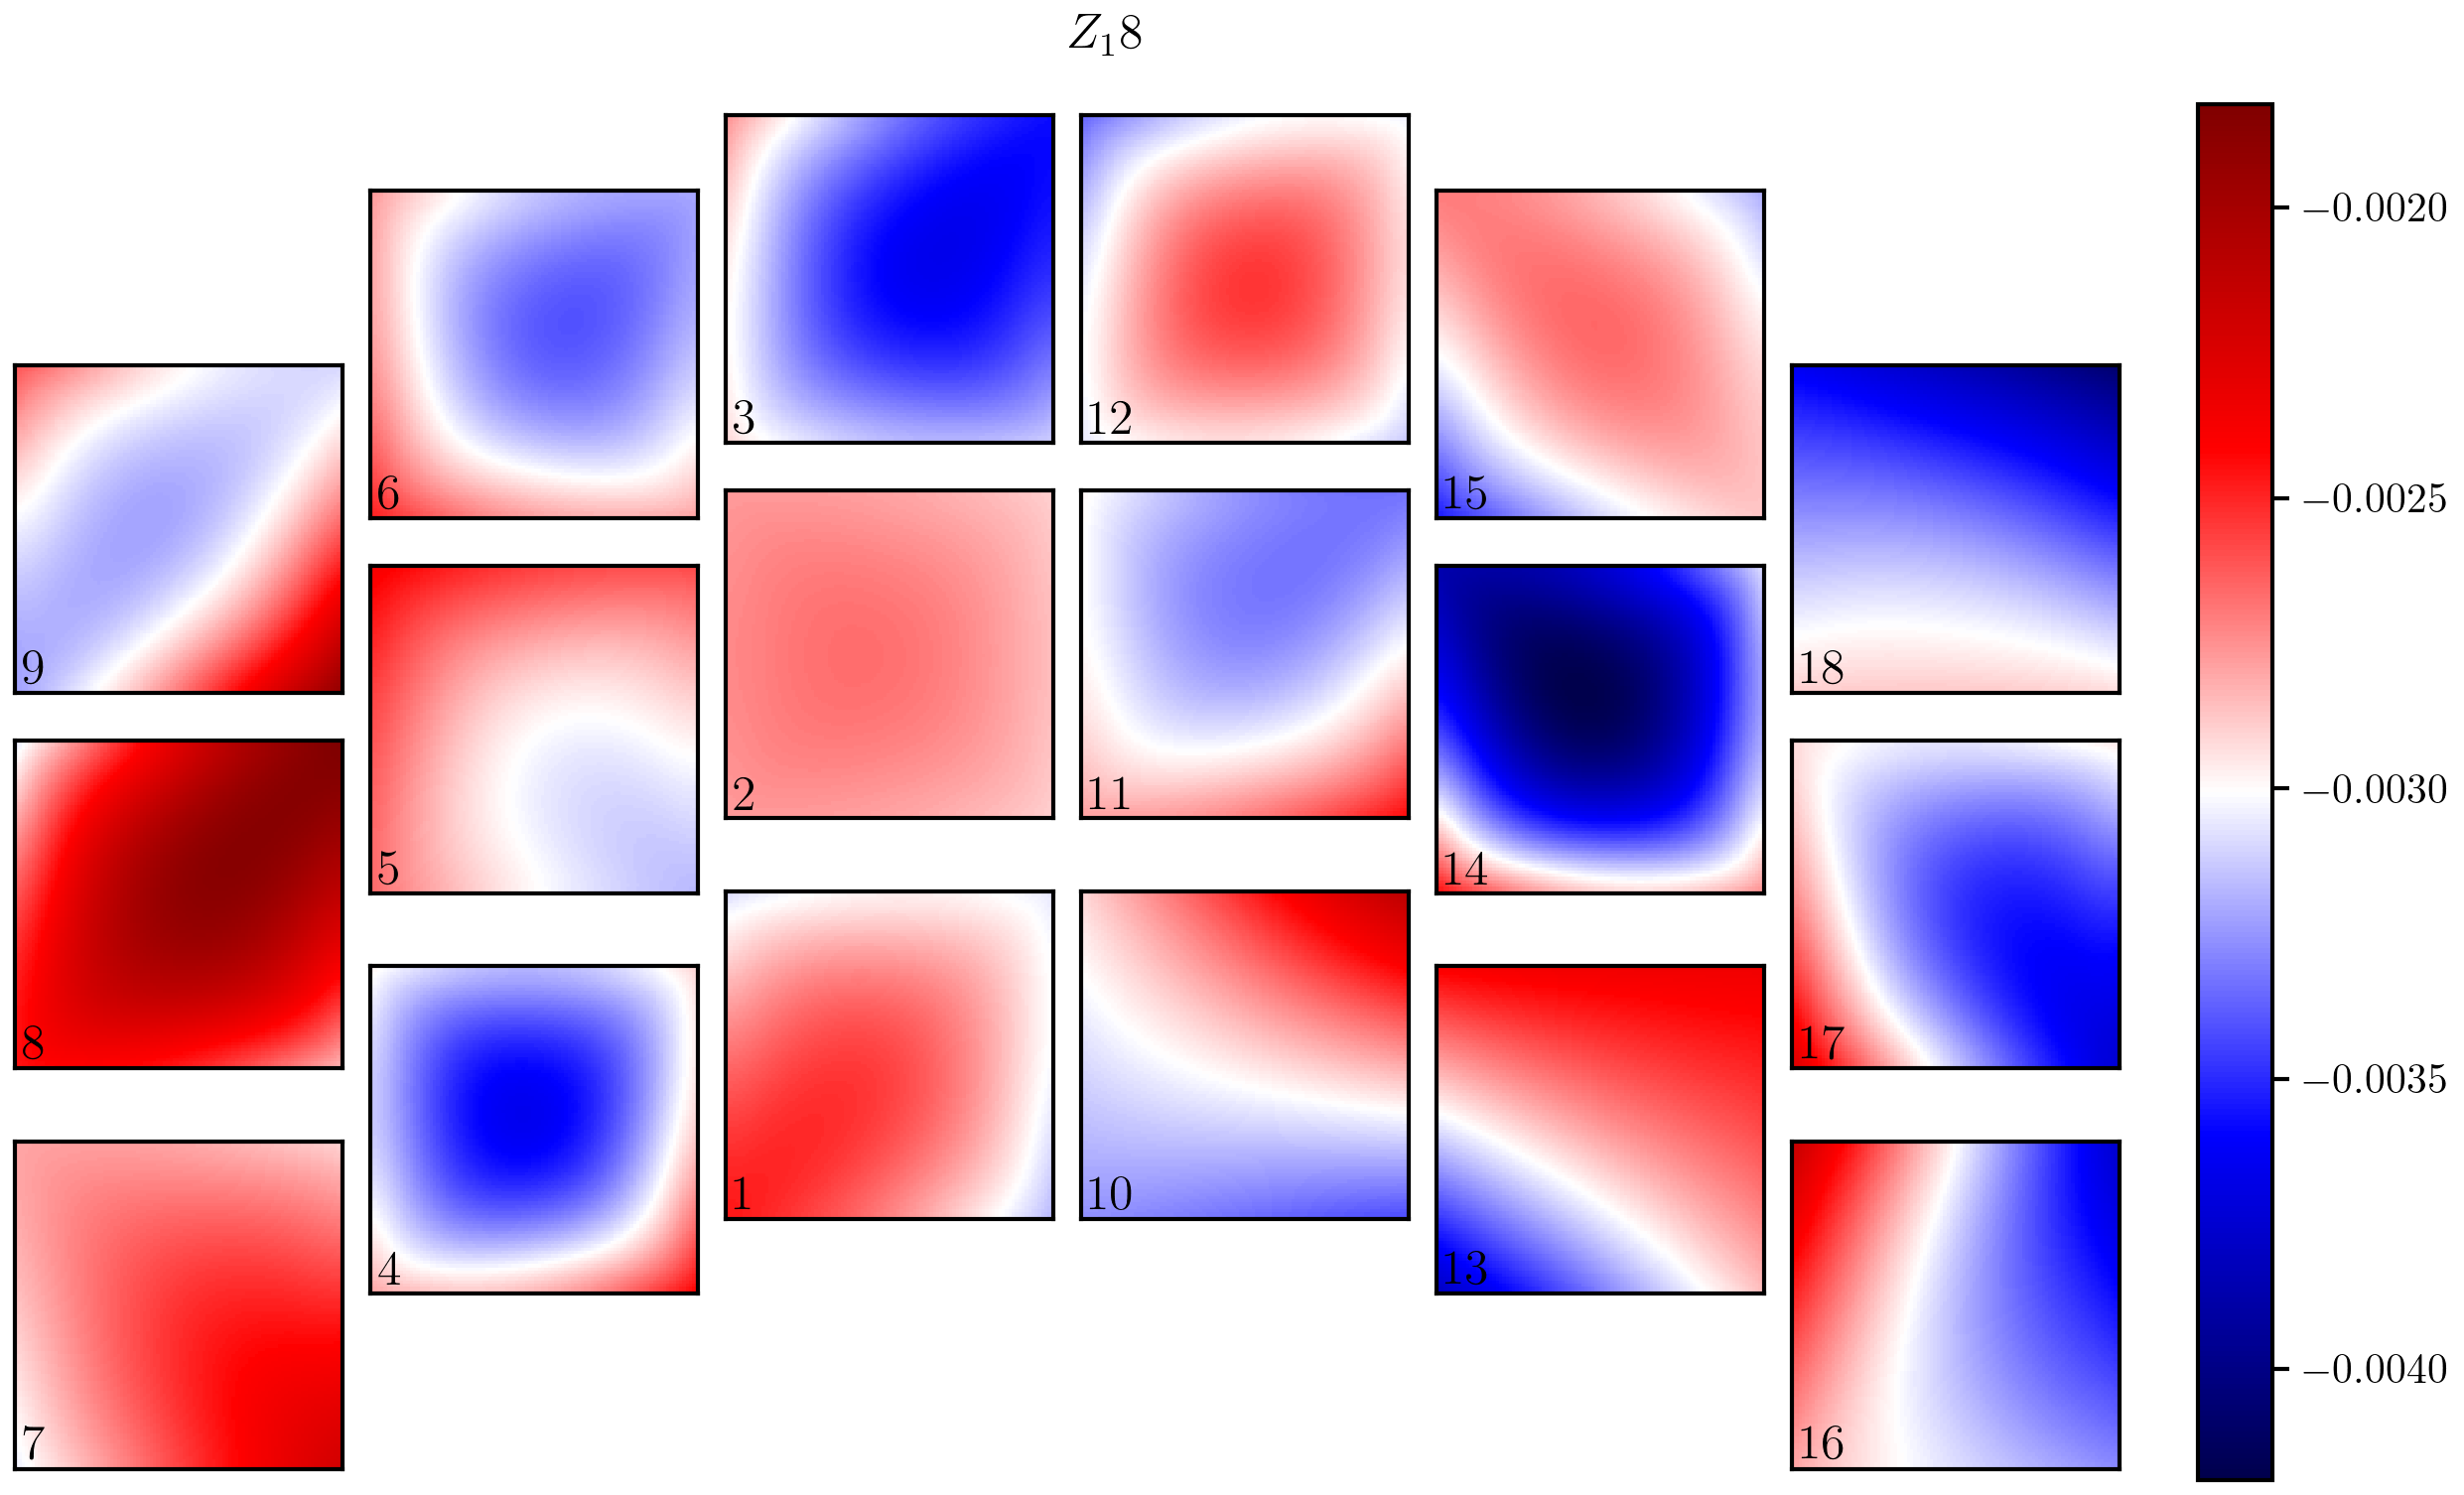

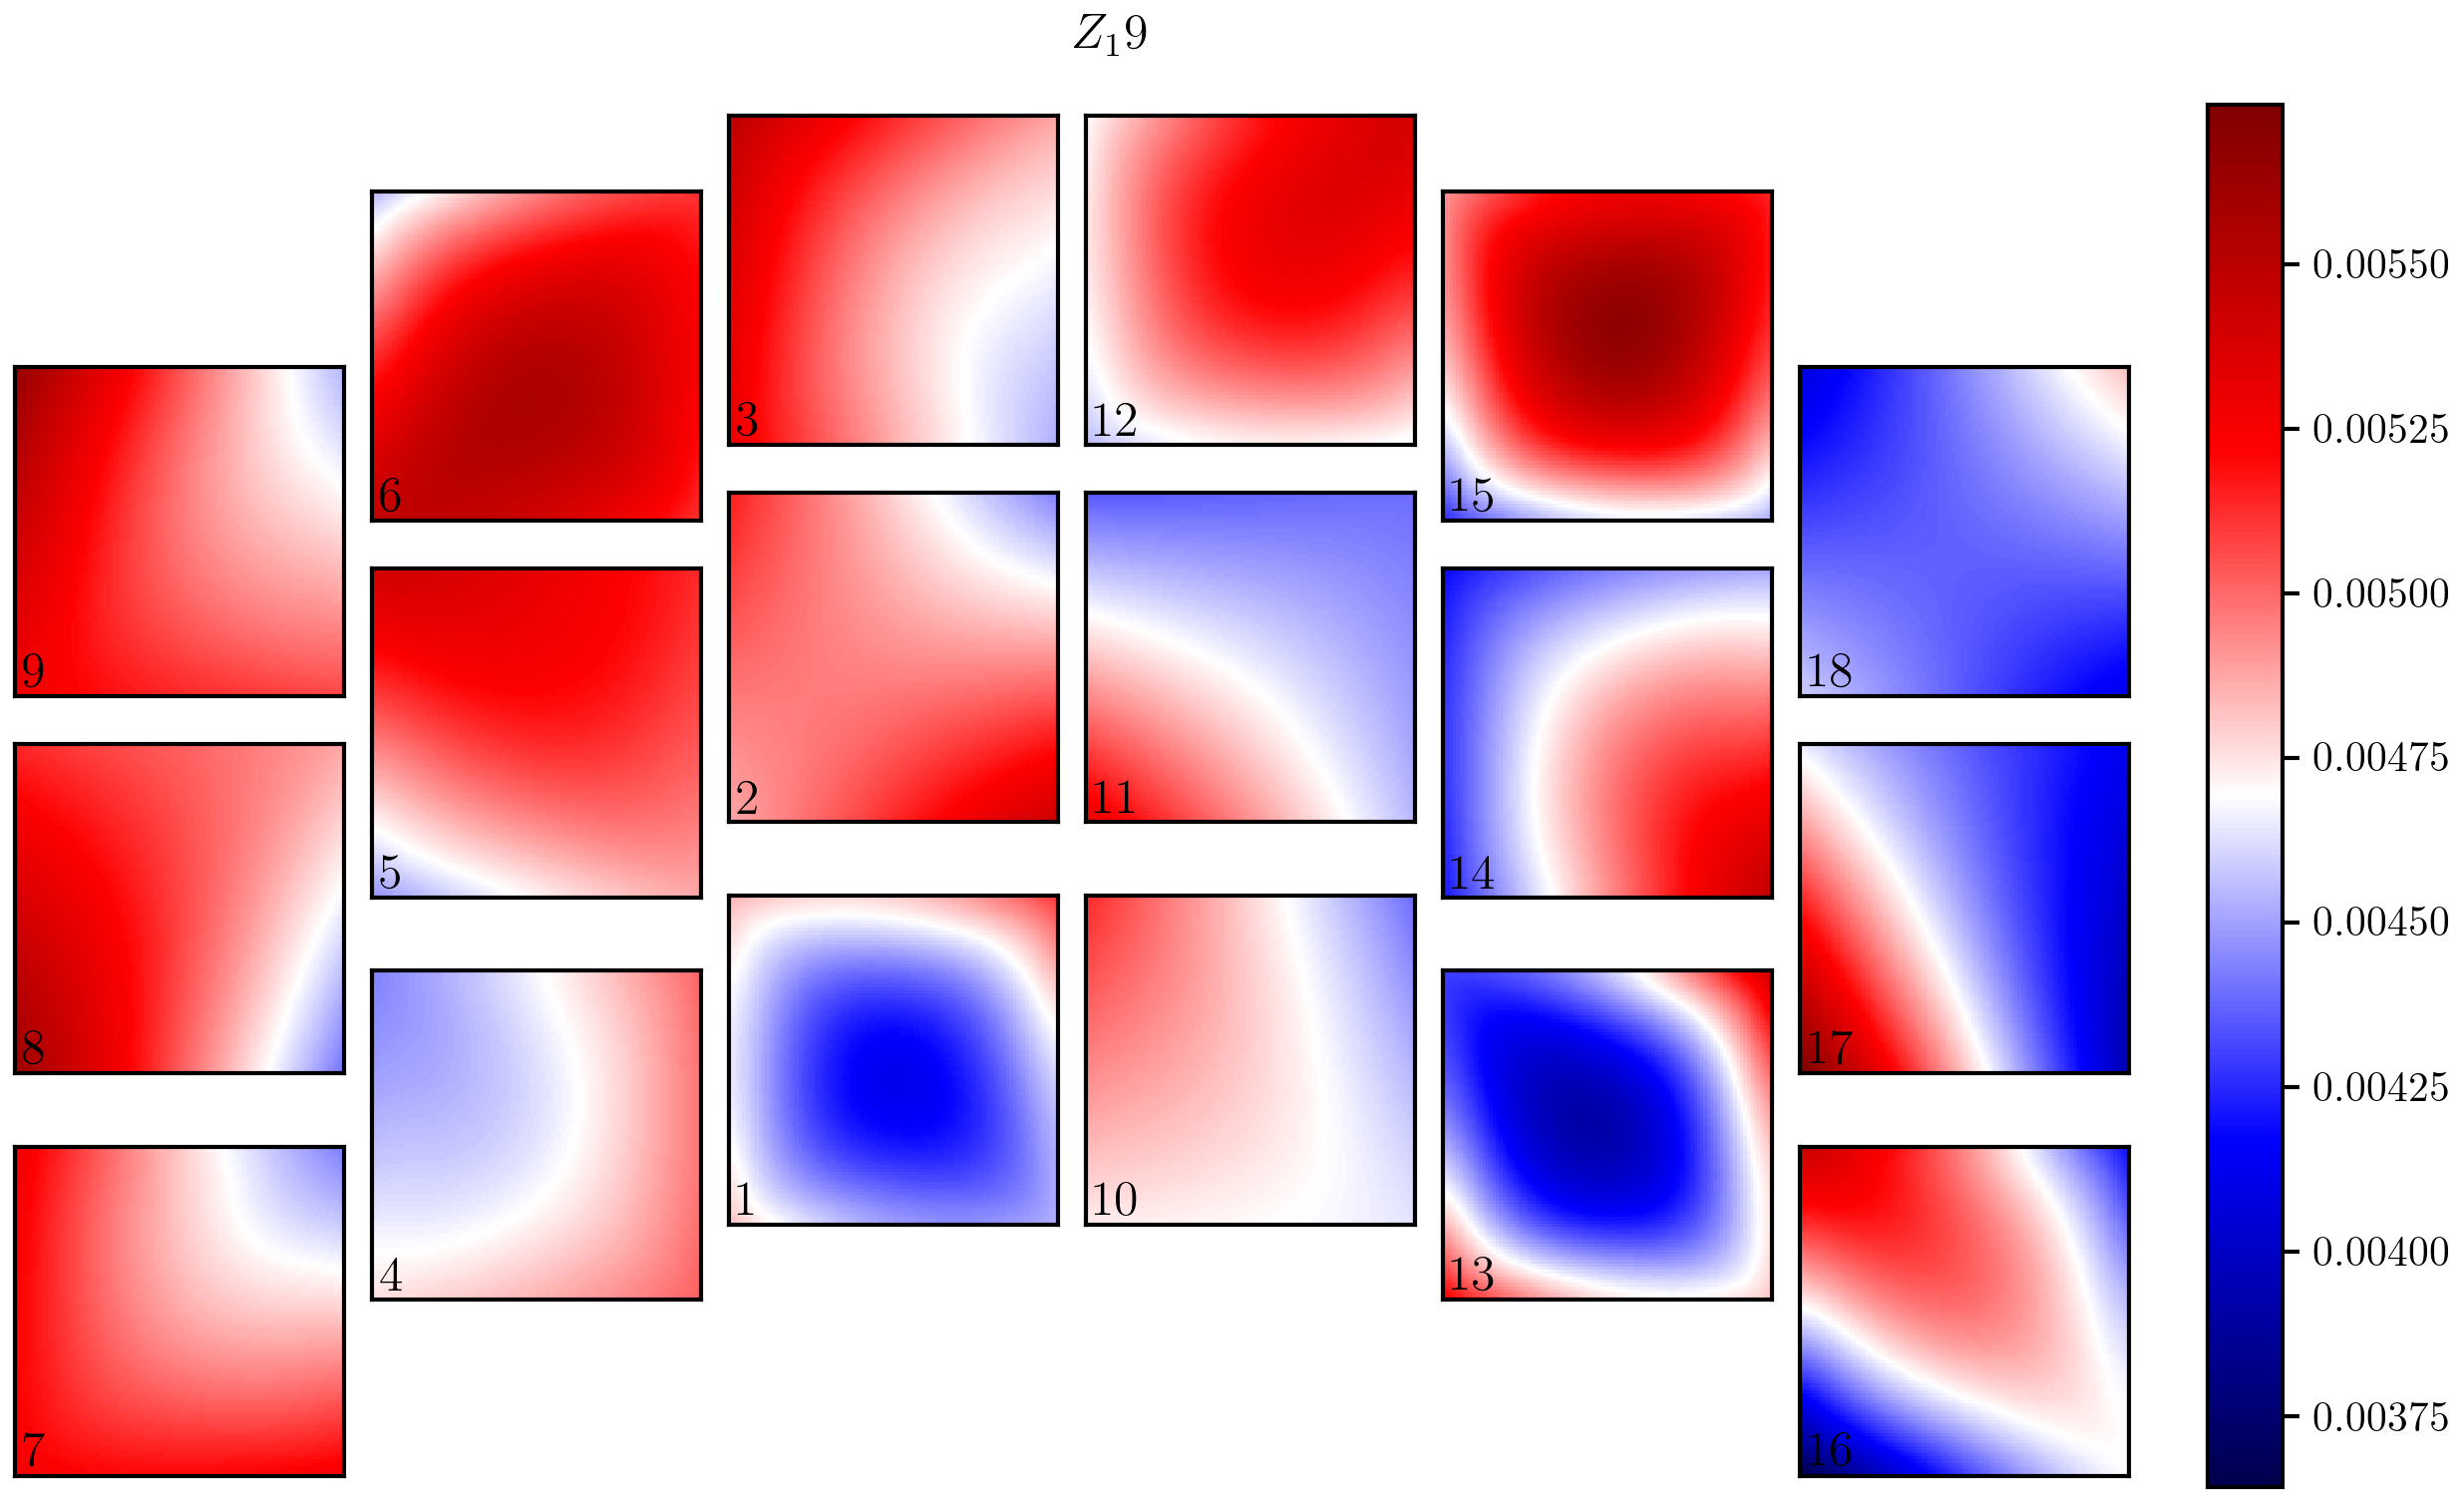

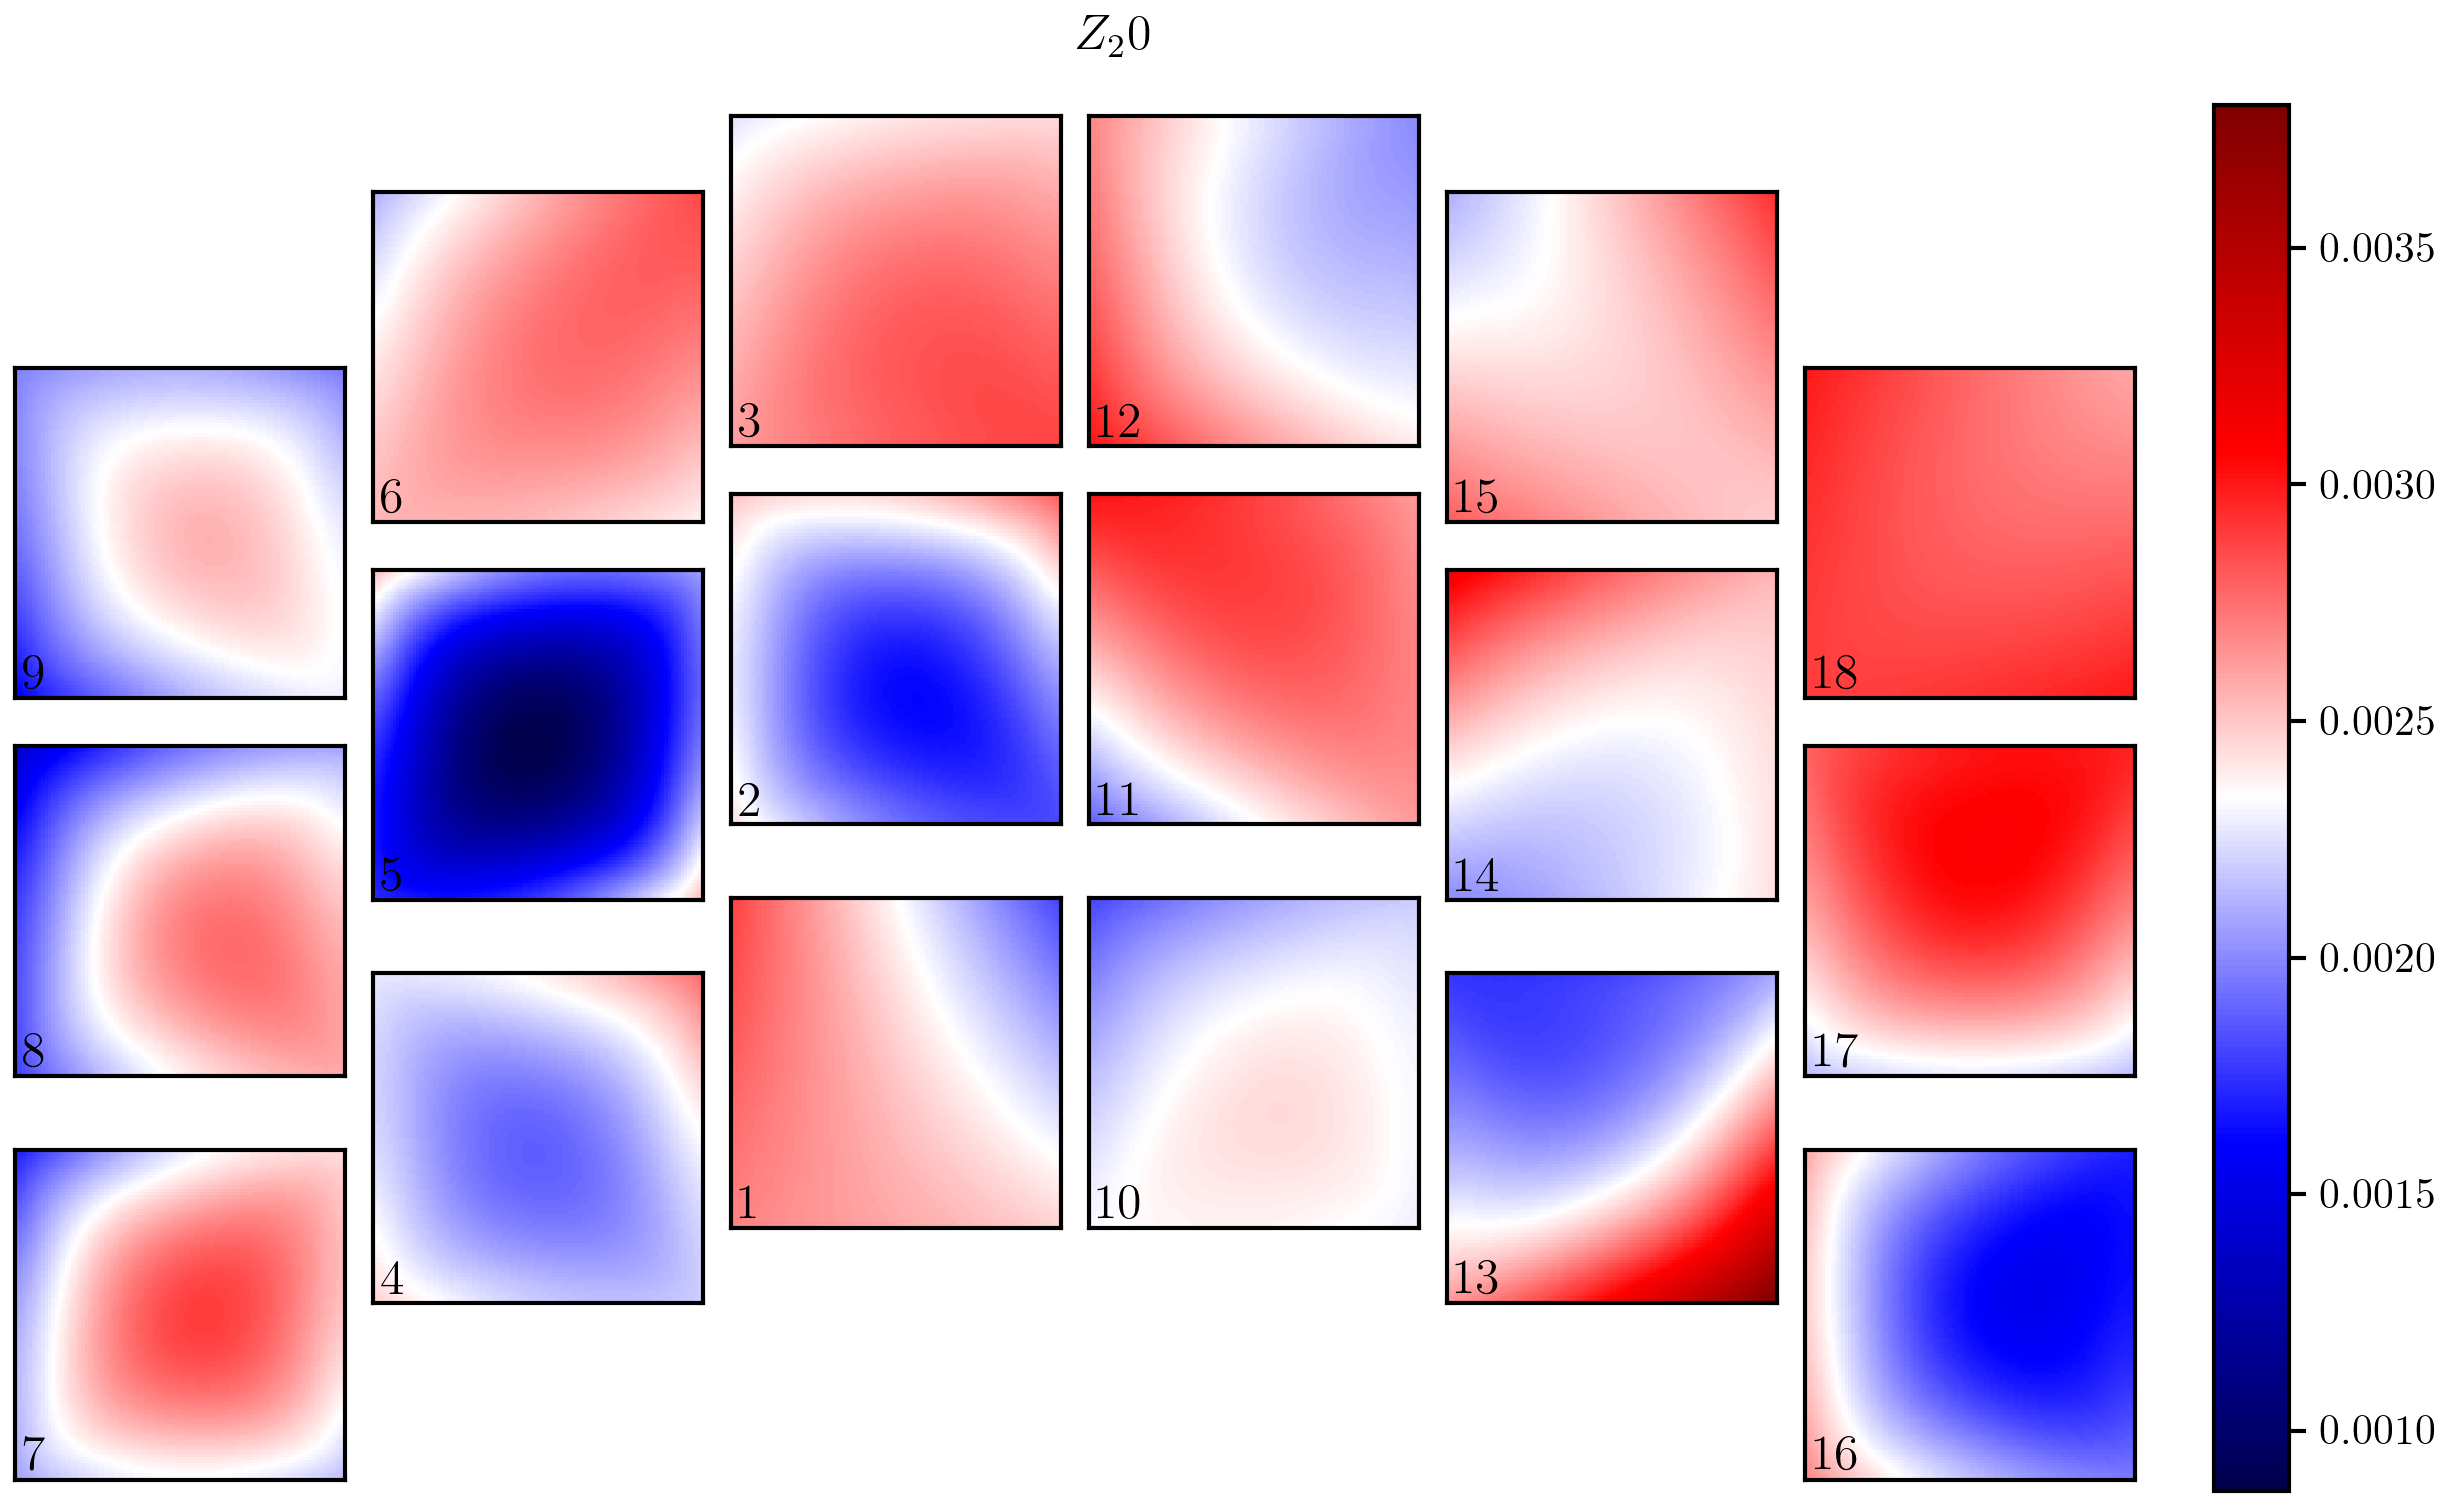

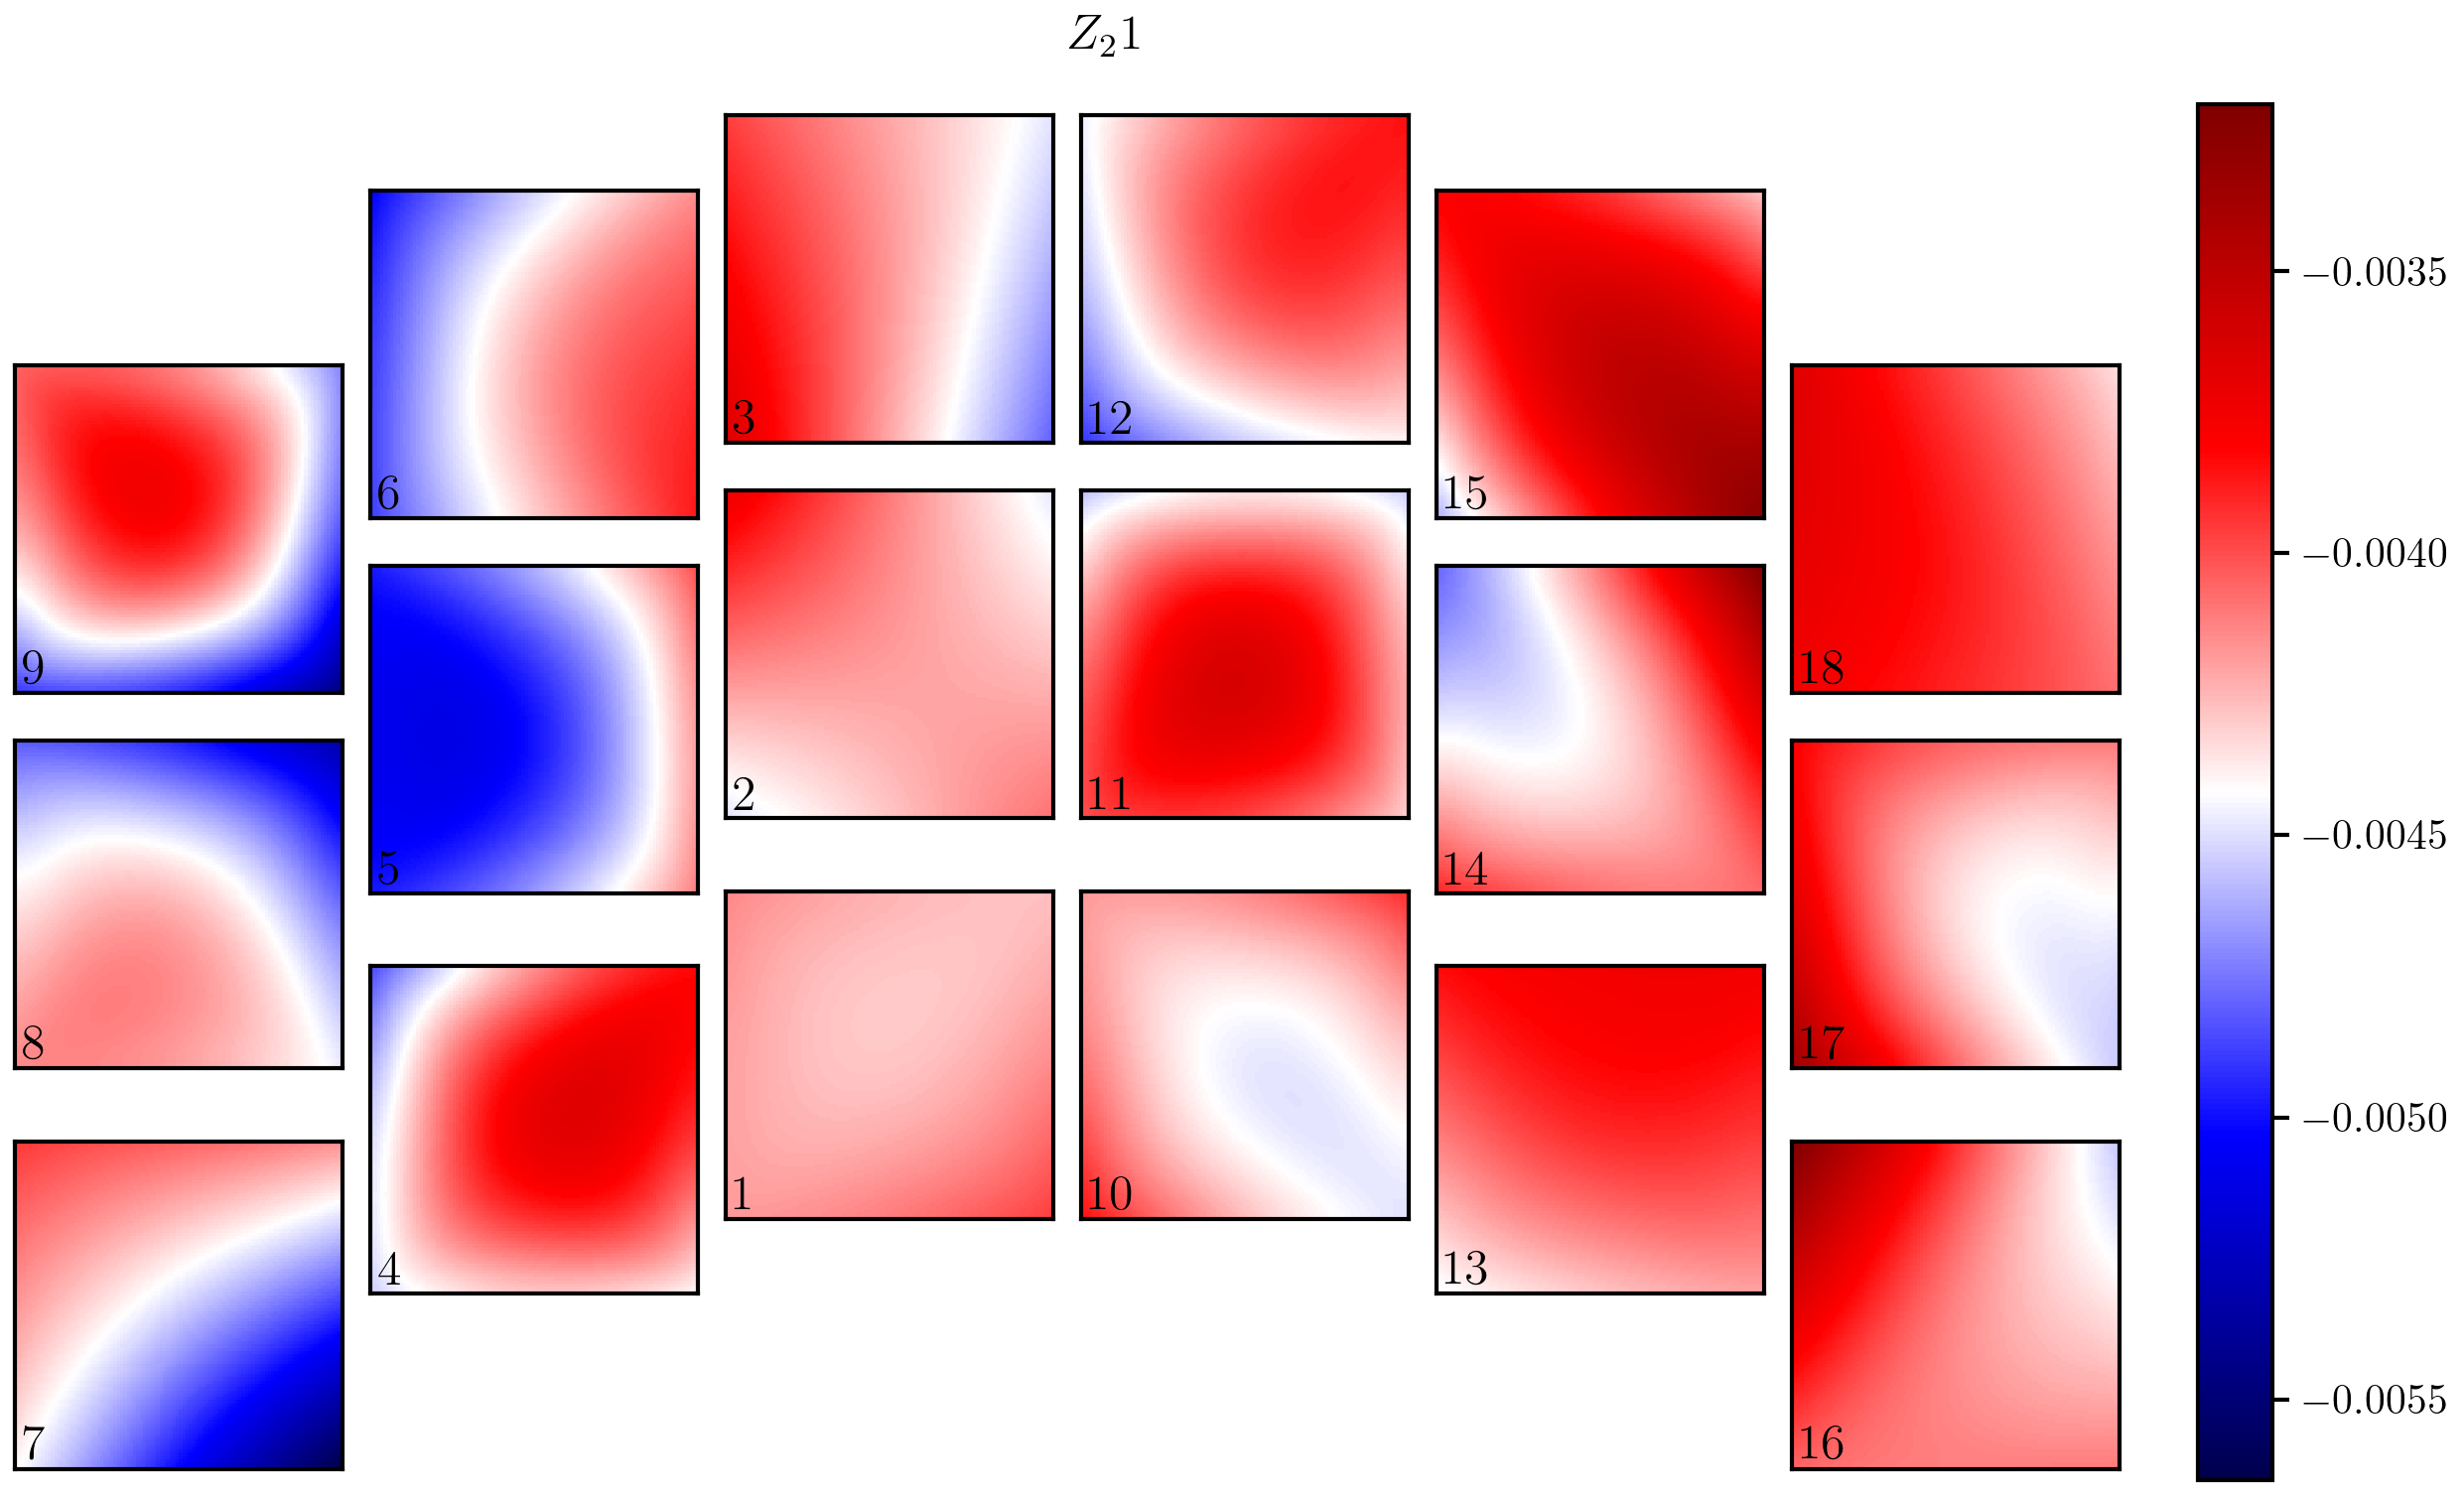

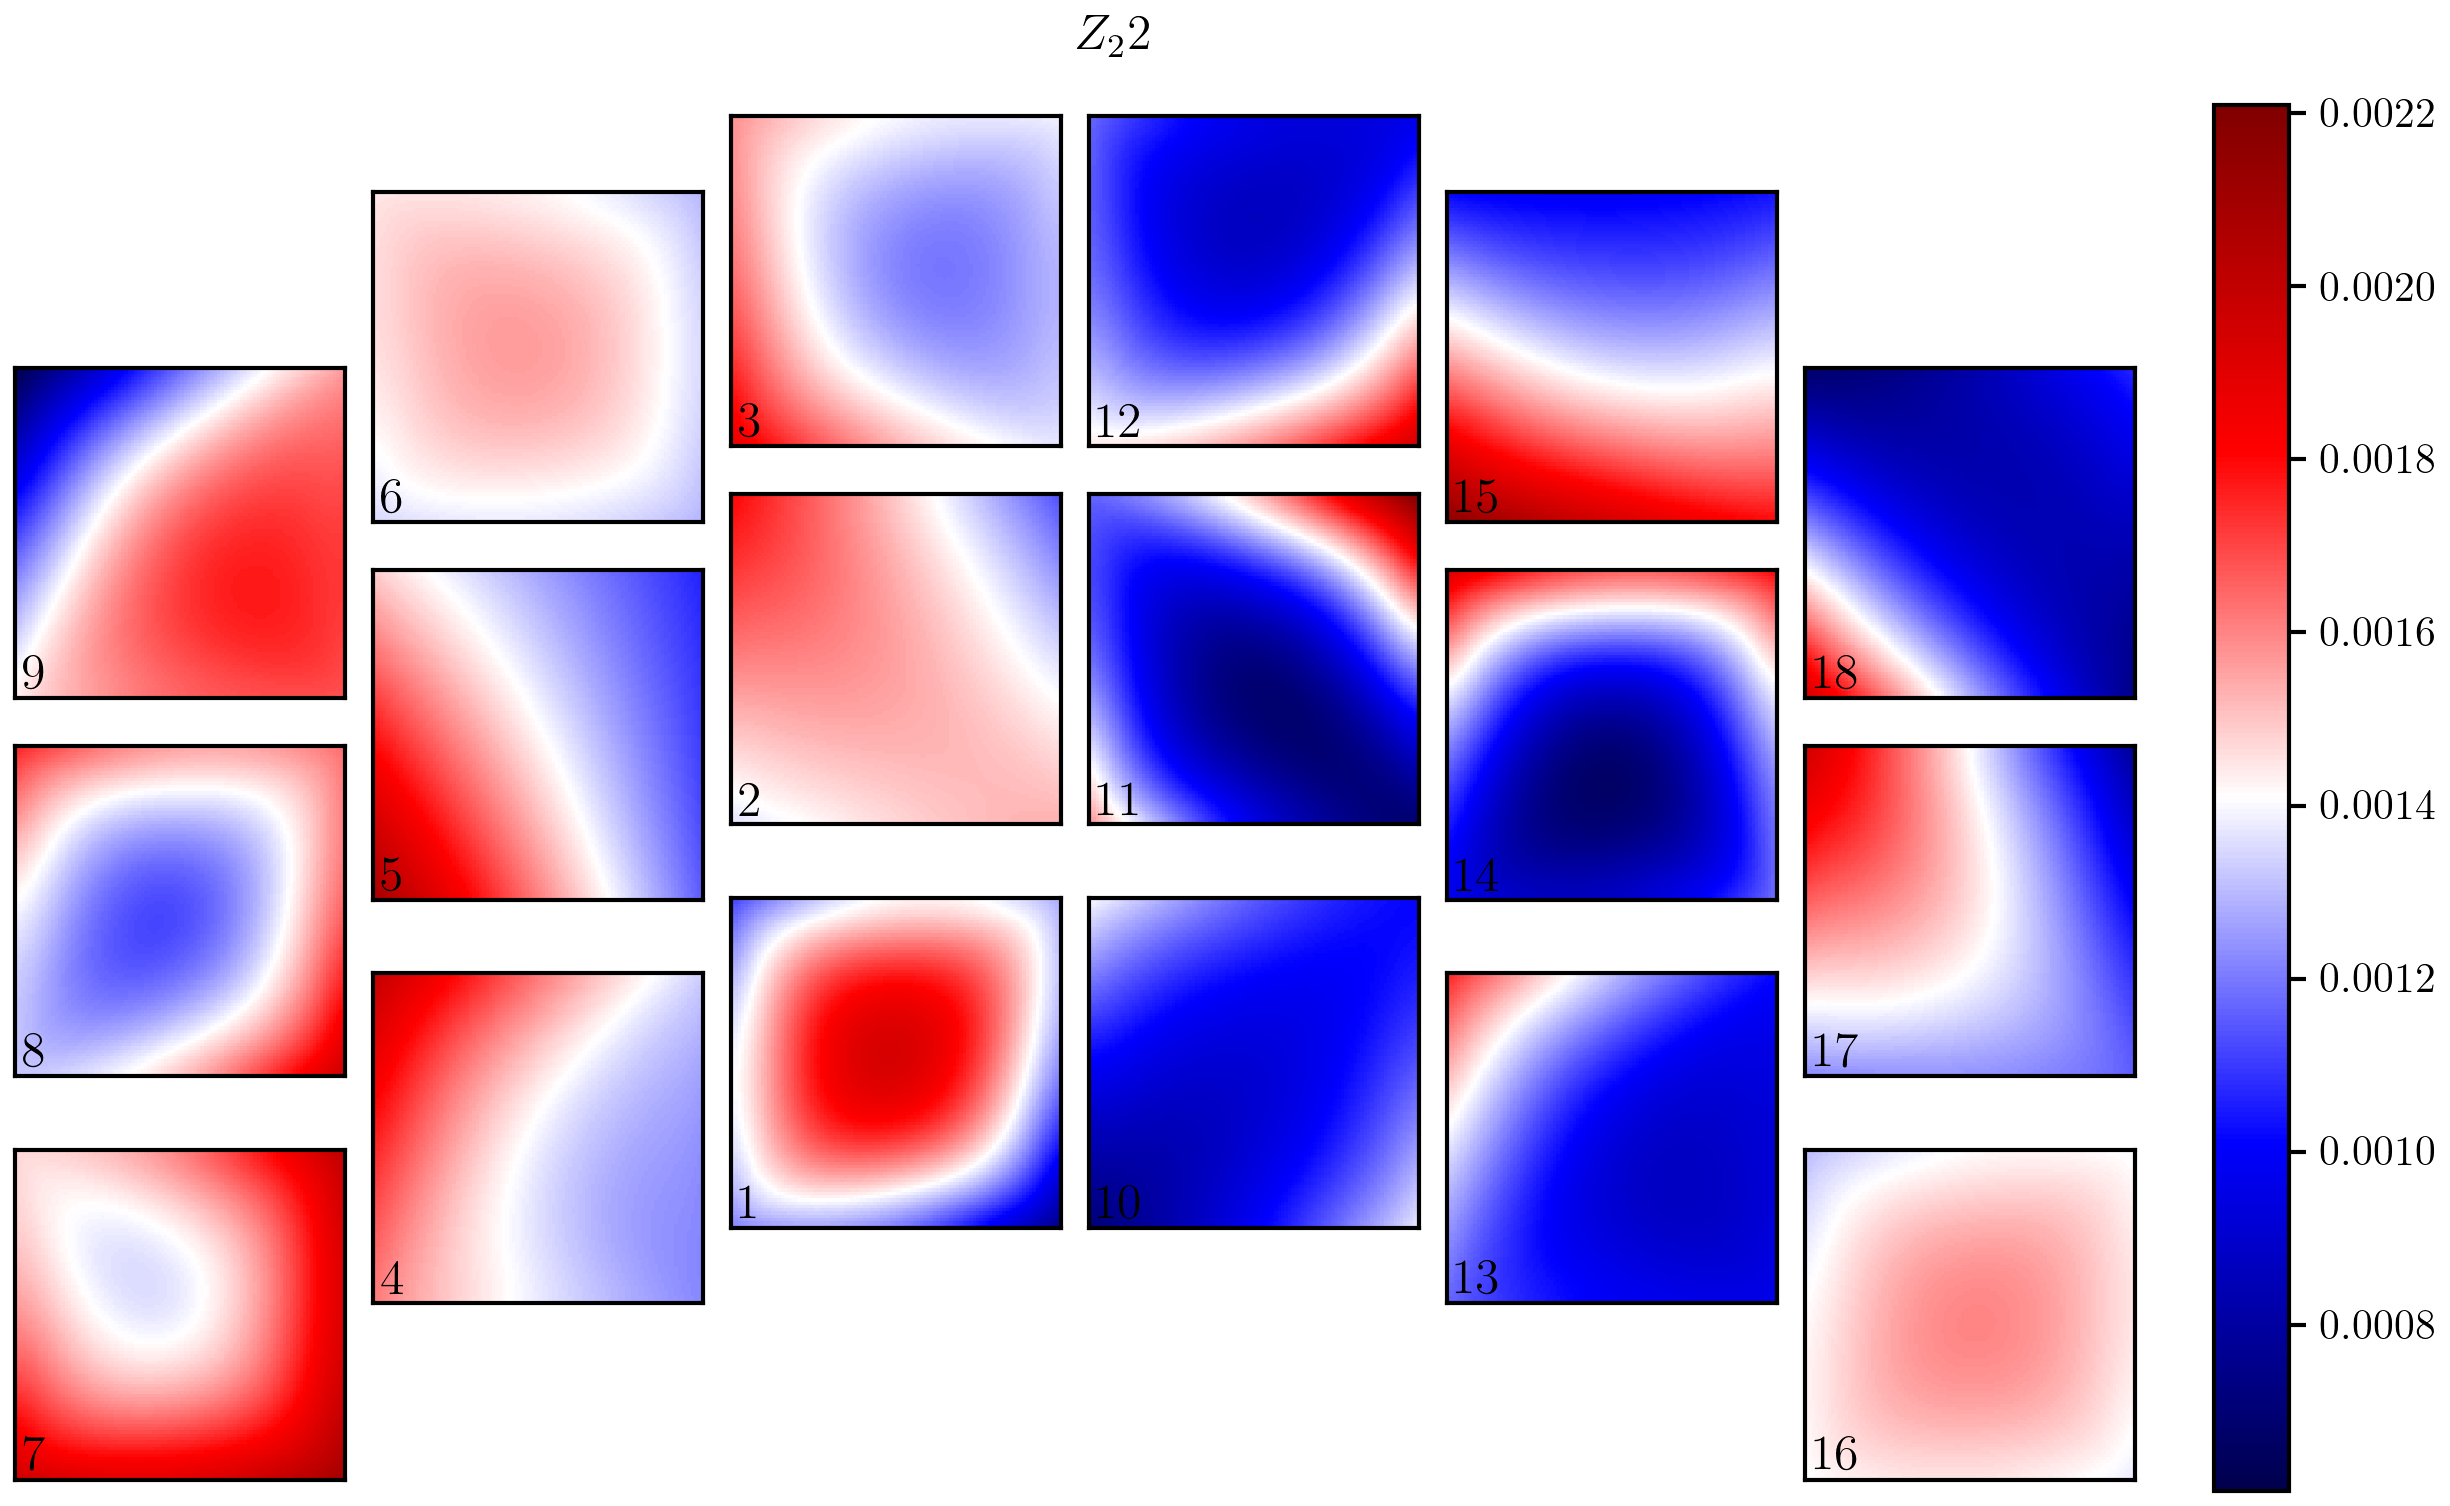

In [ ]:
for i, arrays in enumerate(zernikes):
    plotting.roman_sca_plot(np.asarray(arrays), np.asarray(range(1, 19)), residual_plot=False, show_sca_id=True, cmap='seismic', title=rf'$Z_{i + 1}$')